# Project - Analyzing Law_Enforcement Data - Raz Hamerszlak

## Analyzing Law Enforcement Data: Exploring Crime, Participants, and Incarceration

## Introduction

### This project delves into the intricate world of law enforcement across different states in the United States. By examining three critical areas, I aim to uncover insights, visualize trends, and enhance our understanding of criminal justice:

1. **Case Documentation and Crime Data:**
   - I explore the meticulous documentation and registration of police files and criminal incidents.
   - What patterns emerge? How do crime rates vary across states?

2. **Characteristics of Involved Parties:**
   - I delve into the profiles of both criminals and victims.
   - Who are the individuals affected by these crimes? What demographics play a role?

3. **Linking Criminals and Incarceration Facilities:**
   - My focus shifts to the unique features of incarceration for each prisoner or suspect.
   - How do these features intersect with the characteristics of the correctional facilities?

### Project Scope and Data

- **Imaginary Data:**
  - My dataset is based on fictional data, not a representative sample.
  - I synthesized this information using academic insights from criminology and statistical methodologies used by law enforcement agencies worldwide.

- **Three Key Data Frames:**
  1. **Cases and Offenses (rec_off):**
     - Contains details about criminal cases, offenses committed, and associated data.
  2. **Participants (inv_rec_off):**
     - Profiles of individuals involved in criminal incidents (both criminals and victims).
  3. **Prisoners and Facilities (inv_pris_det):**
     - Information on prisoners/suspects and their unique incarceration features, linked to specific correctional facilities.

### Workflow Overview

#### Each data frame follows a structured process:

1. **ETL Processes (Extract, Transform, Load):**
   - I refine and clean the raw data and add raw data, change data type for relevant columns, create null treatment for problematic values and ensuring accuracy and consistency.
   - Data quality is crucial for meaningful analysis.

2. **Aggregating Data for Reports:**
   - I summarize and aggregate relevant information.
   - Reports provide insights into crime patterns, demographics, and facility characteristics.

3. **Main Visualizations:**
   - Through charts, graphs, and visual representations, I bring the data to life.
   - Visualizations aid in understanding complex relationships.

### Evidence-Based Policing:
   - This resource discusses evidence-based policing, contrasting it with traditional models.
   - It emphasizes translating research into law enforcement practices.

### Cautionary Note

While my project provides valuable insights, remember that our data is fictional. Drawing conclusions requires caution, especially when applying findings to real-world scenarios.

Let's embark on this analytical journey, exploring the intersection of law, data, and justice.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Step 1 - Import

#### At this point relevant Python libraries have been loaded

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sb

### Step 2 - Import from SQL and from csv/xlxs
#### You have two options for connecting the data frames - choose the one that suits your needs: 

#### a) Import from SQL

In [2]:
#import pyodbc
#conn=pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                    #'Server=DESKTOP-SBC6I57\SQLEXPRESS;'
                    #'Database=Data_Law_Enforce_db;'
                    #'Trusted_Connection=yes;')

#### b) Import from csv/xlxs

In [3]:
#the xlsx files names is next to the path as note
rec_off = pd.read_excel(r"C:\Users\razha\Documents\Python\Project\.ipynb_checkpoints\df1_rec_off.xlsx")  #df1_rec_off.xlsx
inv_rec_off = pd.read_excel(r"C:\Users\razha\Documents\Python\Project\.ipynb_checkpoints\df2_inv_rec_off.xlsx") #df2_inv_rec_off.xlsx
inv_pris_det= pd.read_excel(r"C:\Users\razha\Documents\Python\Project\.ipynb_checkpoints\df3_inv_pris_det.xlsx") #df3_inv_pris_det.xlsx

-------------------------------------------------------------------------------------------------

### Police Records cases and Offences
**Record Cases and Offenses (rec_off):**
- Contains details about criminal record cases, offenses committed, and associated data.

- This data frames shows information about police records and cases through US police departments and information about the offences. One Record can conclude more than one offence.

### Data Frames Details and Data cleansing 
**ETL Processes (Extract, Transform, Load):**
- I refine and clean the raw data and add raw data, change data type for relevant columns, create null treatment for problematic values and ensuring accuracy and consistency.

#### Create a data frame variable named ‘rec_off’ by joining police records information with police offenses data from the SQL view table.
##### You have two options for creating data frame variable - choose the one that suits your needs:

In [4]:
#rec_off = pd.read_sql("select * from Record_Offence",conn)

In [5]:
#rec_off = pd.read_excel(r"C:\Users\razha\Documents\Python\Project\.ipynb_checkpoints\df1_rec_off.xlsx")

#### Information about Data Frame of Police Records Data and Offences Data

In [6]:
rec_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Record_ID           59 non-null     int64         
 1   Open_Record_Date    59 non-null     datetime64[ns]
 2   Event_Record_Date   59 non-null     datetime64[ns]
 3   Police_Station      45 non-null     object        
 4   State_ID            59 non-null     int64         
 5   State_ID_Event      59 non-null     int64         
 6   State_Name_Event    59 non-null     object        
 7   City_ID_Event       59 non-null     int64         
 8   Offence_ID_By_Law   59 non-null     int64         
 9   Offence_ID_Group    59 non-null     int64         
 10  Offence_Group_Name  59 non-null     object        
 11  Crime_Name          59 non-null     object        
 12  Prisoner_Inmate_ID  43 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(6), object(4

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
### Police Records cases and Offences
 **CodeBook Information about the data frame:**
- **Record_ID** - ID number of the police recorded case

- **Open_Record_Date** - This Date represent the first time the police record was open.

- **Event_Record_Date** - This Date represent the first time the criminal event was commited.

- **Police_Station** - This is the Station name.

- **State_ID** - This is the ID for specific US state.

- **State_ID_Event** - This is the ID which represent the US State where the offence occured.

- **State_Name_Event** - This is the name of the US State where the offence occured.

- **City_ID_Event** - This is the ID which represent the city where the offence occured.

- **Offence_ID_By_Law** - This data provides the distinct ID number for each offense, which can occur multiple times within each police record.

- **Offence_ID_Group** - This data is ID number that categorizes offenses into distinct groups based on specific characteristics. These groups serve as collective labels for the various offenses, with distinctions made according to severity and classification.

- **Offence_Group_Name** - This data is the group offences name that categorizes offenses into distinct groups based on specific characteristics. These groups serve as collective labels for the various offenses, with distinctions made according to severity and classification.

- **Crime_Name** - This data is the specific offences name.

- **Prisoner_Inmate_ID** - This data contains unique identification numbers for each prisoner, linked to their associated offense(s).

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#### Top 10 rows

In [7]:
rec_off.head(10)

Record_ID Open_Record_Date Event_Record_Date   Police_Station  State_ID  \
0         10       2013-06-03        2010-04-02  Station_22#NYPD        10   
1         11       2000-12-05        1998-11-10  Station_22#NYPD        10   
2         11       2000-12-05        1998-11-10  Station_22#NYPD        10   
3         11       2000-12-05        1998-11-10  Station_22#NYPD        10   
4         11       2000-12-05        1998-11-10  Station_22#NYPD        10   
5         12       2001-12-31        2001-09-11  Station_22#NYPD        10   
6         13       2009-03-27        2004-12-15  Station_879#BPD        22   
7         13       2009-03-27        2004-12-15  Station_879#BPD        22   
8         14       2013-04-14        2012-11-10              NaN        18   
9         15       2017-08-16        2016-08-11   Station_95#CPD        32   

   State_ID_Event State_Name_Event  City_ID_Event  Offence_ID_By_Law  \
0            1010         New_York         101010               1417   
1            1110         New_York         111011               1630   
2            1110         New_York         111011               1630   
3            1110         New_York         111011               1417   
4            1110         New_York         111011               1640   
5            1210         New_York         121012               1815   
6            1322         Maryland         132213               1950   
7            1322         Maryland         132213               1951   
8            1418         Colorado         141418               1640   
9            1532         Illinois         151532               1420   

   Offence_ID_Group     Offence_Group_Name        Crime_Name  \
0              1400  Instrumental=Offences             Theft   
1              1600       Violent=Offences           Robbery   
2              1600       Violent=Offences           Robbery   
3              1400  Instrumental=Offences             Theft   
4              1600       Violent=Offences          Homicide   
5              1800     Terrorism=Offences  Global_Terrorism   
6              1900  White_Collar=Offences             Fraud   
7              1900  White_Collar=Offences           Forgery   
8              1600       Violent=Offences          Homicide   
9              1400  Instrumental=Offences     Theft_Vehicle   

   Prisoner_Inmate_ID  
0                 NaN  
1           2111630.0  
2           3111630.0  
3           4111417.0  
4           5111640.0  
5                 NaN  
6           7131950.0  
7           7131950.0  
8                 NaN  
9          10151420.0

#### Convert Dates
**Change the data Type for dates from object to datetime**

In [8]:
rec_off["Open_Record_Date"]=pd.to_datetime(rec_off["Open_Record_Date"],format="%d-%m-%Y")
rec_off["Event_Record_Date"]=pd.to_datetime(rec_off["Event_Record_Date"],format="%d-%m-%Y")

**Information validation for changing the relevant data type**

In [9]:
rec_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Record_ID           59 non-null     int64         
 1   Open_Record_Date    59 non-null     datetime64[ns]
 2   Event_Record_Date   59 non-null     datetime64[ns]
 3   Police_Station      45 non-null     object        
 4   State_ID            59 non-null     int64         
 5   State_ID_Event      59 non-null     int64         
 6   State_Name_Event    59 non-null     object        
 7   City_ID_Event       59 non-null     int64         
 8   Offence_ID_By_Law   59 non-null     int64         
 9   Offence_ID_Group    59 non-null     int64         
 10  Offence_Group_Name  59 non-null     object        
 11  Crime_Name          59 non-null     object        
 12  Prisoner_Inmate_ID  43 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(6), object(4

In [10]:
rec_off.head()

Record_ID Open_Record_Date Event_Record_Date   Police_Station  State_ID  \
0         10       2013-06-03        2010-04-02  Station_22#NYPD        10   
1         11       2000-12-05        1998-11-10  Station_22#NYPD        10   
2         11       2000-12-05        1998-11-10  Station_22#NYPD        10   
3         11       2000-12-05        1998-11-10  Station_22#NYPD        10   
4         11       2000-12-05        1998-11-10  Station_22#NYPD        10   

   State_ID_Event State_Name_Event  City_ID_Event  Offence_ID_By_Law  \
0            1010         New_York         101010               1417   
1            1110         New_York         111011               1630   
2            1110         New_York         111011               1630   
3            1110         New_York         111011               1417   
4            1110         New_York         111011               1640   

   Offence_ID_Group     Offence_Group_Name Crime_Name  Prisoner_Inmate_ID  
0              1400  Instrumental=Offences      Theft                 NaN  
1              1600       Violent=Offences    Robbery           2111630.0  
2              1600       Violent=Offences    Robbery           3111630.0  
3              1400  Instrumental=Offences      Theft           4111417.0  
4              1600       Violent=Offences   Homicide           5111640.0

### Descriptive Statistcs
**Aggregating Data for Reports:**
   - I summarize and aggregate relevant information.
   - Reports provide insights into crime patterns, demographics, and facility characteristics.

**Describe all Descriptive Statistcs in General - ALL**

In [11]:
rec_off.describe(include="all")

Record_ID               Open_Record_Date  \
count   59.000000                             59   
unique        NaN                            NaN   
top           NaN                            NaN   
freq          NaN                            NaN   
mean     9.677966  2005-07-17 07:43:43.728813568   
min      1.000000            1984-05-17 00:00:00   
25%      4.500000            2002-06-30 00:00:00   
50%      9.000000            2004-03-05 00:00:00   
75%     15.000000            2014-02-23 00:00:00   
max     20.000000            2018-10-21 00:00:00   
std      6.049909                            NaN   

                    Event_Record_Date   Police_Station   State_ID  \
count                              59               45  59.000000   
unique                            NaN               11        NaN   
top                               NaN  Station_22#NYPD        NaN   
freq                              NaN               13        NaN   
mean    2002-02-20 00:24:24.406779648              NaN  18.288136   
min               1974-11-20 00:00:00              NaN  10.000000   
25%               1998-11-10 00:00:00              NaN  12.000000   
50%               2002-12-25 00:00:00              NaN  16.000000   
75%               2012-07-12 00:00:00              NaN  18.000000   
max               2016-08-11 00:00:00              NaN  47.000000   
std                               NaN              NaN  10.547186   

        State_ID_Event State_Name_Event  City_ID_Event  Offence_ID_By_Law  \
count        59.000000               59      59.000000          59.000000   
unique             NaN               10            NaN                NaN   
top                NaN         New_York            NaN                NaN   
freq               NaN               13            NaN                NaN   
mean        986.084746              NaN   72433.491525        1631.220339   
min         112.000000              NaN    1121.000000         210.000000   
25%         464.000000              NaN    4964.000000        1525.000000   
50%         918.000000              NaN    9918.000000        1640.000000   
75%        1532.000000              NaN  151532.000000        1751.500000   
max        2013.000000              NaN  202013.000000        8900.000000   
std         610.428913              NaN   79088.400311        1085.952197   

        Offence_ID_Group Offence_Group_Name Crime_Name  Prisoner_Inmate_ID  
count          59.000000                 59         59        4.300000e+01  
unique               NaN                  7         19                 NaN  
top                  NaN   Violent=Offences     Attack                 NaN  
freq                 NaN                 26          9                 NaN  
mean         1577.966102                NaN        NaN        6.036323e+06  
min           200.000000                NaN        NaN        3.332200e+05  
25%          1500.000000                NaN        NaN        2.515812e+06  
50%          1600.000000                NaN        NaN        4.661360e+06  
75%          1700.000000                NaN        NaN        5.841635e+06  
max          8000.000000                NaN        NaN        2.520195e+07  
std           981.917160                NaN        NaN        6.115299e+06

**Describe all Descriptive Statistcs in General - Numeric Type**

In [12]:
rec_off.describe()

Record_ID               Open_Record_Date  \
count  59.000000                             59   
mean    9.677966  2005-07-17 07:43:43.728813568   
min     1.000000            1984-05-17 00:00:00   
25%     4.500000            2002-06-30 00:00:00   
50%     9.000000            2004-03-05 00:00:00   
75%    15.000000            2014-02-23 00:00:00   
max    20.000000            2018-10-21 00:00:00   
std     6.049909                            NaN   

                   Event_Record_Date   State_ID  State_ID_Event  \
count                             59  59.000000       59.000000   
mean   2002-02-20 00:24:24.406779648  18.288136      986.084746   
min              1974-11-20 00:00:00  10.000000      112.000000   
25%              1998-11-10 00:00:00  12.000000      464.000000   
50%              2002-12-25 00:00:00  16.000000      918.000000   
75%              2012-07-12 00:00:00  18.000000     1532.000000   
max              2016-08-11 00:00:00  47.000000     2013.000000   
std                              NaN  10.547186      610.428913   

       City_ID_Event  Offence_ID_By_Law  Offence_ID_Group  Prisoner_Inmate_ID  
count      59.000000          59.000000         59.000000        4.300000e+01  
mean    72433.491525        1631.220339       1577.966102        6.036323e+06  
min      1121.000000         210.000000        200.000000        3.332200e+05  
25%      4964.000000        1525.000000       1500.000000        2.515812e+06  
50%      9918.000000        1640.000000       1600.000000        4.661360e+06  
75%    151532.000000        1751.500000       1700.000000        5.841635e+06  
max    202013.000000        8900.000000       8000.000000        2.520195e+07  
std     79088.400311        1085.952197        981.917160        6.115299e+06

**Describe all Descriptive Statistcs in General - String Type (object)**

In [13]:
rec_off.describe(include='object')

Police_Station State_Name_Event Offence_Group_Name Crime_Name
count                45               59                 59         59
unique               11               10                  7         19
top     Station_22#NYPD         New_York   Violent=Offences     Attack
freq                 13               13                 26          9

**Describe Main And Relavent Descriptive Statistics - Record_ID**

In [14]:
rec_off["Record_ID"].count()

59

In [15]:
rec_off["Record_ID"].nunique()

20

In [16]:
rec_off.Record_ID.value_counts(ascending=False).to_frame()

count
Record_ID       
9              7
3              7
5              5
2              5
19             5
11             4
17             4
7              3
6              2
1              2
20             2
18             2
15             2
14             2
13             2
16             1
4              1
12             1
8              1
10             1

**Describe Main And Relavent Descriptive Statistics - Dates for Open and Event Record**

In [17]:
rec_off["Open_Record_Date"].min()

Timestamp('1984-05-17 00:00:00')

In [18]:
rec_off["Open_Record_Date"].max()

Timestamp('2018-10-21 00:00:00')

In [19]:
rec_off["Event_Record_Date"].min()

Timestamp('1974-11-20 00:00:00')

In [20]:
rec_off["Event_Record_Date"].max()

Timestamp('2016-08-11 00:00:00')

In [21]:
rec_off["Open_Record_Date"].value_counts(ascending=False).to_frame()

count
Open_Record_Date       
1984-05-17            7
2004-03-05            7
2014-02-23            5
2002-06-30            5
2003-03-23            5
2000-12-05            4
2008-09-09            4
2018-10-21            3
2016-09-15            2
1993-05-21            2
2018-06-15            2
2015-06-11            2
2017-08-16            2
2013-04-14            2
2009-03-27            2
2015-10-29            1
2005-11-22            1
2001-12-31            1
2007-07-21            1
2013-06-03            1

In [22]:
rec_off["Event_Record_Date"].value_counts(ascending=False).to_frame()

count
Event_Record_Date       
1974-11-20             7
2002-12-25             7
2012-07-12             5
1997-08-04             5
2001-12-13             5
1998-11-10             4
2006-07-12             4
2016-01-20             3
2015-05-14             2
1990-10-13             2
2005-08-13             2
2013-02-16             2
2016-08-11             2
2012-11-10             2
2004-12-15             2
2012-11-03             1
2001-05-11             1
2001-09-11             1
2006-04-11             1
2010-04-02             1

**Describe Main And Relavent Descriptive Statistics - Police Station**

In [23]:
rec_off["Police_Station"].mode()

0    Station_22#NYPD
Name: Police_Station, dtype: object

In [24]:
rec_off["Police_Station"].count()

45

In [25]:
rec_off["Police_Station"].nunique()

11

In [26]:
rec_off["Police_Station"].value_counts(ascending=False).to_frame()

count
Police_Station         
Station_22#NYPD      13
Station_13#SFPD       5
Station_13#LVMPD      5
Station_555#SAPD      5
Station_11#PPD        4
Station_95#CPD        3
Station_1#PPD         3
Station_879#BPD       2
Station_21#CPD        2
Station_14#LAPD       2
Station_443#HPD       1

**Describe Main And Relavent Descriptive Statistics - State Name Event**

In [27]:
rec_off["State_Name_Event"].mode()

0    New_York
Name: State_Name_Event, dtype: object

In [28]:
rec_off["State_Name_Event"].count()

59

In [29]:
rec_off["State_Name_Event"].nunique()

10

In [30]:
rec_off["State_Name_Event"].value_counts(ascending=False).to_frame()

count
State_Name_Event       
New_York             13
Texas                11
Colorado              9
California            7
Nevada                5
Pennsylvania          4
Illinois              3
Arizona               3
Maryland              2
Ohio                  2

**Describe Main And Relavent Descriptive Statistics - City ID event**

In [31]:
rec_off["City_ID_Event"].mode()

0    3103
1    9918
Name: City_ID_Event, dtype: int64

In [32]:
rec_off["City_ID_Event"].count()

59

In [33]:
rec_off["City_ID_Event"].nunique()

20

In [34]:
rec_off["City_ID_Event"].value_counts(ascending=False).to_frame()

count
City_ID_Event       
9918               7
3103               7
5516               5
2142               5
191913             5
111011             4
171745             4
7716               3
6616               2
1121               2
202013             2
181847             2
151532             2
141418             2
132213             2
161632             1
4412               1
121012             1
8816               1
101010             1

**Describe Main And Relavent Descriptive Statistics - Offence ID By Law**

In [35]:
rec_off["Offence_ID_By_Law"].mode()

0    1635
Name: Offence_ID_By_Law, dtype: int64

In [36]:
rec_off["Offence_ID_By_Law"].count()

59

In [37]:
rec_off["Offence_ID_By_Law"].nunique()

19

In [38]:
rec_off["Offence_ID_By_Law"].value_counts(ascending=False).to_frame()

count
Offence_ID_By_Law       
1635                   9
1640                   7
1950                   6
210                    5
1630                   5
1750                   4
1655                   3
1417                   3
1420                   3
1951                   3
220                    2
1815                   2
1410                   1
1680                   1
1415                   1
1810                   1
8900                   1
1753                   1
1780                   1

**Describe Main And Relavent Descriptive Statistics - Offence Group Name**

In [39]:
rec_off["Offence_Group_Name"].mode()

0    Violent=Offences
Name: Offence_Group_Name, dtype: object

In [40]:
rec_off["Offence_Group_Name"].count()

59

In [41]:
rec_off["Offence_Group_Name"].nunique()

7

In [42]:
rec_off["Offence_Group_Name"].value_counts(ascending=False).to_frame()

count
Offence_Group_Name          
Violent=Offences          26
White_Collar=Offences      9
Instrumental=Offences      8
Computer=Offences          7
Sexual=Offences            6
Terrorism=Offences         2
Drugs=Offences             1

**Describe Main And Relavent Descriptive Statistics - Crime Name**

In [43]:
rec_off["Crime_Name"].mode()

0    Attack
Name: Crime_Name, dtype: object

In [44]:
rec_off["Crime_Name"].count()

59

In [45]:
rec_off["Crime_Name"].nunique()

19

In [46]:
rec_off["Crime_Name"].value_counts(ascending=False).to_frame()

count
Crime_Name                      
Attack                         9
Homicide                       7
Fraud                          6
Identity_Theft                 5
Robbery                        5
Rape                           4
Kidnapping                     3
Theft                          3
Theft_Vehicle                  3
Forgery                        3
Blackmail_and_threats          2
Global_Terrorism               2
Arson                          1
Killing                        1
Violation_of_public_order      1
Human_Traffic                  1
Drug_Self_Use                  1
Pimping                        1
Pedophilia                     1

**Describe Main And Relavent Descriptive Statistics - Prisoner Inmate ID**

In [47]:
rec_off["Prisoner_Inmate_ID"].mode()

0     333220.0
1    5291640.0
Name: Prisoner_Inmate_ID, dtype: float64

In [48]:
rec_off["Prisoner_Inmate_ID"].count()

43

In [49]:
rec_off["Prisoner_Inmate_ID"].nunique()

28

In [50]:
rec_off["Prisoner_Inmate_ID"].value_counts(ascending=False).to_frame().head(10)

count
Prisoner_Inmate_ID       
333220.0                3
5291640.0               3
1314210.0               2
1517210.0               2
2611415.0               2
363220.0                2
19191630.0              2
4661360.0               2
2821640.0               2
3021640.0               2

### Descriptive Statistics
**Examples of cross-tabulations and dimension analysis data - using aggregation functions**

**Numbers of Offences by RecordID**

In [51]:
rec_off.groupby("Record_ID")[["Offence_Group_Name"]].count()

Offence_Group_Name
Record_ID                    
1                           2
2                           5
3                           7
4                           1
5                           5
6                           2
7                           3
8                           1
9                           7
10                          1
11                          4
12                          1
13                          2
14                          2
15                          2
16                          1
17                          4
18                          2
19                          5
20                          2

**Numbers of Offences by Open_Record_Date by year**

In [52]:
rec_off.groupby(rec_off["Open_Record_Date"].dt.year)[["Offence_Group_Name"]].count()

Offence_Group_Name
Open_Record_Date                    
1984                               7
1993                               2
2000                               4
2001                               1
2002                               5
2003                               5
2004                               7
2005                               1
2007                               1
2008                               4
2009                               2
2013                               3
2014                               5
2015                               3
2016                               2
2017                               2
2018                               5

**Numbers of Offences by Open_Record_Date by month**

In [53]:
rec_off.groupby(rec_off["Open_Record_Date"].dt.month)[["Offence_Group_Name"]].count()

Offence_Group_Name
Open_Record_Date                    
2                                  5
3                                 14
4                                  2
5                                  9
6                                 10
7                                  1
8                                  2
9                                  6
10                                 4
11                                 1
12                                 5

**Numbers of Offences by Event_Record_Date by year**

In [54]:
rec_off.groupby(rec_off["Event_Record_Date"].dt.year)[["Offence_Group_Name"]].count()

Offence_Group_Name
Event_Record_Date                    
1974                                7
1990                                2
1997                                5
1998                                4
2001                                7
2002                                7
2004                                2
2005                                2
2006                                5
2010                                1
2012                                8
2013                                2
2015                                2
2016                                5

**Numbers of Offences by Event_Record_Date by month**

In [55]:
rec_off.groupby(rec_off["Event_Record_Date"].dt.month)[["Offence_Group_Name"]].count()

Offence_Group_Name
Event_Record_Date                    
1                                   3
2                                   2
4                                   2
5                                   3
7                                   9
8                                   9
9                                   1
10                                  2
11                                 14
12                                 14

**Numbers of Offences by Police_Station**

In [56]:
rec_off.groupby(["Police_Station"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Police_Station                     
Station_1#PPD                     3
Station_11#PPD                    4
Station_13#LVMPD                  5
Station_13#SFPD                   5
Station_14#LAPD                   2
Station_21#CPD                    2
Station_22#NYPD                  13
Station_443#HPD                   1
Station_555#SAPD                  5
Station_879#BPD                   2
Station_95#CPD                    3

**Numbers of Offences by Police Station according to Event_Record_Date and Open_Record_Date by year**

In [57]:
rec_off.groupby([rec_off["Police_Station"],rec_off["Event_Record_Date"].dt.year, rec_off["Open_Record_Date"].dt.year])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Police_Station   Event_Record_Date Open_Record_Date                   
Station_1#PPD    1990              1993                              2
                 2001              2005                              1
Station_11#PPD   2006              2008                              4
Station_13#LVMPD 1997              2002                              5
Station_13#SFPD  2001              2003                              5
Station_14#LAPD  2005              2018                              2
Station_21#CPD   2013              2015                              2
Station_22#NYPD  1998              2000                              4
                 2001              2001                              1
                 2002              2004                              7
                 2010              2013                              1
Station_443#HPD  2006              2007                              1
Station_555#SAPD 2015              2016                              2
                 2016              2018                              3
Station_879#BPD  2004              2009                              2
Station_95#CPD   2012              2015                              1
                 2016              2017                              2

**Numbers of Offences by State_Name_Event**

In [58]:
rec_off.groupby(["State_Name_Event"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event                   
Arizona                           3
California                        7
Colorado                          9
Illinois                          3
Maryland                          2
Nevada                            5
New_York                         13
Ohio                              2
Pennsylvania                      4
Texas                            11

**Numbers of Offences by State_Name_Event according to Event_Record_Date and Open_Record_Date by year**

In [59]:
rec_off.groupby([rec_off["State_Name_Event"],rec_off["Event_Record_Date"].dt.year, rec_off["Open_Record_Date"].dt.year])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event Event_Record_Date Open_Record_Date                   
Arizona          1990              1993                              2
                 2001              2005                              1
California       2001              2003                              5
                 2005              2018                              2
Colorado         1974              1984                              7
                 2012              2013                              2
Illinois         2012              2015                              1
                 2016              2017                              2
Maryland         2004              2009                              2
Nevada           1997              2002                              5
New_York         1998              2000                              4
                 2001              2001                              1
                 2002              2004                              7
                 2010              2013                              1
Ohio             2013              2015                              2
Pennsylvania     2006              2008                              4
Texas            2006              2007                              1
                 2012              2014                              5
                 2015              2016                              2
                 2016              2018                              3

**Numbers of Offences by State_Name_Event according to Police_Station**

In [60]:
rec_off.groupby(["State_Name_Event","Police_Station"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event Police_Station                     
Arizona          Station_1#PPD                     3
California       Station_13#SFPD                   5
                 Station_14#LAPD                   2
Illinois         Station_95#CPD                    3
Maryland         Station_879#BPD                   2
Nevada           Station_13#LVMPD                  5
New_York         Station_22#NYPD                  13
Ohio             Station_21#CPD                    2
Pennsylvania     Station_11#PPD                    4
Texas            Station_443#HPD                   1
                 Station_555#SAPD                  5

**Numbers of Offences by State_Name_Event according to Police_Station by Event_Record_Date and Open_Record_Date by year**

In [61]:
rec_off.groupby([rec_off["State_Name_Event"],rec_off["Police_Station"], rec_off["Event_Record_Date"].dt.year, rec_off["Open_Record_Date"].dt.year])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event Police_Station   Event_Record_Date Open_Record_Date                   
Arizona          Station_1#PPD    1990              1993                              2
                                  2001              2005                              1
California       Station_13#SFPD  2001              2003                              5
                 Station_14#LAPD  2005              2018                              2
Illinois         Station_95#CPD   2012              2015                              1
                                  2016              2017                              2
Maryland         Station_879#BPD  2004              2009                              2
Nevada           Station_13#LVMPD 1997              2002                              5
New_York         Station_22#NYPD  1998              2000                              4
                                  2001              2001                              1
                                  2002              2004                              7
                                  2010              2013                              1
Ohio             Station_21#CPD   2013              2015                              2
Pennsylvania     Station_11#PPD   2006              2008                              4
Texas            Station_443#HPD  2006              2007                              1
                 Station_555#SAPD 2015              2016                              2
                                  2016              2018                              3

**Numbers of Offences by Offence_Group_Name**

In [62]:
rec_off.groupby(["Offence_Group_Name"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Offence_Group_Name                      
Computer=Offences                      7
Drugs=Offences                         1
Instrumental=Offences                  8
Sexual=Offences                        6
Terrorism=Offences                     2
Violent=Offences                      26
White_Collar=Offences                  9

**Numbers of Offences by State_Name_Event Categorized by Offence_Group_Name and the specific Crime Name**

In [63]:
rec_off.groupby(["State_Name_Event","Offence_Group_Name","Crime_Name"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event Offence_Group_Name    Crime_Name                                  
Arizona          Instrumental=Offences Violation_of_public_order                  1
                 Terrorism=Offences    Global_Terrorism                           1
                 Violent=Offences      Attack                                     1
California       Computer=Offences     Identity_Theft                             2
                 Instrumental=Offences Theft                                      1
                 Violent=Offences      Attack                                     1
                                       Robbery                                    2
                 White_Collar=Offences Fraud                                      1
Colorado         Sexual=Offences       Pedophilia                                 1
                                       Rape                                       1
                 Violent=Offences      Attack                                     2
                                       Homicide                                   3
                                       Kidnapping                                 2
Illinois         Instrumental=Offences Arson                                      1
                                       Theft_Vehicle                              1
                 Violent=Offences      Attack                                     1
Maryland         White_Collar=Offences Forgery                                    1
                                       Fraud                                      1
Nevada           Sexual=Offences       Rape                                       2
                 Violent=Offences      Attack                                     1
                                       Homicide                                   2
New_York         Computer=Offences     Blackmail_and_threats                      2
                                       Identity_Theft                             1
                 Instrumental=Offences Theft                                      2
                 Terrorism=Offences    Global_Terrorism                           1
                 Violent=Offences      Homicide                                   1
                                       Robbery                                    2
                 White_Collar=Offences Fraud                                      4
Ohio             Violent=Offences      Attack                                     1
                                       Killing                                    1
Pennsylvania     Computer=Offences     Identity_Theft                             2
                 White_Collar=Offences Forgery                                    2
Texas            Drugs=Offences        Drug_Self_Use                              1
                 Instrumental=Offences Theft_Vehicle                              2
                 Sexual=Offences       Pimping                                    1
                                       Rape                                       1
                 Violent=Offences      Attack                                     2
                                       Homicide                                   1
                                       Human_Traffic                              1
                                       Kidnapping                                 1
                                       Robbery                                    1

**Numbers of Offences by State_Name_Event Categorized by Offence_Group_Name and the specific Crime Name according to Event_Record_Date and Open_Record_Date**

In [64]:
rec_off.groupby([rec_off["State_Name_Event"],rec_off["Offence_Group_Name"],rec_off["Crime_Name"], rec_off["Event_Record_Date"].dt.year, rec_off["Open_Record_Date"].dt.year])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event Offence_Group_Name    Crime_Name                Event_Record_Date Open_Record_Date                   
Arizona          Instrumental=Offences Violation_of_public_order 1990              1993                              1
                 Terrorism=Offences    Global_Terrorism          2001              2005                              1
                 Violent=Offences      Attack                    1990              1993                              1
California       Computer=Offences     Identity_Theft            2001              2003                              1
                                                                 2005              2018                              1
                 Instrumental=Offences Theft                     2001              2003                              1
                 Violent=Offences      Attack                    2001              2003                              1
                                       Robbery                   2001              2003                              2
                 White_Collar=Offences Fraud                     2005              2018                              1
Colorado         Sexual=Offences       Pedophilia                1974              1984                              1
                                       Rape                      2012              2013                              1
                 Violent=Offences      Attack                    1974              1984                              2
                                       Homicide                  1974              1984                              2
                                                                 2012              2013                              1
                                       Kidnapping                1974              1984                              2
Illinois         Instrumental=Offences Arson                     2016              2017                              1
                                       Theft_Vehicle             2016              2017                              1
                 Violent=Offences      Attack                    2012              2015                              1
Maryland         White_Collar=Offences Forgery                   2004              2009                              1
                                       Fraud                     2004              2009                              1
Nevada           Sexual=Offences       Rape                      1997              2002                              2
                 Violent=Offences      Attack                    1997              2002                              1
                                       Homicide                  1997              2002                              2
New_York         Computer=Offences     Blackmail_and_threats     2002              2004                              2
                                       Identity_Theft            2002              2004                              1
                 Instrumental=Offences Theft                     1998              2000                              1
                                                                 2010              2013                              1
                 Terrorism=Offences    Global_Terrorism          2001              2001                              1
                 Violent=Offences      Homicide                  1998              2000                              1
                                       Robbery                   1998              2000                              2
                 White_Collar=Offences Fraud                     2002              2004                              4
Ohio             Violent=Offences      Attack                    2013              2015                              1
                                       Killing         

**Numbers of Offences by State_Name_Event Categorized by Police Station that categorized by Offence_ID_By_Law and Offence_Group_Name and the specific Crime Name according to Event_Record_Date and Open_Record_Date**

In [65]:
rec_off.groupby([rec_off["State_Name_Event"], rec_off["Police_Station"], rec_off["Offence_ID_By_Law"], rec_off["Offence_Group_Name"],rec_off["Crime_Name"], rec_off["Event_Record_Date"].dt.year, rec_off["Open_Record_Date"].dt.year])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event Police_Station   Offence_ID_By_Law Offence_Group_Name    Crime_Name                Event_Record_Date Open_Record_Date                   
Arizona          Station_1#PPD    1415              Instrumental=Offences Violation_of_public_order 1990              1993                              1
                                  1635              Violent=Offences      Attack                    1990              1993                              1
                                  1815              Terrorism=Offences    Global_Terrorism          2001              2005                              1
California       Station_13#SFPD  210               Computer=Offences     Identity_Theft            2001              2003                              1
                                  1417              Instrumental=Offences Theft                     2001              2003                              1
                                  1630              Violent=Offences      Robbery                   2001              2003                              2
                                  1635              Violent=Offences      Attack                    2001              2003                              1
                 Station_14#LAPD  210               Computer=Offences     Identity_Theft            2005              2018                              1
                                  1950              White_Collar=Offences Fraud                     2005              2018                              1
Illinois         Station_95#CPD   1410              Instrumental=Offences Arson                     2016              2017                              1
                                  1420              Instrumental=Offences Theft_Vehicle             2016              2017                              1
                                  1635              Violent=Offences      Attack                    2012              2015                              1
Maryland         Station_879#BPD  1950              White_Collar=Offences Fraud                     2004              2009                              1
                                  1951              White_Collar=Offences Forgery                   2004              2009                              1
Nevada           Station_13#LVMPD 1635              Violent=Offences      Attack                    1997              2002                              1
                                  1640              Violent=Offences      Homicide                  1997              2002                              2
                                  1750              Sexual=Offences       Rape                      1997              2002                              2
New_York         Station_22#NYPD  210               Computer=Offences     Identity_Theft            2002              2004                              1
                                  220               Computer=Offences     Blackmail_and_threats     2002              2004                              2
                                  1417              Instrumental=Offences Theft                     1998              2000                              1
                                                                                                    2010              2013                              1
                                  1630              Violent=Offences      Robbery                   1998              2000                              2
                                  1640              Violent=Offences      Homicide                  1998              2000                              1
                                  1815              Terrorism=Offences    Global_Terrorism          2001              2001                              1
                                  1950              White_Collar=Offences Fraud                     2002              2004          

### **Visualization**
 **Main Visualizations:**
   - Through charts, graphs, and visual representations, I bring the data to life.
   - Visualizations aid in understanding complex relationships.

#### **Number of offences By year of event**

In [66]:
rec_off.groupby([rec_off["Event_Record_Date"].dt.year])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Event_Record_Date                   
1974                               7
1990                               2
1997                               5
1998                               4
2001                               7
2002                               7
2004                               2
2005                               2
2006                               5
2010                               1
2012                               8
2013                               2
2015                               2
2016                               5

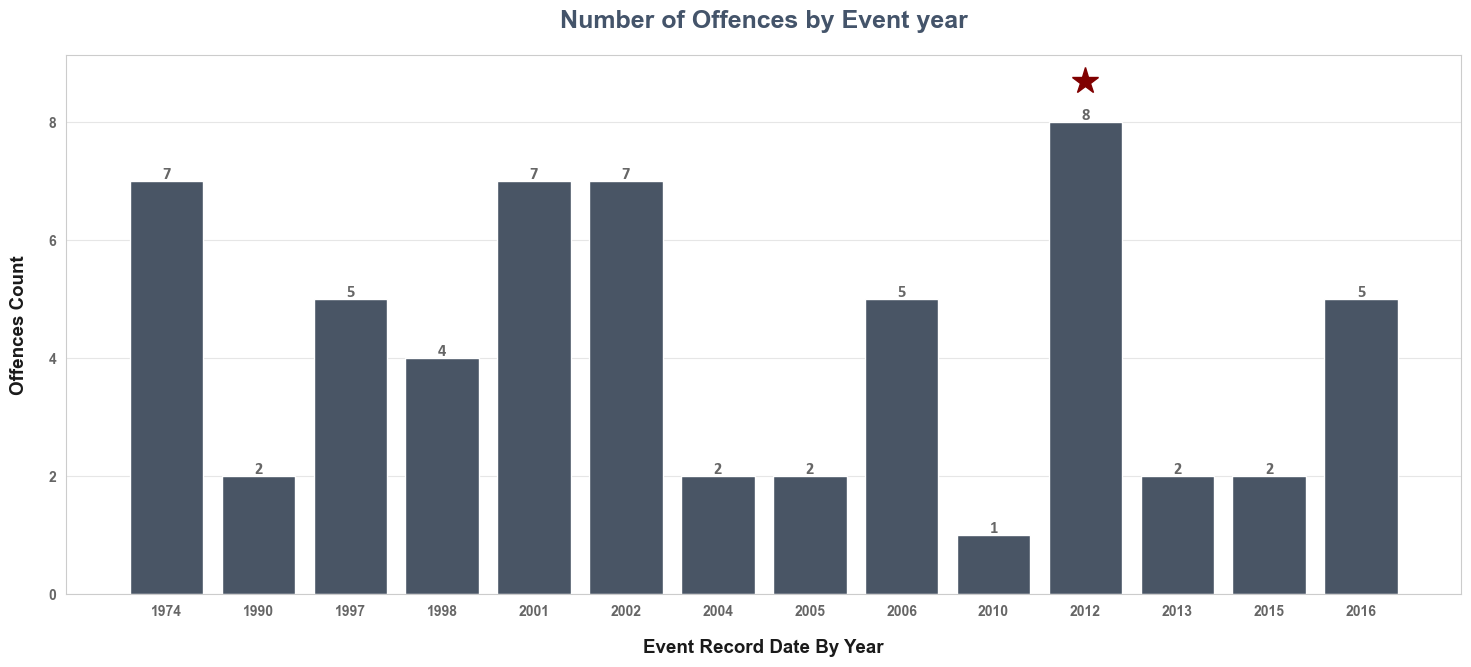

In [67]:
sb.set_style("whitegrid", {"grid.color": ".9"})
plt.figure(figsize=(18, 7))
grouped_rec_off_event_y_bar= rec_off.groupby(rec_off["Event_Record_Date"].dt.year).agg({"Offence_ID_By_Law":'count'}).reset_index()
grouped_rec_off_event_y_bar1=sb.barplot(data=grouped_rec_off_event_y_bar, x='Event_Record_Date', y='Offence_ID_By_Law', color='#44546A')
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 16
plt.title("Number of Offences by Event year" ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=20)
plt.xlabel('Event Record Date By Year', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Offences Count', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
grouped_rec_off_event_y_bar1.bar_label(grouped_rec_off_event_y_bar1.containers[0], fontsize=12, fontweight='bold', color='.4')
grouped_rec_off_event_y_bar1.plot('2012', 8.7, "*", markersize=20, color="#800000")
plt.show()

**Assumptioms and Main Conclusions**
- The highest number of offences (a total of 8) occurred in 2012, in contrast to the other years spanning from 1974 to 2016

#### **Number of offences By year of open record offences**

In [68]:
rec_off.groupby([rec_off["Open_Record_Date"].dt.year])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Open_Record_Date                   
1984                              7
1993                              2
2000                              4
2001                              1
2002                              5
2003                              5
2004                              7
2005                              1
2007                              1
2008                              4
2009                              2
2013                              3
2014                              5
2015                              3
2016                              2
2017                              2
2018                              5

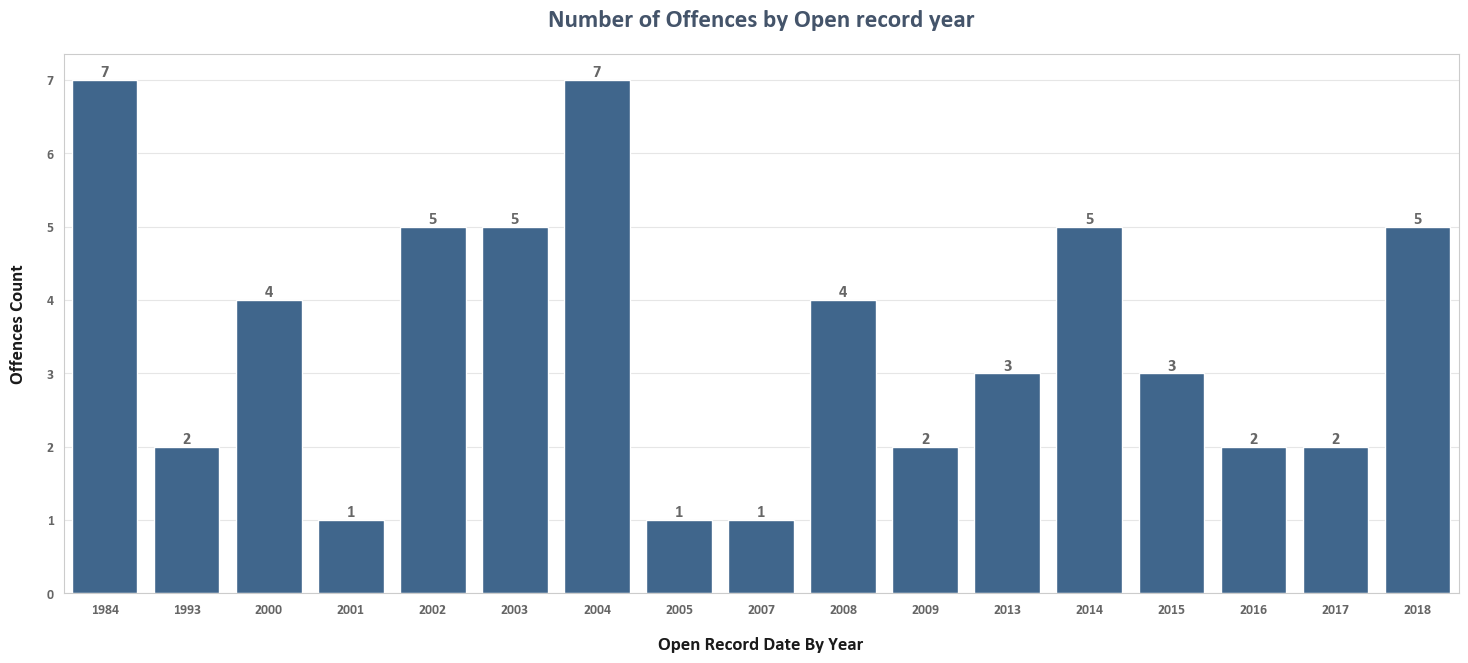

In [69]:
plt.figure(figsize=(18, 7))
grouped_rec_off_open_y_bar= rec_off.groupby(rec_off["Open_Record_Date"].dt.year).agg({"Offence_ID_By_Law":'count'}).reset_index()
grouped_rec_off_open_y_bar1=sb.barplot(data=grouped_rec_off_open_y_bar, x='Open_Record_Date', y='Offence_ID_By_Law', color='#336699')
plt.title("Number of Offences by Open record year" ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=20)
plt.xlabel('Open Record Date By Year', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Offences Count', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
grouped_rec_off_open_y_bar1.bar_label(grouped_rec_off_open_y_bar1.containers[0], fontsize=12, fontweight='bold', color='.4')
plt.show()

**Assumptioms and Main Conclusions**
- In both 1984 and 2004, the highest number of offenses (a total of 7) were recorded, standing out among the years from 1984 to 2018

#### **Number of offences By month of event record offences**

In [70]:
rec_off.groupby([rec_off["Event_Record_Date"].dt.month])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Event_Record_Date                   
1                                  3
2                                  2
4                                  2
5                                  3
7                                  9
8                                  9
9                                  1
10                                 2
11                                14
12                                14

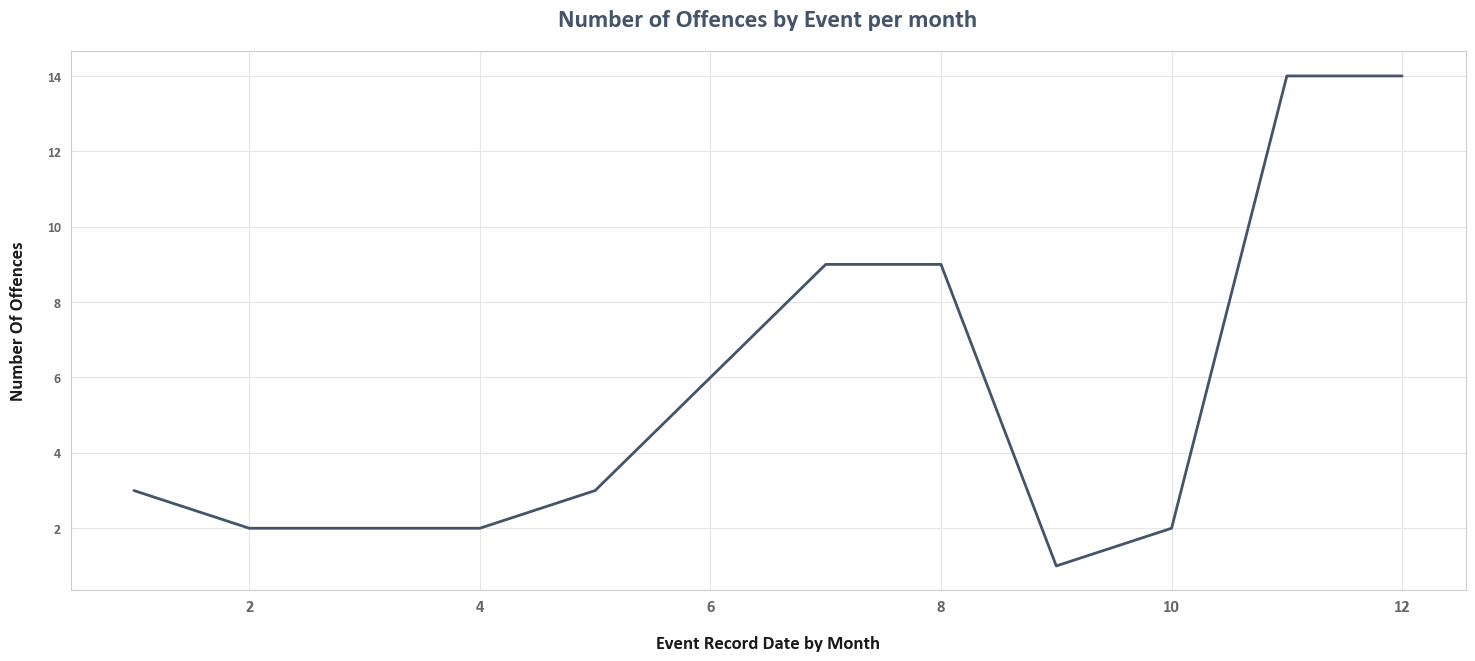

In [71]:
#*set variable Event_Record_Date by month*
rec_off['mnt_event'] = rec_off['Event_Record_Date'].dt.month
#*set index for counting Offences by event record date by month*
count_rec_off_event_m_line = rec_off.groupby('mnt_event')['Offence_ID_By_Law'].count().reset_index()
#*setting the visualization*
plt.figure(figsize=(18, 7))
sb.lineplot(data=count_rec_off_event_m_line, x='mnt_event', y='Offence_ID_By_Law', color="#44546A", linewidth=2)
plt.title("Number of Offences by Event per month", loc="center", fontsize=18, fontweight="bold", color="#44546A", pad=18)
plt.xlabel("Event Record Date by Month", fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel("Number Of Offences", fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=12, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()


**Assumptioms and Main Conclusions**
- The lineplot shows that the months of November and December are the months in which the most offenses occur (a total of 14 offenses) compared to the other months of the year.

#### **Number of offences By Police Station Name**

In [72]:
rec_off.groupby(["Police_Station"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Police_Station                     
Station_1#PPD                     3
Station_11#PPD                    4
Station_13#LVMPD                  5
Station_13#SFPD                   5
Station_14#LAPD                   2
Station_21#CPD                    2
Station_22#NYPD                  13
Station_443#HPD                   1
Station_555#SAPD                  5
Station_879#BPD                   2
Station_95#CPD                    3

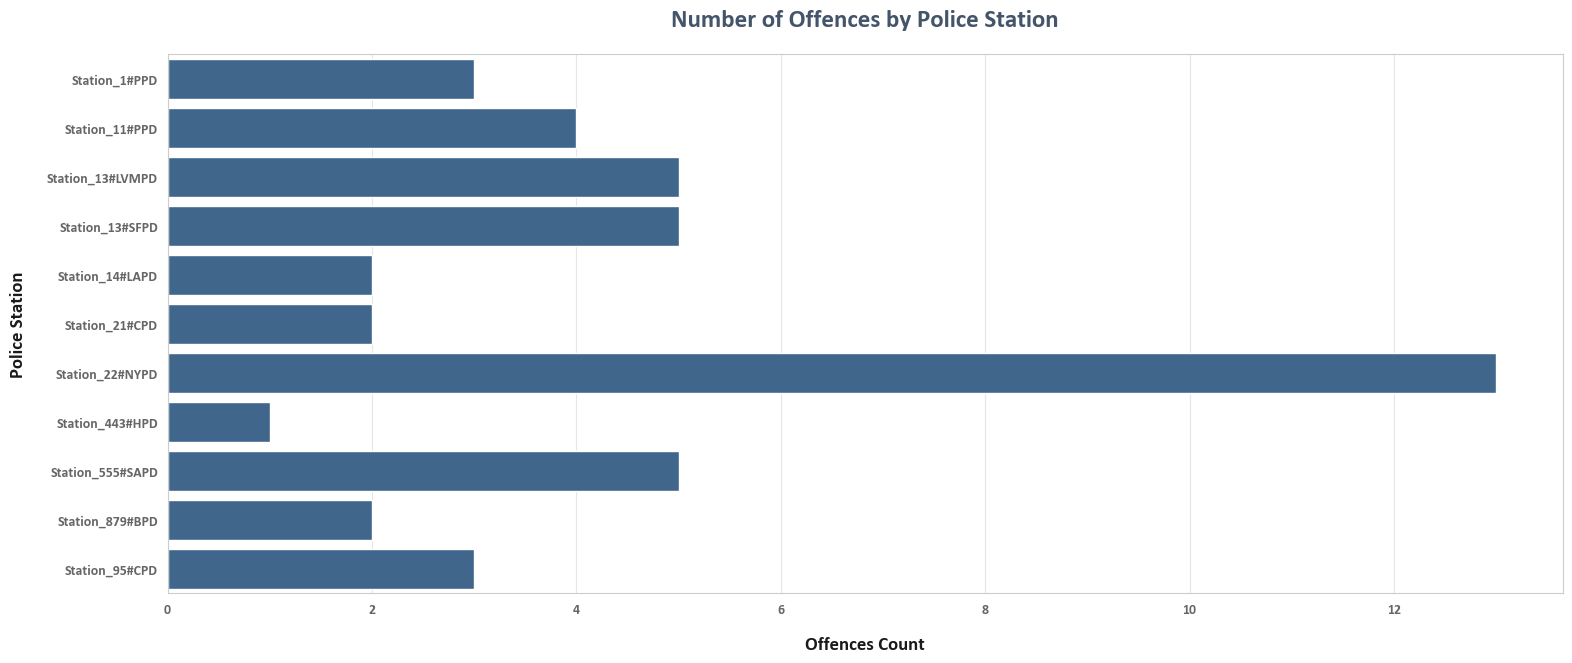

In [73]:
plt.figure(figsize=(18, 7))
grouped_rec_off_Stations_bar= rec_off.groupby(rec_off["Police_Station"]).agg({"Offence_ID_By_Law":'count'}).reset_index()
grouped_rec_off_Stations_bar1=sb.barplot(data=grouped_rec_off_Stations_bar, x='Offence_ID_By_Law', y='Police_Station', color='#336699')
plt.title("Number of Offences by Police Station" ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=20)
plt.xlabel('Offences Count', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Police Station', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()

**Assumptioms and Main Conclusions**
- The barplot clearly indicates that the NYPD station handled a total of 13 offences based on the available records spanning from 1984 to 2018.
- Conversely, the diagram reveals that the HPD station encountered only one offence, making it the station with the fewest incidents among those included in the sample during the same time period.

#### **Number of offences By Police Station Name - Categorized by Group name offences**

In [74]:
rec_off.groupby([rec_off["Police_Station"],rec_off["Offence_Group_Name"]])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Police_Station   Offence_Group_Name                      
Station_1#PPD    Instrumental=Offences                  1
                 Terrorism=Offences                     1
                 Violent=Offences                       1
Station_11#PPD   Computer=Offences                      2
                 White_Collar=Offences                  2
Station_13#LVMPD Sexual=Offences                        2
                 Violent=Offences                       3
Station_13#SFPD  Computer=Offences                      1
                 Instrumental=Offences                  1
                 Violent=Offences                       3
Station_14#LAPD  Computer=Offences                      1
                 White_Collar=Offences                  1
Station_21#CPD   Violent=Offences                       2
Station_22#NYPD  Computer=Offences                      3
                 Instrumental=Offences                  2
                 Terrorism=Offences                     1
                 Violent=Offences                       3
                 White_Collar=Offences                  4
Station_443#HPD  Violent=Offences                       1
Station_555#SAPD Instrumental=Offences                  2
                 Violent=Offences                       3
Station_879#BPD  White_Collar=Offences                  2
Station_95#CPD   Instrumental=Offences                  2
                 Violent=Offences                       1

C:\Users\razha\AppData\Local\Temp\ipykernel_12604\2095881074.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pg10.set_xticklabels(pg10.get_xticklabels(), fontsize=10, fontweight='bold', color='.4', rotation=35, ha='right')
C:\Users\razha\AppData\Local\Temp\ipykernel_12604\2095881074.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pg10.set_yticklabels(pg10.get_yticklabels(), fontsize=10, fontweight='bold', color='.4')


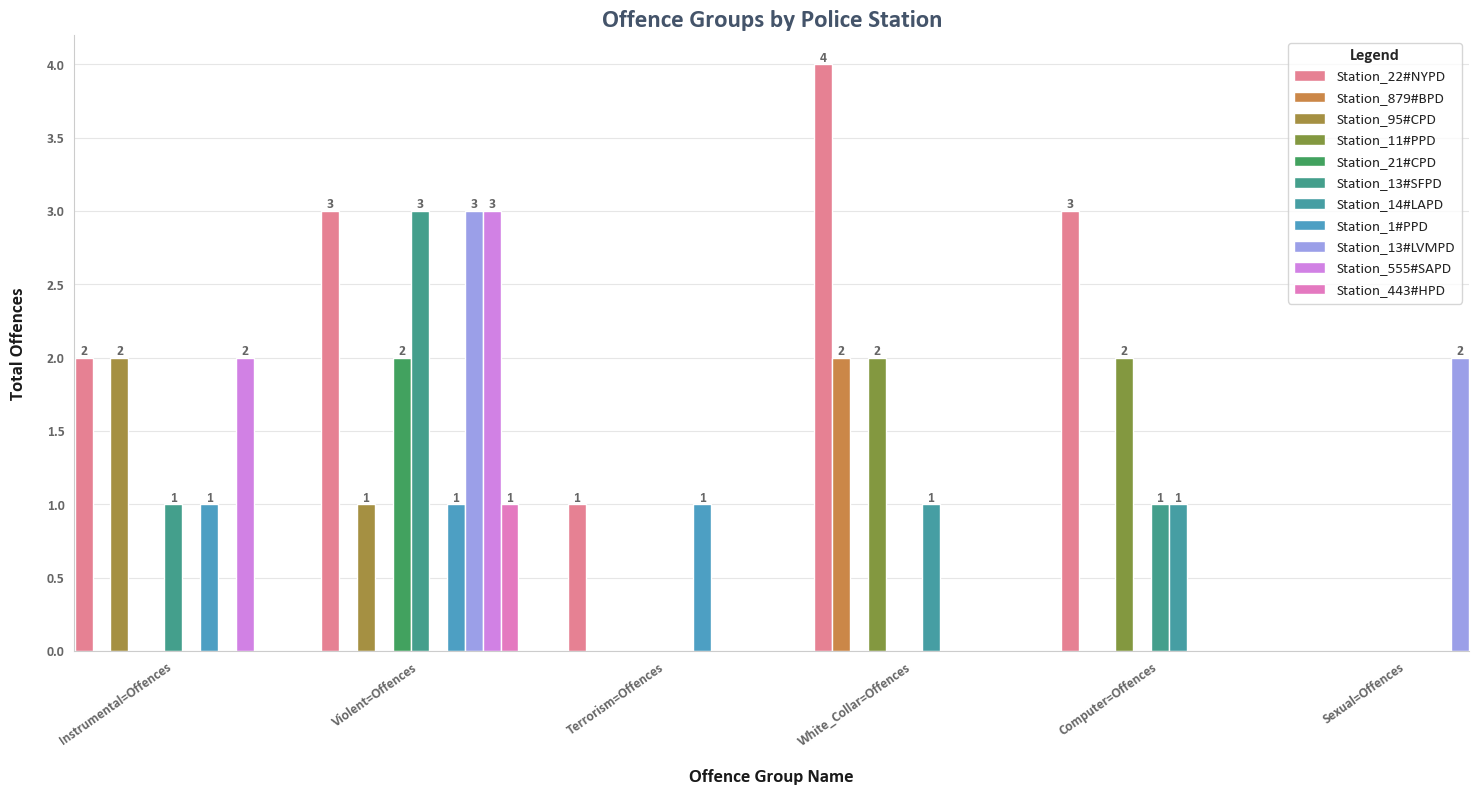

In [75]:
special_colors_countplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_countplot1))
plt.figure(figsize=(18, 8))
pg10=sb.countplot(data=rec_off, x="Offence_Group_Name" ,hue="Police_Station")
pg10.set_title("Offence Groups by Police Station", fontdict={"size":18, "weight":"bold"}, color="#44546A")
pg10.set_xlabel("Offence Group Name", fontdict={"size":13.5, "weight":"bold"}, labelpad=15, color=".1")
pg10.set_ylabel("Total Offences", fontdict={"size":13.5, "weight":"bold"}, labelpad=15, color=".1")
pg10.set_xticklabels(pg10.get_xticklabels(), fontsize=10, fontweight='bold', color='.4', rotation=35, ha='right')
pg10.set_yticklabels(pg10.get_yticklabels(), fontsize=10, fontweight='bold', color='.4')
legend_police_station= plt.legend(title="Police Station", loc="best", prop={"size": 11}) 
legend_police_station.set_title("Legend", prop={"size": 12, "weight":"bold"})
for container in pg10.containers:
    pg10.bar_label(container, fontsize=10, color='.4', fontweight='bold')
sb.despine()
plt.margins(x=0.0002)
plt.show()

**Assumptioms and Main Conclusions**
1. Countplot Segmentation: The chart illustrates the breakdown of police stations based on offense groups (offenses committed between 1984 and 2018).
2. Violent Crimes: Most stations predominantly handle cases related to violent crimes.
3. Sexual Offenses Reporting: Interestingly, there appears to be limited reporting of sexual offenses across most stations, except for a minor registration at the LVMPD station.
4. NYPD Station Specialization: The NYPD station stands out for its involvement in white-collar crimes (4 cases) and computer-related offenses (3 cases).

#### **Number of offences By State Name**

In [76]:
rec_off.groupby(["State_Name_Event"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event                   
Arizona                           3
California                        7
Colorado                          9
Illinois                          3
Maryland                          2
Nevada                            5
New_York                         13
Ohio                              2
Pennsylvania                      4
Texas                            11

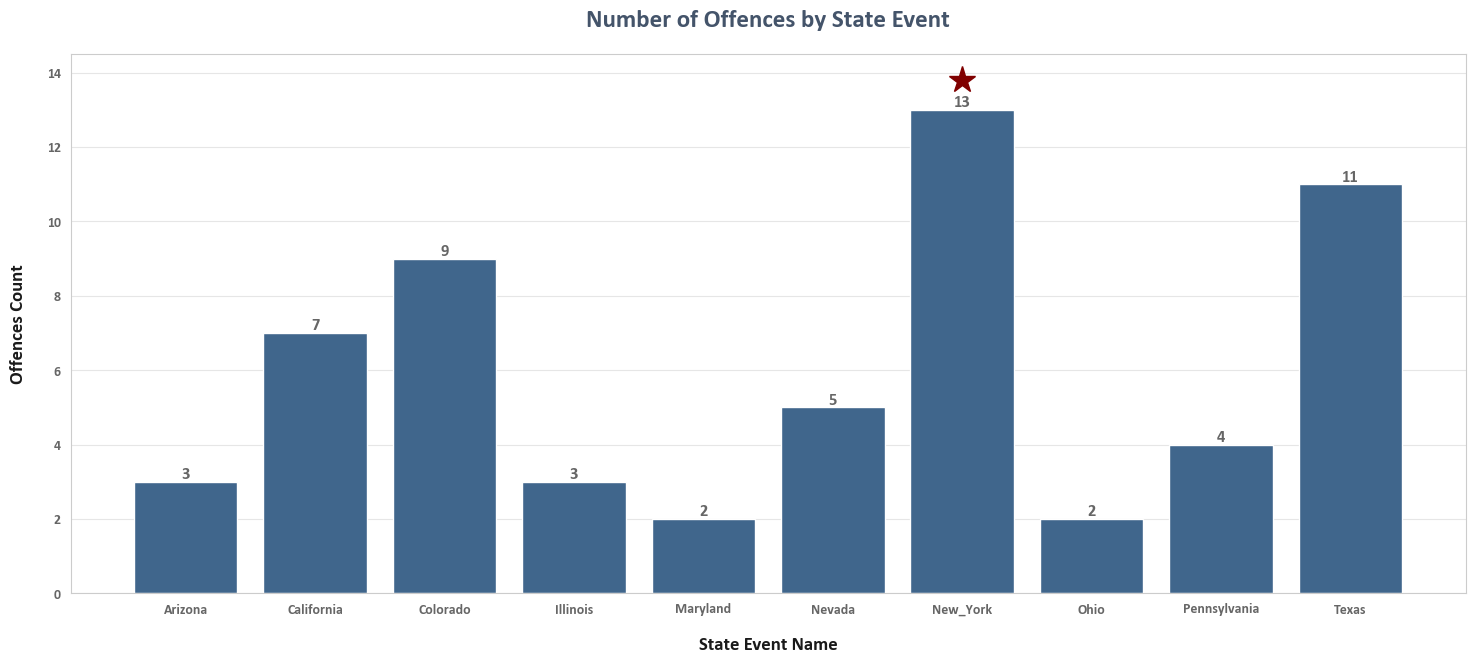

In [77]:
plt.figure(figsize=(18, 7))
grouped_rec_off_state_y_bar= rec_off.groupby(rec_off["State_Name_Event"]).agg({"Offence_ID_By_Law":'count'}).reset_index()
grouped_rec_off_state_y_bar1=sb.barplot(data=grouped_rec_off_state_y_bar, x='State_Name_Event', y='Offence_ID_By_Law', color='#336699')
plt.title("Number of Offences by State Event" ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=20)
plt.xlabel('State Event Name', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Offences Count', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
grouped_rec_off_state_y_bar1.bar_label(grouped_rec_off_state_y_bar1.containers[0], fontsize=12, fontweight='bold', color='.4')
grouped_rec_off_state_y_bar1.plot('New_York', 13.8, "*", markersize=20, color="#800000")
plt.show()

**Assumptioms and Main Conclusions**
1. Barplot Overview: The barplot visualizes the occurrence of crimes between 1984 and 2018 across various states in the United States, based on the provided sample data.
2. High Offense State: Notably, the state with the highest number of offenses is New York, recording a total of 13 incidents.
3. Low Offense States: Conversely, Maryland and Ohio have the lowest occurrence of offenses, each reporting only 2 incidents in total.

#### **Number of offences By Group Crime**

In [78]:
rec_off.groupby(["Offence_Group_Name"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Offence_Group_Name                      
Computer=Offences                      7
Drugs=Offences                         1
Instrumental=Offences                  8
Sexual=Offences                        6
Terrorism=Offences                     2
Violent=Offences                      26
White_Collar=Offences                  9

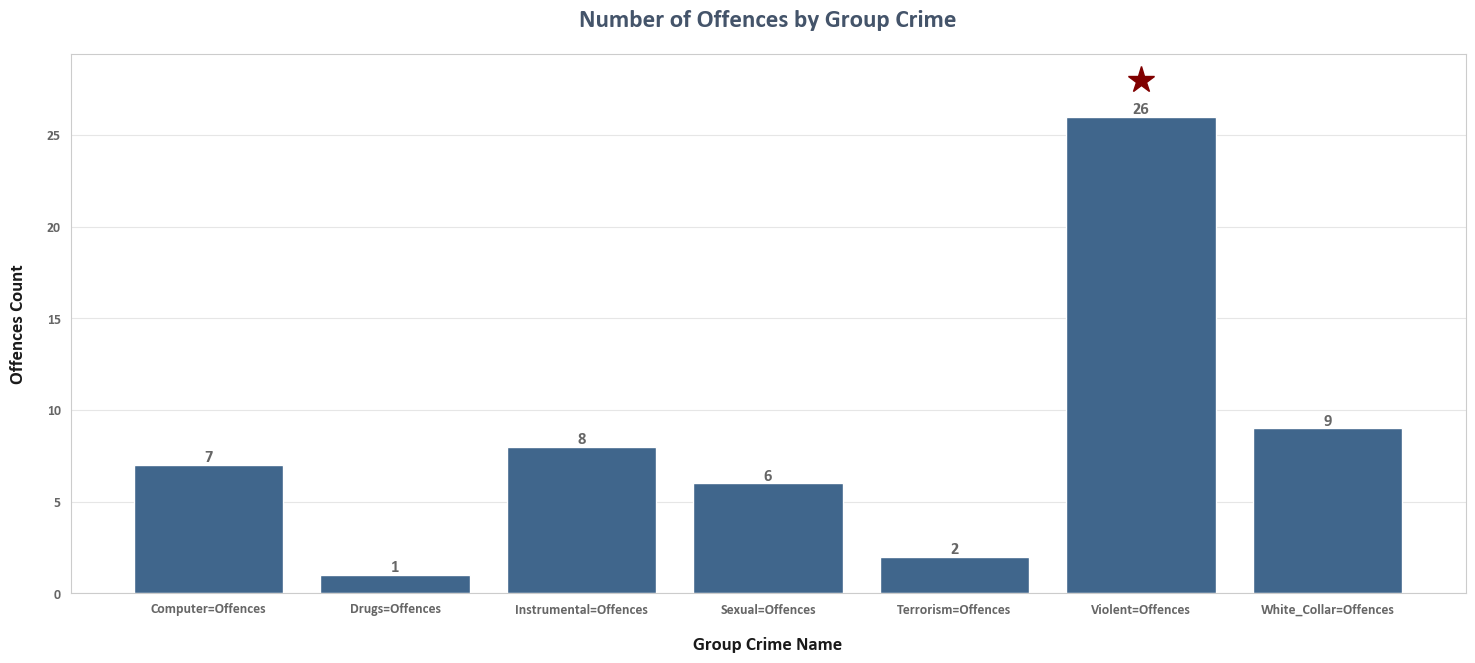

In [79]:
plt.figure(figsize=(18, 7))
grouped_rec_off_offence_group_bar= rec_off.groupby(rec_off["Offence_Group_Name"]).agg({"Offence_ID_By_Law":'count'}).reset_index()
grouped_rec_off_offence_group_bar1=sb.barplot(data=grouped_rec_off_offence_group_bar, x='Offence_Group_Name', y='Offence_ID_By_Law', color='#336699')
plt.title("Number of Offences by Group Crime" ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=20)
plt.xlabel('Group Crime Name', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Offences Count', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
grouped_rec_off_offence_group_bar1.bar_label(grouped_rec_off_offence_group_bar1.containers[0], fontsize=12, fontweight='bold', color='.4')
grouped_rec_off_offence_group_bar1.plot('Violent=Offences', 28, "*", markersize=20, color="#800000")
plt.show()

**Assumptioms and Main Conclusions**
1. Barplot Overview: The chart depicts the occurrence of offenses between 1984 and 2018 across various offense groups in the United States, based on the provided sample data.
2. High-Frequency Group: Notably, the most prevalent crime group during those years is the category of violent offenses, totaling 26 incidents.
3. Low-Frequency Groups: Conversely, the groups related to terrorist offenses and drug offenses have the lowest occurrence, with 2 incidents in the terrorist offenses category and 1 incident in the drug offenses category.

#### **Number of offences By State Name - Categorized by Group offences**

In [80]:
rec_off.groupby(["State_Name_Event","Offence_Group_Name"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event Offence_Group_Name                      
Arizona          Instrumental=Offences                  1
                 Terrorism=Offences                     1
                 Violent=Offences                       1
California       Computer=Offences                      2
                 Instrumental=Offences                  1
                 Violent=Offences                       3
                 White_Collar=Offences                  1
Colorado         Sexual=Offences                        2
                 Violent=Offences                       7
Illinois         Instrumental=Offences                  2
                 Violent=Offences                       1
Maryland         White_Collar=Offences                  2
Nevada           Sexual=Offences                        2
                 Violent=Offences                       3
New_York         Computer=Offences                      3
                 Instrumental=Offences                  2
                 Terrorism=Offences                     1
                 Violent=Offences                       3
                 White_Collar=Offences                  4
Ohio             Violent=Offences                       2
Pennsylvania     Computer=Offences                      2
                 White_Collar=Offences                  2
Texas            Drugs=Offences                         1
                 Instrumental=Offences                  2
                 Sexual=Offences                        2
                 Violent=Offences                       6

C:\Users\razha\AppData\Local\Temp\ipykernel_12604\1791474323.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pg11.set_xticklabels(pg11.get_xticklabels(), fontsize=10, fontweight='bold', color='.4', ha='center')
C:\Users\razha\AppData\Local\Temp\ipykernel_12604\1791474323.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pg11.set_yticklabels(pg11.get_yticklabels(), fontsize=10, fontweight='bold', color='.4')


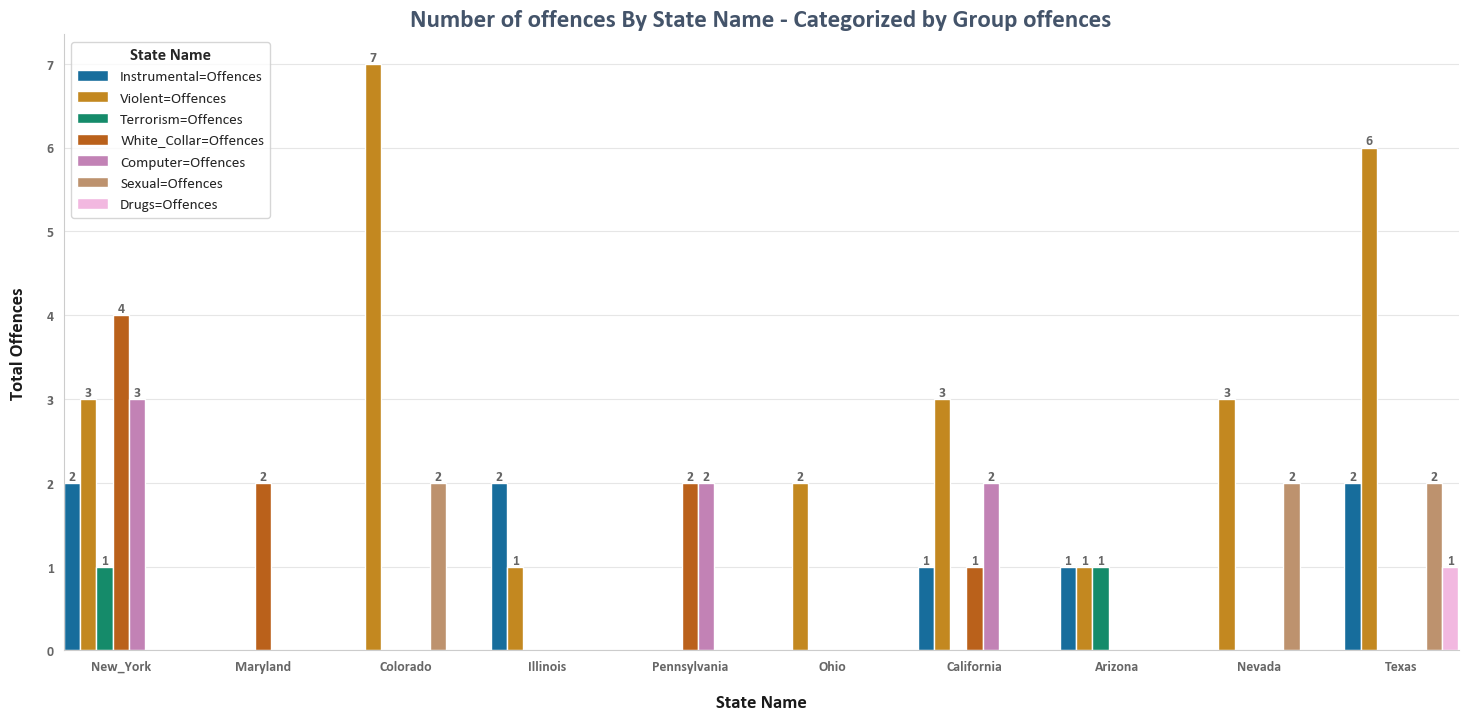

In [81]:
special_colors_countplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_countplot1))
plt.figure(figsize=(18, 8))
pg11=sb.countplot(data=rec_off, x="State_Name_Event" ,hue="Offence_Group_Name")
pg11.set_title("Number of offences By State Name - Categorized by Group offences", fontdict={"size":18, "weight":"bold"}, color="#44546A")
pg11.set_xlabel("State Name", fontdict={"size":13.5, "weight":"bold"}, labelpad=15, color=".1")
pg11.set_ylabel("Total Offences", fontdict={"size":13.5, "weight":"bold"}, labelpad=15, color=".1")
pg11.set_xticklabels(pg11.get_xticklabels(), fontsize=10, fontweight='bold', color='.4', ha='center')
pg11.set_yticklabels(pg11.get_yticklabels(), fontsize=10, fontweight='bold', color='.4')
legend_state_station= plt.legend(title="State Name", loc="best", prop={"size": 11}) 
legend_state_station.set_title("State Name", prop={"size": 12, "weight":"bold"})
for container in pg11.containers:
    pg11.bar_label(container, fontsize=10, color='.4', fontweight='bold')
sb.despine()
plt.margins(x=0.0002)
plt.show()

**Assumptioms and Main Conclusions**
- Countplot Overview: The chart depicts the occurrence of offenses between 1984 and 2018 across different offense groups in the United States, based on the provided sample data.
- Prominent Offenses in Colorado and Texas: Notably, the states of Colorado (7 offenses) and Texas (6 offenses) exhibit a higher occurrence of violent offenses.
- Terrorist Offenses in Arizona and New York: The group of terrorist offenses is evident in both Arizona and New York, with one offense recorded in each state.
- Drug Offenses in Texas: Texas also stands out for its occurrence of drug offenses, with one recorded incident.
- White-Collar and Computer Crimes in New York: New York state shows prominence in white-collar crimes (4 incidents) and computer crimes (3 incidents) compared to other offense categories in the sample.
- Sex Offenses in Colorado, Nevada, and Texas: The group of sex offenses is evident in the states of Colorado, Nevada, and Texas, with 2 offenses in each state, respectively.

#### **Number of offences By Crime Name**

In [82]:
rec_off.groupby(["Crime_Name"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
Crime_Name                                  
Arson                                      1
Attack                                     9
Blackmail_and_threats                      2
Drug_Self_Use                              1
Forgery                                    3
Fraud                                      6
Global_Terrorism                           2
Homicide                                   7
Human_Traffic                              1
Identity_Theft                             5
Kidnapping                                 3
Killing                                    1
Pedophilia                                 1
Pimping                                    1
Rape                                       4
Robbery                                    5
Theft                                      3
Theft_Vehicle                              3
Violation_of_public_order                  1

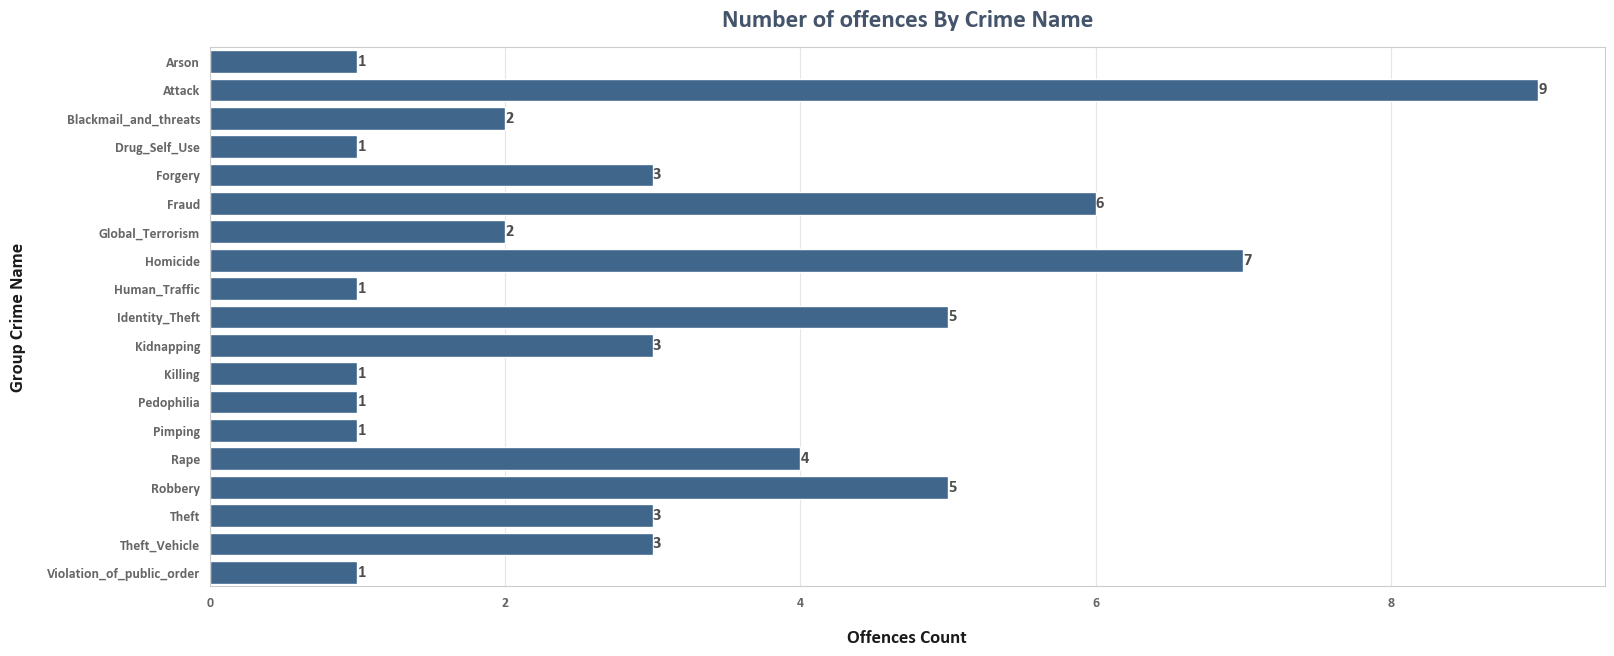

In [83]:
plt.figure(figsize=(18, 7))
grouped_rec_off_offence_crime_bar= rec_off.groupby(rec_off["Crime_Name"]).agg({"Offence_ID_By_Law":'count'}).reset_index()
grouped_rec_off_offence_crime_bar1=sb.barplot(data=grouped_rec_off_offence_crime_bar, x='Offence_ID_By_Law', y='Crime_Name', color='#336699')
plt.title("Number of offences By Crime Name" ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=15)
plt.xlabel('Offences Count', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Group Crime Name', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
grouped_rec_off_offence_crime_bar1.bar_label(grouped_rec_off_offence_crime_bar1.containers[0], fontsize=12, fontweight='bold', color='.3')
plt.show()

**Assumptioms and Main Conclusions**
1. Barplot Overview: The barplot visualizes the occurrence of crimes between 1984 and 2018 across different crime types in the United States, based on the provided sample data.
2. Prominent Offenses: Notably, four types of offenses stand out in this sample:
* **Assault:** A total of 9 offenses.
* **Murder:** A total of 7 offenses.
* **Fraud:** A total of 6 offenses.
* **Identity theft and robbery:** Each with a total of 5 offenses.

#### **Number of offences By State Name - Categorized by Crime name offences**

In [84]:
rec_off.groupby(["State_Name_Event","Crime_Name"])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Event Crime_Name                                  
Arizona          Attack                                     1
                 Global_Terrorism                           1
                 Violation_of_public_order                  1
California       Attack                                     1
                 Fraud                                      1
                 Identity_Theft                             2
                 Robbery                                    2
                 Theft                                      1
Colorado         Attack                                     2
                 Homicide                                   3
                 Kidnapping                                 2
                 Pedophilia                                 1
                 Rape                                       1
Illinois         Arson                                      1
                 Attack                                     1
                 Theft_Vehicle                              1
Maryland         Forgery                                    1
                 Fraud                                      1
Nevada           Attack                                     1
                 Homicide                                   2
                 Rape                                       2
New_York         Blackmail_and_threats                      2
                 Fraud                                      4
                 Global_Terrorism                           1
                 Homicide                                   1
                 Identity_Theft                             1
                 Robbery                                    2
                 Theft                                      2
Ohio             Attack                                     1
                 Killing                                    1
Pennsylvania     Forgery                                    2
                 Identity_Theft                             2
Texas            Attack                                     2
                 Drug_Self_Use                              1
                 Homicide                                   1
                 Human_Traffic                              1
                 Kidnapping                                 1
                 Pimping                                    1
                 Rape                                       1
                 Robbery                                    1
                 Theft_Vehicle                              2

C:\Users\razha\AppData\Local\Temp\ipykernel_12604\2277489634.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pg16.set_xticklabels(pg16.get_xticklabels(), fontdict={"size":10, "weight":"bold"}, color=".4")
C:\Users\razha\AppData\Local\Temp\ipykernel_12604\2277489634.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pg16.set_yticklabels(pg16.get_yticklabels(), fontdict={"size":10, "weight":"bold"}, color=".4")


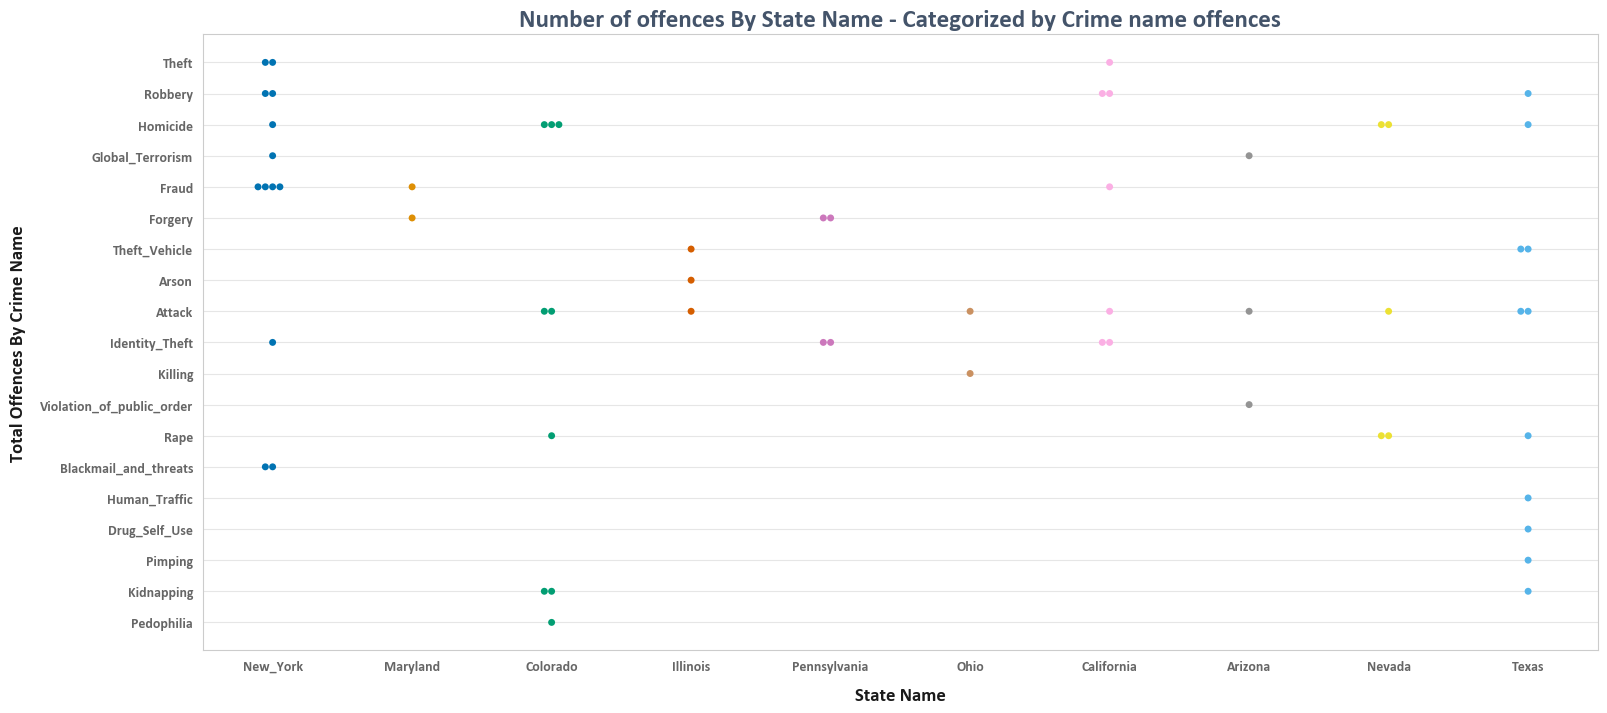

In [85]:
special_colors_swarmplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_swarmplot1))
plt.figure(figsize=(18, 8))
pg16=sb.swarmplot(data=rec_off, x="State_Name_Event", y="Crime_Name", hue="State_Name_Event")
pg16.set_title("Number of offences By State Name - Categorized by Crime name offences", fontdict={"size":18, "weight":"bold"}, color="#44546A")
pg16.set_xlabel("State Name", fontdict={"size":13.5, "weight":"bold"}, labelpad=10, color=".1")
pg16.set_ylabel("Total Offences By Crime Name", fontdict={"size":13.5, "weight":"bold"}, labelpad=10, color=".1")
pg16.set_xticklabels(pg16.get_xticklabels(), fontdict={"size":10, "weight":"bold"}, color=".4")
pg16.set_yticklabels(pg16.get_yticklabels(), fontdict={"size":10, "weight":"bold"}, color=".4")
plt.show()

**Assumptioms and Main Conclusions**
- Swarmplot Overview: The chart illustrates the occurrence of crimes between 1984 and 2018 across different types of offenses in various states of the United States, based on the provided sample data.
- Prominent Offenses in New York: Notably, the most common offense in New York state is fraud, with a total of 4 incidents.
- Murder in Colorado: Additionally, murder stands out as the most common crime in the state of Colorado, including 3 incidents.
- Scope and General Distribution: It’s important to note that this analysis can be expanded to describe the overall distribution of offenses across different crime types in other countries and under different contexts.

---------------------------------------------------------------------------------------------------------------------------------------

### Police Records and Offences - With Involvments information 
**Participants (inv_rec_off):** 
1.  The dataset provides detailed information about involvement in criminal incidents, categorized and analyzed based on police records and cases across various US police departments. The focus is on understanding the dynamics of offenses and the roles played by different individuals.

2. Three Major Involvement Groups: Within this dataset, we identify three primary groups of involvement:
     * **Criminals:** These are individuals directly responsible for committing offenses.
     * **Victims:** This group includes those who have been affected by criminal acts.
     * **Suspects/Arrested:** Suspects are individuals under investigation or scrutiny in connection with criminal incidents.
     
By examining these involvement categories, we can gain insights into crime patterns, victimization, and potential suspects. This analysis can be valuable for law enforcement agencies and policymakers.

### Data Frames Details and Data cleansing 
**ETL Processes (Extract, Transform, Load):**
- I refine and clean the raw data and add raw data, change data type for relevant columns, create null treatment for problematic values and ensuring accuracy and consistency.

#### Create a data frame variable named ‘inv_rec_off’ by joining participations (Involvments) information with police offenses data from the SQL view table.
##### You have two options for creating data frame variable - choose the one that suits your needs:

In [86]:
#inv_rec_off = pd.read_sql("select * from Record_Offences_Involvment",conn)

In [87]:
#inv_rec_off = pd.read_excel(r"C:\Users\razha\Documents\Python\Project\.ipynb_checkpoints\df2_inv_rec_off.xlsx")

#### Information about Data Frame of Police Records Data and Offences Data and Participations (Involvments) Data

In [88]:
inv_rec_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Involvment_ID         71 non-null     int64  
 1   Record_ID             71 non-null     int64  
 2   Type_ID_Involvment    71 non-null     int64  
 3   Type_Name_Involvment  71 non-null     object 
 4   Employment_Type_ID    62 non-null     float64
 5   Employment_Type_Name  62 non-null     object 
 6   State_ID_Living       71 non-null     int64  
 7   State_Name_Living     71 non-null     object 
 8   Income_per_month      62 non-null     float64
 9   Relate_Involved       71 non-null     object 
 10  Prisoner_Inmate_ID    41 non-null     float64
 11  Past_Num_Events       24 non-null     float64
 12  Offence_ID_By_Law     41 non-null     float64
 13  Offence_ID_Group      41 non-null     float64
 14  Offence_Group_Name    41 non-null     object 
 15  Crime_Name            41 

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
### Police Records cases and Offences and Participations (Involvments)
 **CodeBook Information about the data frame:**
- **Involvment_ID** - ID of the person involved in the crime

- **Record_ID** - ID number of the police recorded case

- **Type_ID_Involvment** - ID of the type of involvement: 10 - criminal; 11 - victim; 13 - criminal - suspect; 15 - engaged in terrorist activities

- **Type_Name_Involvment** - The name of the type of involvement: Criminal, Victim, criminal_s, and Criminal_Terrorism

- **Employment_Type_ID** - ID of the type of employment of the person involved

- **Employment_Type_Name** - ID of the type of employment of the person involved

- **State_ID_Living** - ID of the state of residence of the person involved

- **State_Name_Living** - This is the name of residence of the person involved

- **Income_per_month** - The monthly salary of the person involved (on average)

- **Relate_Involved** - The relationship involved in the crime - offender, victim, suspect, terrorist organization

- **Prisoner_Inmate_ID** - This data contains unique identification numbers for each prisoner, linked to their associated offense(s).

- **Past_Num_Events** - Total execution of previous offenses

- **Offence_ID_By_Law** - This data provides the distinct ID number for each offense, which can occur multiple times within each police record.

- **Offence_ID_Group** - This data is ID number that categorizes offenses into distinct groups based on specific characteristics. These groups serve as collective labels for the various offenses, with distinctions made according to severity and classification.

- **Offence_Group_Name** - This data is the group offences name that categorizes offenses into distinct groups based on specific characteristics. These groups serve as collective labels for the various offenses, with distinctions made according to severity and classification.

- **Crime_Name** - This data is the specific offences name.

- **Police_Station** - This is the Station name.

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#### Top 10 rows

In [89]:
inv_rec_off.head(10)

Involvment_ID  Record_ID  Type_ID_Involvment Type_Name_Involvment  \
0              1         11                  10             Criminal   
1              2         11                  10             Criminal   
2              3         11                  10             Criminal   
3              4         11                  10             Criminal   
4              5         11                  11               Victim   
5              6         10                  11               Victim   
6              7         12                  15   Criminal_Terrorism   
7              8         13                  10             Criminal   
8              8         13                  10             Criminal   
9              9         14                  11               Victim   

   Employment_Type_ID Employment_Type_Name  State_ID_Living State_Name_Living  \
0                15.0           Shopkeeper               10          New_York   
1                52.0         Car_Mechanic               10          New_York   
2                15.0           Shopkeeper               10          New_York   
3                30.0       Security_Guard               10          New_York   
4                45.0     Clinic_Secretary               10          New_York   
5                60.0              Teacher               10          New_York   
6                 NaN                  NaN               95             Libya   
7                90.0              Finance               22          Maryland   
8                90.0              Finance               22          Maryland   
9                48.0           Tour_Guide               18          Colorado   

   Income_per_month      Relate_Involved  Prisoner_Inmate_ID  Past_Num_Events  \
0            6500.0             Offender           2111630.0              NaN   
1            5500.0             Offender           3111630.0              1.0   
2            7300.0             Offender           4111417.0              NaN   
3            5700.0             Offender           5111640.0              3.0   
4           10869.0               Victim                 NaN              NaN   
5            9800.0               Victim                 NaN              NaN   
6               NaN  Terror_Orginization                 NaN              NaN   
7           19200.0             Offender           7131950.0              NaN   
8           19200.0             Offender           7131950.0              NaN   
9           15300.0               Victim                 NaN              NaN   

   Offence_ID_By_Law  Offence_ID_Group     Offence_Group_Name Crime_Name  \
0             1630.0            1600.0       Violent=Offences    Robbery   
1             1630.0            1600.0       Violent=Offences    Robbery   
2             1417.0            1400.0  Instrumental=Offences      Theft   
3             1640.0            1600.0       Violent=Offences   Homicide   
4                NaN               NaN                    NaN        NaN   
5                NaN               NaN                    NaN        NaN   
6                NaN               NaN                    NaN        NaN   
7             1950.0            1900.0  White_Collar=Offences      Fraud   
8             1951.0            1900.0  White_Collar=Offences    Forgery   
9                NaN               NaN                    NaN        NaN   

    Police_Station  
0  Station_22#NYPD  
1  Station_22#NYPD  
2  Station_22#NYPD  
3  Station_22#NYPD  
4              NaN  
5              NaN  
6              NaN  
7  Station_879#BPD  
8  Station_879#BPD  
9              NaN

#### Convert int/float
**change the data Type from int/float to object (string)**

In [90]:
inv_rec_off["Involvment_ID"]= inv_rec_off["Involvment_ID"].astype(str)
inv_rec_off["Record_ID"]= inv_rec_off["Record_ID"].astype(str)
inv_rec_off["Type_ID_Involvment"]= inv_rec_off["Type_ID_Involvment"].astype(str)
inv_rec_off["Employment_Type_ID"]= inv_rec_off["Employment_Type_ID"].astype(str)
inv_rec_off["State_ID_Living"]= inv_rec_off["State_ID_Living"].astype(str)
inv_rec_off["Prisoner_Inmate_ID"]= inv_rec_off["Prisoner_Inmate_ID"].astype(str)
inv_rec_off["Offence_ID_By_Law"]= inv_rec_off["Offence_ID_By_Law"].astype(str)
inv_rec_off["Offence_ID_Group"]= inv_rec_off["Offence_ID_Group"].astype(str)

**Information validation for changing the relevant data type**

In [91]:
inv_rec_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Involvment_ID         71 non-null     object 
 1   Record_ID             71 non-null     object 
 2   Type_ID_Involvment    71 non-null     object 
 3   Type_Name_Involvment  71 non-null     object 
 4   Employment_Type_ID    71 non-null     object 
 5   Employment_Type_Name  62 non-null     object 
 6   State_ID_Living       71 non-null     object 
 7   State_Name_Living     71 non-null     object 
 8   Income_per_month      62 non-null     float64
 9   Relate_Involved       71 non-null     object 
 10  Prisoner_Inmate_ID    71 non-null     object 
 11  Past_Num_Events       24 non-null     float64
 12  Offence_ID_By_Law     71 non-null     object 
 13  Offence_ID_Group      71 non-null     object 
 14  Offence_Group_Name    41 non-null     object 
 15  Crime_Name            41 

In [92]:
inv_rec_off.head(10)

Involvment_ID Record_ID Type_ID_Involvment Type_Name_Involvment  \
0             1        11                 10             Criminal   
1             2        11                 10             Criminal   
2             3        11                 10             Criminal   
3             4        11                 10             Criminal   
4             5        11                 11               Victim   
5             6        10                 11               Victim   
6             7        12                 15   Criminal_Terrorism   
7             8        13                 10             Criminal   
8             8        13                 10             Criminal   
9             9        14                 11               Victim   

  Employment_Type_ID Employment_Type_Name State_ID_Living State_Name_Living  \
0               15.0           Shopkeeper              10          New_York   
1               52.0         Car_Mechanic              10          New_York   
2               15.0           Shopkeeper              10          New_York   
3               30.0       Security_Guard              10          New_York   
4               45.0     Clinic_Secretary              10          New_York   
5               60.0              Teacher              10          New_York   
6                nan                  NaN              95             Libya   
7               90.0              Finance              22          Maryland   
8               90.0              Finance              22          Maryland   
9               48.0           Tour_Guide              18          Colorado   

   Income_per_month      Relate_Involved Prisoner_Inmate_ID  Past_Num_Events  \
0            6500.0             Offender          2111630.0              NaN   
1            5500.0             Offender          3111630.0              1.0   
2            7300.0             Offender          4111417.0              NaN   
3            5700.0             Offender          5111640.0              3.0   
4           10869.0               Victim                nan              NaN   
5            9800.0               Victim                nan              NaN   
6               NaN  Terror_Orginization                nan              NaN   
7           19200.0             Offender          7131950.0              NaN   
8           19200.0             Offender          7131950.0              NaN   
9           15300.0               Victim                nan              NaN   

  Offence_ID_By_Law Offence_ID_Group     Offence_Group_Name Crime_Name  \
0            1630.0           1600.0       Violent=Offences    Robbery   
1            1630.0           1600.0       Violent=Offences    Robbery   
2            1417.0           1400.0  Instrumental=Offences      Theft   
3            1640.0           1600.0       Violent=Offences   Homicide   
4               nan              nan                    NaN        NaN   
5               nan              nan                    NaN        NaN   
6               nan              nan                    NaN        NaN   
7            1950.0           1900.0  White_Collar=Offences      Fraud   
8            1951.0           1900.0  White_Collar=Offences    Forgery   
9               nan              nan                    NaN        NaN   

    Police_Station  
0  Station_22#NYPD  
1  Station_22#NYPD  
2  Station_22#NYPD  
3  Station_22#NYPD  
4              NaN  
5              NaN  
6              NaN  
7  Station_879#BPD  
8  Station_879#BPD  
9              NaN

#### Null Treatment
**Change the null value for Past_Num_Events variable to 0 value.** 
- In light of different calculations for a number of events that occurred in the past, the value 0 represents that person has no events in the past.

In [93]:
inv_rec_off["Past_Num_Events"] = inv_rec_off["Past_Num_Events"].fillna(0)

**Information validation for changing the null value**

In [94]:
inv_rec_off[["Past_Num_Events"]].head(20)

Past_Num_Events
0               0.0
1               1.0
2               0.0
3               3.0
4               0.0
5               0.0
6               0.0
7               0.0
8               0.0
9               0.0
10              0.0
11              1.0
12              0.0
13              2.0
14              0.0
15              0.0
16              0.0
17              0.0
18              0.0
19              0.0

In [95]:
inv_rec_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Involvment_ID         71 non-null     object 
 1   Record_ID             71 non-null     object 
 2   Type_ID_Involvment    71 non-null     object 
 3   Type_Name_Involvment  71 non-null     object 
 4   Employment_Type_ID    71 non-null     object 
 5   Employment_Type_Name  62 non-null     object 
 6   State_ID_Living       71 non-null     object 
 7   State_Name_Living     71 non-null     object 
 8   Income_per_month      62 non-null     float64
 9   Relate_Involved       71 non-null     object 
 10  Prisoner_Inmate_ID    71 non-null     object 
 11  Past_Num_Events       71 non-null     float64
 12  Offence_ID_By_Law     71 non-null     object 
 13  Offence_ID_Group      71 non-null     object 
 14  Offence_Group_Name    41 non-null     object 
 15  Crime_Name            41 

### Descriptive Statistcs
**Aggregating Data for Reports:**
   - I summarize and aggregate relevant information.
   - Reports provide insights into crime patterns and demographics.
   - Notice: the count is based on offences relate to participants (involvments)!

**Describe all Descriptive Statistcs in General - ALL**

In [96]:
inv_rec_off.describe(include="all")

Involvment_ID Record_ID Type_ID_Involvment Type_Name_Involvment  \
count             71        71                 71                   71   
unique            57        20                  4                    4   
top               35         9                 10             Criminal   
freq               3         8                 41                   41   
mean             NaN       NaN                NaN                  NaN   
std              NaN       NaN                NaN                  NaN   
min              NaN       NaN                NaN                  NaN   
25%              NaN       NaN                NaN                  NaN   
50%              NaN       NaN                NaN                  NaN   
75%              NaN       NaN                NaN                  NaN   
max              NaN       NaN                NaN                  NaN   

       Employment_Type_ID Employment_Type_Name State_ID_Living  \
count                  71                   62              71   
unique                 20                   19              11   
top                   nan              Finance              10   
freq                    9                    8              14   
mean                  NaN                  NaN             NaN   
std                   NaN                  NaN             NaN   
min                   NaN                  NaN             NaN   
25%                   NaN                  NaN             NaN   
50%                   NaN                  NaN             NaN   
75%                   NaN                  NaN             NaN   
max                   NaN                  NaN             NaN   

       State_Name_Living  Income_per_month Relate_Involved Prisoner_Inmate_ID  \
count                 71         62.000000              71                 71   
unique                11               NaN               4                 28   
top             New_York               NaN        Offender                nan   
freq                  14               NaN              40                 30   
mean                 NaN      13473.016129             NaN                NaN   
std                  NaN       8042.803886             NaN                NaN   
min                  NaN       4216.000000             NaN                NaN   
25%                  NaN       7890.000000             NaN                NaN   
50%                  NaN      10909.500000             NaN                NaN   
75%                  NaN      17654.000000             NaN                NaN   
max                  NaN      45986.000000             NaN                NaN   

        Past_Num_Events Offence_ID_By_Law Offence_ID_Group Offence_Group_Name  \
count         71.000000                71               71                 41   
unique              NaN                15                6                  5   
top                 NaN               nan              nan   Violent=Offences   
freq                NaN                30               30                 17   
mean           0.535211               NaN              NaN                NaN   
std            0.825158               NaN              NaN                NaN   
min            0.000000               NaN              NaN                NaN   
25%            0.000000               NaN              NaN                NaN   
50%            0.000000               NaN              NaN                NaN   
75%            1.000000               NaN              NaN                NaN   
max            3.000000               NaN              NaN                NaN   

       Crime_Name   Police_Station  
count          41               36  
unique         14               10  
top        Attack  Station_22#NYPD  
freq            8               10  
mean          NaN              NaN  
std           NaN              NaN  
min           NaN              NaN  
25%           NaN              NaN  
50%           NaN              NaN  
75%      

**Describe all Descriptive Statistcs in General - Numeric Type**

In [97]:
inv_rec_off.describe()

Income_per_month  Past_Num_Events
count         62.000000        71.000000
mean       13473.016129         0.535211
std         8042.803886         0.825158
min         4216.000000         0.000000
25%         7890.000000         0.000000
50%        10909.500000         0.000000
75%        17654.000000         1.000000
max        45986.000000         3.000000

**Describe all Descriptive Statistcs in General - String Type (object)**

In [98]:
inv_rec_off.describe(include='object')

Involvment_ID Record_ID Type_ID_Involvment Type_Name_Involvment  \
count             71        71                 71                   71   
unique            57        20                  4                    4   
top               35         9                 10             Criminal   
freq               3         8                 41                   41   

       Employment_Type_ID Employment_Type_Name State_ID_Living  \
count                  71                   62              71   
unique                 20                   19              11   
top                   nan              Finance              10   
freq                    9                    8              14   

       State_Name_Living Relate_Involved Prisoner_Inmate_ID Offence_ID_By_Law  \
count                 71              71                 71                71   
unique                11               4                 28                15   
top             New_York        Offender                nan               nan   
freq                  14              40                 30                30   

       Offence_ID_Group Offence_Group_Name Crime_Name   Police_Station  
count                71                 41         41               36  
unique                6                  5         14               10  
top                 nan   Violent=Offences     Attack  Station_22#NYPD  
freq                 30                 17          8               10

**Describe Main And Relavent Descriptive Statistics - Involvment_ID**

In [99]:
inv_rec_off["Involvment_ID"].mode()

0    35
1    52
Name: Involvment_ID, dtype: object

In [100]:
inv_rec_off["Involvment_ID"].count()

71

In [101]:
inv_rec_off["Involvment_ID"].nunique()

57

In [102]:
inv_rec_off["Involvment_ID"].value_counts(ascending=False).to_frame().head()

count
Involvment_ID       
35                 3
52                 3
16                 2
47                 2
30                 2

**Describe Main And Relavent Descriptive Statistics - Record_ID**

In [103]:
inv_rec_off["Record_ID"].mode()

0    3
1    9
Name: Record_ID, dtype: object

In [104]:
inv_rec_off["Record_ID"].count()

71

In [105]:
inv_rec_off["Record_ID"].nunique()

20

In [106]:
inv_rec_off["Record_ID"].value_counts(ascending=False).to_frame().head()

count
Record_ID       
9              8
3              8
19             7
17             5
2              5

**Describe Main And Relavent Descriptive Statistics - Type_Name_Involvment**

In [107]:
inv_rec_off["Type_Name_Involvment"].mode()

0    Criminal
Name: Type_Name_Involvment, dtype: object

In [108]:
inv_rec_off["Type_Name_Involvment"].count()

71

In [109]:
inv_rec_off["Type_Name_Involvment"].nunique()

4

In [110]:
inv_rec_off["Type_Name_Involvment"].value_counts(ascending=False).to_frame()

count
Type_Name_Involvment       
Criminal                 41
Victim                   23
Criminal_S                5
Criminal_Terrorism        2

**Describe Main And Relavent Descriptive Statistics - Employment_Type_Name**

In [111]:
inv_rec_off["Employment_Type_Name"].mode()

0    Finance
Name: Employment_Type_Name, dtype: object

In [112]:
inv_rec_off["Employment_Type_Name"].count()

62

In [113]:
inv_rec_off["Employment_Type_Name"].nunique()

19

In [114]:
inv_rec_off["Employment_Type_Name"].value_counts(ascending=False).to_frame()

count
Employment_Type_Name          
Finance                      8
Shopkeeper                   7
Farmer                       7
Car_Mechanic                 7
Marketing                    6
IT_Team                      5
DevOP                        5
Fitness_Guide                3
Bank_clerk                   2
Teacher                      2
Tour_Guide                   2
Waitress                     1
Insurance_company_clerk      1
Police_Officer               1
Therapeutic_Guide            1
Bank_manager                 1
Clinic_Secretary             1
Security_Guard               1
Flight_Mechanic              1

**Describe Main And Relavent Descriptive Statistics - State_Name_Living**

In [115]:
inv_rec_off["State_Name_Living"].mode()

0    New_York
Name: State_Name_Living, dtype: object

In [116]:
inv_rec_off["State_Name_Living"].count()

71

In [117]:
inv_rec_off["State_Name_Living"].nunique()

11

In [118]:
inv_rec_off["State_Name_Living"].value_counts(ascending=False).to_frame()

count
State_Name_Living       
New_York              14
Texas                 13
California            10
Colorado               9
Illinois               5
Pennsylvania           5
Nevada                 5
Arizona                4
Ohio                   3
Maryland               2
Libya                  1

**Describe Main And Relavent Descriptive Statistics - Income_per_month**

In [119]:
inv_rec_off["Income_per_month"].mode()

0    17654.0
Name: Income_per_month, dtype: float64

In [120]:
inv_rec_off["Income_per_month"].max()

45986.0

In [121]:
inv_rec_off["Income_per_month"].min()

4216.0

In [122]:
inv_rec_off["Income_per_month"].count()

62

In [123]:
inv_rec_off["Income_per_month"].nunique()

44

In [124]:
inv_rec_off["Income_per_month"].value_counts(ascending=False).to_frame().head()

count
Income_per_month       
17654.0               5
10950.0               3
25649.0               3
19200.0               3
6500.0                2

In [125]:
inv_rec_off["Income_per_month"].median()

10909.5

In [126]:
np.round(inv_rec_off["Income_per_month"].mean(), 2)

13473.02

In [127]:
np.round(inv_rec_off["Income_per_month"].var(), 2)

64686694.34

In [128]:
np.round(inv_rec_off["Income_per_month"].std(), 2)

8042.8

**Describe Main And Relavent Descriptive Statistics - Relate_Involved**

In [129]:
inv_rec_off["Relate_Involved"].mode()

0    Offender
Name: Relate_Involved, dtype: object

In [130]:
inv_rec_off["Relate_Involved"].count()

71

In [131]:
inv_rec_off["Relate_Involved"].nunique()

4

In [132]:
inv_rec_off["Relate_Involved"].value_counts(ascending=False).to_frame()

count
Relate_Involved           
Offender                40
Victim                  23
Suspect                  6
Terror_Orginization      2

**Describe Main And Relavent Descriptive Statistics - Prisoner_Inmate_ID**

In [133]:
inv_rec_off["Prisoner_Inmate_ID"].nunique()

28

In [134]:
inv_rec_off["Prisoner_Inmate_ID"].value_counts(ascending=False).to_frame().head()

count
Prisoner_Inmate_ID       
nan                    30
5291640.0               3
333220.0                3
4661360.0               2
1314210.0               2

**Describe Main And Relavent Descriptive Statistics - Past_Num_Events**

In [135]:
inv_rec_off["Past_Num_Events"].mode()

0    0.0
Name: Past_Num_Events, dtype: float64

In [136]:
inv_rec_off["Past_Num_Events"].max()

3.0

In [137]:
inv_rec_off["Past_Num_Events"].min()

0.0

In [138]:
inv_rec_off["Past_Num_Events"].count()

71

In [139]:
inv_rec_off["Past_Num_Events"].nunique()

4

In [140]:
inv_rec_off["Past_Num_Events"].value_counts(ascending=False).to_frame()

count
Past_Num_Events       
0.0                 47
2.0                 12
1.0                 11
3.0                  1

In [141]:
inv_rec_off["Past_Num_Events"].median()

0.0

In [142]:
np.round(inv_rec_off["Past_Num_Events"].var(), 2)

0.68

In [143]:
np.round(inv_rec_off["Past_Num_Events"].std(), 2)

0.83

**Describe Main And Relavent Descriptive Statistics - Offence_ID_By_Law** 

In [144]:
inv_rec_off["Offence_ID_By_Law"].mode()

0    nan
Name: Offence_ID_By_Law, dtype: object

In [145]:
inv_rec_off["Offence_ID_By_Law"].count()

71

In [146]:
inv_rec_off["Offence_ID_By_Law"].nunique()

15

In [147]:
inv_rec_off["Offence_ID_By_Law"].value_counts(ascending=False).to_frame()

count
Offence_ID_By_Law       
nan                   30
1635.0                 8
1950.0                 5
1630.0                 4
1640.0                 4
210.0                  4
1951.0                 3
1420.0                 3
1417.0                 2
1750.0                 2
220.0                  2
1410.0                 1
1415.0                 1
1655.0                 1
1780.0                 1

**Describe Main And Relavent Descriptive Statistics - Offence_Group_Name**

In [148]:
inv_rec_off["Offence_Group_Name"].mode()

0    Violent=Offences
Name: Offence_Group_Name, dtype: object

In [149]:
inv_rec_off["Offence_Group_Name"].count()

41

In [150]:
inv_rec_off["Offence_Group_Name"].nunique()

5

In [151]:
inv_rec_off["Offence_Group_Name"].value_counts(ascending=False).to_frame()

count
Offence_Group_Name          
Violent=Offences          17
White_Collar=Offences      8
Instrumental=Offences      7
Computer=Offences          6
Sexual=Offences            3

**Describe Main And Relavent Descriptive Statistics - Crime_Name**

In [152]:
inv_rec_off["Crime_Name"].mode()

0    Attack
Name: Crime_Name, dtype: object

In [153]:
inv_rec_off["Crime_Name"].count()

41

In [154]:
inv_rec_off["Crime_Name"].nunique()

14

In [155]:
inv_rec_off["Crime_Name"].value_counts(ascending=False).to_frame()

count
Crime_Name                      
Attack                         8
Fraud                          5
Robbery                        4
Homicide                       4
Identity_Theft                 4
Forgery                        3
Theft_Vehicle                  3
Theft                          2
Rape                           2
Blackmail_and_threats          2
Arson                          1
Violation_of_public_order      1
Kidnapping                     1
Pedophilia                     1

**Describe Main And Relavent Descriptive Statistics - Police_Station**

In [156]:
inv_rec_off["Police_Station"].mode()

0    Station_22#NYPD
Name: Police_Station, dtype: object

In [157]:
inv_rec_off["Police_Station"].count()

36

In [158]:
inv_rec_off["Police_Station"].nunique()

10

In [159]:
inv_rec_off["Police_Station"].value_counts(ascending=False).to_frame()

count
Police_Station         
Station_22#NYPD      10
Station_555#SAPD      5
Station_11#PPD        4
Station_13#LVMPD      4
Station_95#CPD        3
Station_13#SFPD       3
Station_879#BPD       2
Station_14#LAPD       2
Station_1#PPD         2
Station_21#CPD        1

### Descriptive Statistics
**Examples of cross-tabulations and dimension analysis data - using aggregation functions**

**Numbers of offences by Record_ID Related to Type Name of Involvment**

In [160]:
inv_rec_off.groupby([inv_rec_off["Record_ID"],inv_rec_off["Type_Name_Involvment"]])[["Offence_ID_By_Law"]].count().sort_values("Record_ID", ascending=True)

Offence_ID_By_Law
Record_ID Type_Name_Involvment                   
1         Criminal                              2
          Victim                                1
10        Victim                                1
11        Criminal                              4
          Victim                                1
12        Criminal_Terrorism                    1
13        Criminal                              2
14        Victim                                1
15        Victim                                1
          Criminal                              2
16        Criminal                              1
          Victim                                1
17        Criminal                              4
          Victim                                1
18        Criminal                              1
          Criminal_S                            1
          Victim                                1
19        Victim                                2
          Criminal                              3
          Criminal_S                            2
2         Criminal                              4
          Criminal_S                            1
20        Criminal                              2
          Victim                                1
3         Criminal                              6
          Criminal_S                            1
          Victim                                1
4         Criminal_Terrorism                    1
5         Victim                                4
6         Criminal                              2
          Victim                                1
7         Criminal                              3
          Victim                                1
8         Victim                                2
9         Criminal                              5
          Victim                                3

**Numbers of involvments by Record_ID Related to Type Name of Involvment**

In [161]:
inv_rec_off.groupby([inv_rec_off["Record_ID"],inv_rec_off["Type_Name_Involvment"]])[["Involvment_ID"]].nunique().sort_values("Record_ID", ascending=True)

Involvment_ID
Record_ID Type_Name_Involvment               
1         Criminal                          1
          Victim                            1
10        Victim                            1
11        Criminal                          4
          Victim                            1
12        Criminal_Terrorism                1
13        Criminal                          1
14        Victim                            1
15        Victim                            1
          Criminal                          2
16        Criminal                          1
          Victim                            1
17        Criminal                          2
          Victim                            1
18        Criminal                          1
          Criminal_S                        1
          Victim                            1
19        Victim                            2
          Criminal                          2
          Criminal_S                        2
2         Criminal                          2
          Criminal_S                        1
20        Criminal                          2
          Victim                            1
3         Criminal                          3
          Criminal_S                        1
          Victim                            1
4         Criminal_Terrorism                1
5         Victim                            4
6         Criminal                          1
          Victim                            1
7         Criminal                          2
          Victim                            1
8         Victim                            2
9         Criminal                          3
          Victim                            3

**Numbers of involvment by Employment_Type_Name**

In [162]:
inv_rec_off.groupby([inv_rec_off["Employment_Type_Name"]])[["Involvment_ID"]].nunique()

Involvment_ID
Employment_Type_Name                  
Bank_clerk                           2
Bank_manager                         1
Car_Mechanic                         5
Clinic_Secretary                     1
DevOP                                3
Farmer                               6
Finance                              6
Fitness_Guide                        2
Flight_Mechanic                      1
IT_Team                              3
Insurance_company_clerk              1
Marketing                            4
Police_Officer                       1
Security_Guard                       1
Shopkeeper                           5
Teacher                              2
Therapeutic_Guide                    1
Tour_Guide                           2
Waitress                             1

**Numbers of involvment by Type_Name_Involvment Related to Employment_Type_Name** 

In [163]:
inv_rec_off.groupby([inv_rec_off["Type_Name_Involvment"],inv_rec_off["Employment_Type_Name"]])[["Involvment_ID"]].nunique()

Involvment_ID
Type_Name_Involvment Employment_Type_Name                  
Criminal             Car_Mechanic                         4
                     DevOP                                2
                     Farmer                               3
                     Finance                              4
                     Fitness_Guide                        2
                     Flight_Mechanic                      1
                     IT_Team                              2
                     Marketing                            3
                     Security_Guard                       1
                     Shopkeeper                           4
                     Tour_Guide                           1
Criminal_S           Car_Mechanic                         1
                     Farmer                               1
                     Finance                              1
                     IT_Team                              1
                     Marketing                            1
Victim               Bank_clerk                           2
                     Bank_manager                         1
                     Clinic_Secretary                     1
                     DevOP                                1
                     Farmer                               2
                     Finance                              1
                     Insurance_company_clerk              1
                     Police_Officer                       1
                     Shopkeeper                           1
                     Teacher                              2
                     Therapeutic_Guide                    1
                     Tour_Guide                           1
                     Waitress                             1

**Numbers of offences by Type Name of Involvment related to Employment_Type_Name**

In [164]:
inv_rec_off.groupby("Type_Name_Involvment")[["Employment_Type_Name"]].agg("count")

Employment_Type_Name
Type_Name_Involvment                      
Criminal                                41
Criminal_S                               5
Criminal_Terrorism                       0
Victim                                  16

**Employment type name: calaulate for count Offences (including mean, std, max, min for offences) and describe the number of involvments for each Employment_Type_Name**

In [165]:
inv_rec_off.groupby('Employment_Type_Name').agg({'Income_per_month':['mean','std','max','min'], 'Offence_ID_By_Law':'count','Involvment_ID':'nunique'})

Income_per_month                                 \
                                    mean          std      max      min   
Employment_Type_Name                                                      
Bank_clerk                  20598.500000  3035.609412  22745.0  18452.0   
Bank_manager                45986.000000          NaN  45986.0  45986.0   
Car_Mechanic                 7070.857143  2126.083287   9542.0   4879.0   
Clinic_Secretary            10869.000000          NaN  10869.0  10869.0   
DevOP                       28207.400000  5821.901133  38621.0  25469.0   
Farmer                       6797.571429  2136.356857   9874.0   4216.0   
Finance                     18479.000000   861.504498  19324.0  17235.0   
Fitness_Guide               10360.000000   857.365150  11350.0   9865.0   
Flight_Mechanic              5879.000000          NaN   5879.0   5879.0   
IT_Team                     16827.800000   838.415291  17654.0  15978.0   
Insurance_company_clerk     12354.000000          NaN  12354.0  12354.0   
Marketing                   12568.333333  2707.458858  17654.0  10950.0   
Police_Officer               9467.000000          NaN   9467.0   9467.0   
Security_Guard               5700.000000          NaN   5700.0   5700.0   
Shopkeeper                   8183.714286  1122.078089   9782.0   6500.0   
Teacher                      8294.500000  2129.098518   9800.0   6789.0   
Therapeutic_Guide           22568.000000          NaN  22568.0  22568.0   
Tour_Guide                  12767.000000  3582.202953  15300.0  10234.0   
Waitress                     5321.000000          NaN   5321.0   5321.0   

                        Offence_ID_By_Law Involvment_ID  
                                    count       nunique  
Employment_Type_Name                                     
Bank_clerk                              2             2  
Bank_manager                            1             1  
Car_Mechanic                            7             5  
Clinic_Secretary                        1             1  
DevOP                                   5             3  
Farmer                                  7             6  
Finance                                 8             6  
Fitness_Guide                           3             2  
Flight_Mechanic                         1             1  
IT_Team                                 5             3  
Insurance_company_clerk                 1             1  
Marketing                               6             4  
Police_Officer                          1             1  
Security_Guard                          1             1  
Shopkeeper                              7             5  
Teacher                                 2             2  
Therapeutic_Guide                       1             1  
Tour_Guide                              2             2  
Waitress                                1             1

**Type_Name_Involvment according to Employment type name: calaulate for count Offences (including mean, std, max, min for offences) and describe the number of involvments for each Employment_Type_Name**

In [166]:
inv_rec_off.groupby([inv_rec_off['Type_Name_Involvment'], inv_rec_off['Employment_Type_Name']]).agg({'Income_per_month':['mean','std','max','min'], 'Offence_ID_By_Law':'count' ,'Involvment_ID':'nunique'})

Income_per_month               \
                                                         mean          std   
Type_Name_Involvment Employment_Type_Name                                    
Criminal             Car_Mechanic                 7166.000000  2312.625780   
                     DevOP                       25604.000000    90.000000   
                     Farmer                       6043.000000   932.737191   
                     Finance                     18218.000000   842.939856   
                     Fitness_Guide               10360.000000   857.365150   
                     Flight_Mechanic              5879.000000          NaN   
                     IT_Team                     16816.000000   967.639051   
                     Marketing                   12832.400000  2939.376260   
                     Security_Guard               5700.000000          NaN   
                     Shopkeeper                   7917.333333   956.460698   
                     Tour_Guide                  10234.000000          NaN   
Criminal_S           Car_Mechanic                 6500.000000          NaN   
                     Farmer                       4216.000000          NaN   
                     Finance                     19324.000000          NaN   
                     IT_Team                     16875.000000          NaN   
                     Marketing                   11248.000000          NaN   
Victim               Bank_clerk                  20598.500000  3035.609412   
                     Bank_manager                45986.000000          NaN   
                     Clinic_Secretary            10869.000000          NaN   
                     DevOP                       38621.000000          NaN   
                     Farmer                       9597.500000   391.030050   
                     Finance                     19200.000000          NaN   
                     Insurance_company_clerk     12354.000000          NaN   
                     Police_Officer               9467.000000          NaN   
                     Shopkeeper                   9782.000000          NaN   
                     Teacher                      8294.500000  2129.098518   
                     Therapeutic_Guide           22568.000000          NaN   
                     Tour_Guide                  15300.000000          NaN   
                     Waitress                     5321.000000          NaN   

                                                                \
                                                  max      min   
Type_Name_Involvment Employment_Type_Name                        
Criminal             Car_Mechanic              9542.0   4879.0   
                     DevOP                    25649.0  25469.0   
                     Farmer                    6900.0   5236.0   
                     Finance                  19200.0  17235.0   
                     Fitness_Guide            11350.0   9865.0   
                     Flight_Mechanic           5879.0   5879.0   
                     IT_Team                  17654.0  15978.0   
                     Marketing                17654.0  10950.0   
                     Security_Guard            5700.0   5700.0   
                     Shopkeeper                8962.0   6500.0   
                     Tour_Guide               10234.0  10234.0   
Criminal_S           Car_Mechanic              6500.0   6500.0   
                     Farmer                    4216.0   4216.0   
                     Finance                  19324.0  19324.0   
                     IT_Team                  16875.0  16875.0   
                     Marketing                11248.0  11248.0   
Victim               Bank_clerk               22745.0  18452.0   
                     Bank_manager             45986.0  45986.0   
                     Clinic_Secretary         10869.0  10869.0   
                     DevOP                    38621.0  38621.0   
                     Farmer   

**Type_Name_Involvment and Employment type name according to Offence_Group_Name and Crime_Name:** 
- calaulate for count Offences (including mean, std, max, min for offences) and describe the number of involvments for each Employment_Type_Name

In [167]:
inv_rec_off.groupby([inv_rec_off['Type_Name_Involvment'], inv_rec_off['Employment_Type_Name'],inv_rec_off['Offence_Group_Name'], inv_rec_off['Crime_Name']]).agg({'Income_per_month':['mean','max','min'], 'Offence_ID_By_Law':'count', 'Involvment_ID':'nunique'})

Income_per_month  \
                                                                                                      mean   
Type_Name_Involvment Employment_Type_Name Offence_Group_Name    Crime_Name                                   
Criminal             Car_Mechanic         Instrumental=Offences Theft_Vehicle                  4879.000000   
                                          Violent=Offences      Attack                         7691.666667   
                                                                Robbery                        7521.000000   
                     DevOP                Computer=Offences     Blackmail_and_threats         25649.000000   
                                                                Identity_Theft                25559.000000   
                                          White_Collar=Offences Fraud                         25649.000000   
                     Farmer               Instrumental=Offences Arson                          6900.000000   
                                                                Theft_Vehicle                  6800.000000   
                                          Sexual=Offences       Rape                           5236.000000   
                                          Violent=Offences      Homicide                       5236.000000   
                     Finance              Computer=Offences     Blackmail_and_threats         17654.000000   
                                          Instrumental=Offences Theft                         17235.000000   
                                          White_Collar=Offences Forgery                       19200.000000   
                                                                Fraud                         18406.333333   
                     Fitness_Guide        Sexual=Offences       Rape                           9865.000000   
                                          Violent=Offences      Attack                        11350.000000   
                                                                Homicide                       9865.000000   
                     Flight_Mechanic      Instrumental=Offences Theft_Vehicle                  5879.000000   
                     IT_Team              Computer=Offences     Identity_Theft                16816.000000   
                                          White_Collar=Offences Forgery                       16816.000000   
                     Marketing            Sexual=Offences       Pedophilia                    10950.000000   
                                          Violent=Offences      Homicide                      10950.000000   
                                                                Kidnapping                    10950.000000   
                                          White_Collar=Offences Fraud                         13658.000000   
                     Security_Guard       Violent=Offences      Homicide                       5700.000000   
                     Shopkeeper           Instrumental=Offences Theft                          7300.000000   
                                                                Violation_of_public_order      8962.000000   
                                          Violent=Offences      Attack                         8426.000000   
                                                                Robbery                        7195.000000   
                     Tour_Guide           Violent=Offences      Attack                        10234.000000   
Criminal_S           Car_Mechanic         Violent=Offences      Attack                         6500.000000   

                                                                                                    \
                                                                                               max   
Type_Name_Involvment Employment_Type_Name Offence_Group_Name    Crime_Name                           
Criminal             Car_Mechanic         I

**Numbers of involvment by Type_Name_Involvment Related to State_Name_Living** 

In [168]:
inv_rec_off.groupby([inv_rec_off["State_Name_Living"],inv_rec_off["Type_Name_Involvment"]])[["Involvment_ID"]].nunique()

Involvment_ID
State_Name_Living Type_Name_Involvment               
Arizona           Criminal                          1
                  Criminal_Terrorism                1
                  Victim                            1
California        Criminal                          4
                  Criminal_S                        2
                  Victim                            3
Colorado          Criminal                          3
                  Victim                            4
Illinois          Criminal                          3
                  Victim                            2
Libya             Criminal_Terrorism                1
Maryland          Criminal                          1
Nevada            Criminal                          2
                  Criminal_S                        1
New_York          Criminal                          7
                  Criminal_S                        1
                  Victim                            3
Ohio              Criminal                          1
                  Criminal_S                        1
                  Victim                            1
Pennsylvania      Criminal                          2
                  Victim                            1
Texas             Criminal                          3
                  Victim                            8

**State_Name_Living categorized by Type_Name_Involvment according to Income_per_month and Past_Num_Event:** 
- calaulate for count Offences for Income_per_month and Past_Num_Events (including sum, mean, std, max, min for offences) and describe the number of involvments for each State_Name_Living and Type_Name_Involvment

In [169]:
inv_rec_off.groupby([inv_rec_off['State_Name_Living'], inv_rec_off['Type_Name_Involvment']]).agg({'Involvment_ID':'nunique','Offence_ID_By_Law':'count','Income_per_month':['sum','mean','std','min','max'], 'Past_Num_Events':'sum'})

Involvment_ID Offence_ID_By_Law  \
                                             nunique             count   
State_Name_Living Type_Name_Involvment                                   
Arizona           Criminal                         1                 2   
                  Criminal_Terrorism               1                 1   
                  Victim                           1                 1   
California        Criminal                         4                 5   
                  Criminal_S                       2                 2   
                  Victim                           3                 3   
Colorado          Criminal                         3                 5   
                  Victim                           4                 4   
Illinois          Criminal                         3                 3   
                  Victim                           2                 2   
Libya             Criminal_Terrorism               1                 1   
Maryland          Criminal                         1                 2   
Nevada            Criminal                         2                 4   
                  Criminal_S                       1                 1   
New_York          Criminal                         7                10   
                  Criminal_S                       1                 1   
                  Victim                           3                 3   
Ohio              Criminal                         1                 1   
                  Criminal_S                       1                 1   
                  Victim                           1                 1   
Pennsylvania      Criminal                         2                 4   
                  Victim                           1                 1   
Texas             Criminal                         3                 5   
                  Victim                           8                 8   

                                       Income_per_month                \
                                                    sum          mean   
State_Name_Living Type_Name_Involvment                                  
Arizona           Criminal                      17924.0   8962.000000   
                  Criminal_Terrorism                0.0           NaN   
                  Victim                         9467.0   9467.000000   
California        Criminal                      76849.0  15369.800000   
                  Criminal_S                    28123.0  14061.500000   
                  Victim                        87183.0  29061.000000   
Colorado          Criminal                      51738.0  10347.600000   
                  Victim                        15300.0  15300.000000   
Illinois          Criminal                      25050.0   8350.000000   
                  Victim                        32442.0  16221.000000   
Libya             Criminal_Terrorism                0.0           NaN   
Maryland          Criminal                      38400.0  19200.000000   
Nevada            Criminal                      30202.0   7550.500000   
                  Criminal_S                     4216.0   4216.000000   
New_York          Criminal                     150913.0  15091.300000   
                  Criminal_S                    19324.0  19324.000000   
                  Victim                        33023.0  11007.666667   
Ohio              Criminal                      17654.0  17654.000000   
                  Criminal_S                     6500.0   6500.000000   
                  Victim                        19200.0  19200.000000   
Pennsylvania      Criminal                      67264.0  16816.000000   
                  Victim                        38621.0  38621.000000   
Texas             Criminal                      34721.0   6944.200000   
                  Victim                        31213.0   7803.250000   

                                                                    

**State_Name_Living categorized by Prisoner Inmate ID categorized by Offence_Group_Name and Crime_Name according to Income_per_month and Past_Num_Event**

In [170]:
inv_rec_off.groupby([inv_rec_off['State_Name_Living'], inv_rec_off['Prisoner_Inmate_ID'], inv_rec_off['Offence_Group_Name'], inv_rec_off['Crime_Name']]).agg({'Income_per_month':['sum','mean','min','max'], 'Past_Num_Events':'sum'})

Income_per_month  \
                                                                                                  sum   
State_Name_Living Prisoner_Inmate_ID Offence_Group_Name    Crime_Name                                   
Arizona           2611415.0          Instrumental=Offences Violation_of_public_order           8962.0   
                                     Violent=Offences      Attack                              8962.0   
California        19191630.0         Violent=Offences      Attack                              7890.0   
                                                           Robbery                             7890.0   
                  22191417.0         Instrumental=Offences Theft                              17235.0   
                  2420210.0          Computer=Offences     Identity_Theft                     25469.0   
                  25201950.0         White_Collar=Offences Fraud                              18365.0   
Colorado          5291640.0          Sexual=Offences       Pedophilia                         10950.0   
                                     Violent=Offences      Homicide                           10950.0   
                                                           Kidnapping                         10950.0   
                  5791635.0          Violent=Offences      Attack                             10234.0   
                  5891635.0          Violent=Offences      Attack                              8654.0   
Illinois          10151420.0         Instrumental=Offences Theft_Vehicle                       6800.0   
                  11151410.0         Instrumental=Offences Arson                               6900.0   
                  12161640.0         Violent=Offences      Attack                             11350.0   
Maryland          7131950.0          White_Collar=Offences Forgery                            19200.0   
                                                           Fraud                              19200.0   
Nevada            2821640.0          Sexual=Offences       Rape                                5236.0   
                                     Violent=Offences      Homicide                            5236.0   
                  3021640.0          Sexual=Offences       Rape                                9865.0   
                                     Violent=Offences      Homicide                            9865.0   
New_York          2111630.0          Violent=Offences      Robbery                             6500.0   
                  3111630.0          Violent=Offences      Robbery                             5500.0   
                  333220.0           Computer=Offences     Blackmail_and_threats              25649.0   
                                                           Identity_Theft                     25649.0   
                                     White_Collar=Offences Fraud                              25649.0   
                  363220.0           Computer=Offences     Blackmail_and_threats              17654.0   
                                     White_Collar=Offences Fraud                              17654.0   
                  3831950.0          White_Collar=Offences Fraud                              13658.0   
                  4111417.0          Instrumental=Offences Theft                               7300.0   
                  5111640.0          Violent=Offences      Homicide                            5700.0   
Ohio              18181635.0         Violent=Offences      Attack                              6500.0   
Pennsylvania      1314210.0          Computer=Offences     Identity_Theft                     17654.0   
                                     White_Collar=Offences Forgery                            17654.0   
                  1517210.0          Computer=Offences     Identity_Theft                     15978.0   
                                     White_Collar=Offences Forgery                            1

**Police_Station and Record_ID categorized by Prisoner Inmate ID categorized by Offence_Group_Name and Crime_Name according to Income_per_month and Past_Num_Event**

In [171]:
inv_rec_off.groupby([inv_rec_off['Police_Station'], inv_rec_off['Record_ID'] ,inv_rec_off['Prisoner_Inmate_ID'], inv_rec_off['Offence_Group_Name'], inv_rec_off['Crime_Name']]).agg({'Offence_ID_By_Law':'count'})

Offence_ID_By_Law
Police_Station   Record_ID Prisoner_Inmate_ID Offence_Group_Name    Crime_Name                                  
Station_1#PPD    1         2611415.0          Instrumental=Offences Violation_of_public_order                  1
                                              Violent=Offences      Attack                                     1
Station_11#PPD   17        1314210.0          Computer=Offences     Identity_Theft                             1
                                              White_Collar=Offences Forgery                                    1
                           1517210.0          Computer=Offences     Identity_Theft                             1
                                              White_Collar=Offences Forgery                                    1
Station_13#LVMPD 2         2821640.0          Sexual=Offences       Rape                                       1
                                              Violent=Offences      Homicide                                   1
                           3021640.0          Sexual=Offences       Rape                                       1
                                              Violent=Offences      Homicide                                   1
Station_13#SFPD  19        19191630.0         Violent=Offences      Attack                                     1
                                                                    Robbery                                    1
                           22191417.0         Instrumental=Offences Theft                                      1
Station_14#LAPD  20        2420210.0          Computer=Offences     Identity_Theft                             1
                           25201950.0         White_Collar=Offences Fraud                                      1
Station_21#CPD   18        18181635.0         Violent=Offences      Attack                                     1
Station_22#NYPD  11        2111630.0          Violent=Offences      Robbery                                    1
                           3111630.0          Violent=Offences      Robbery                                    1
                           4111417.0          Instrumental=Offences Theft                                      1
                           5111640.0          Violent=Offences      Homicide                                   1
                 3         333220.0           Computer=Offences     Blackmail_and_threats                      1
                                                                    Identity_Theft                             1
                                              White_Collar=Offences Fraud                                      1
                           363220.0           Computer=Offences     Blackmail_and_threats                      1
                                              White_Collar=Offences Fraud                                      1
                           3831950.0          White_Collar=Offences Fraud                                      1
Station_555#SAPD 6         4661360.0          Violent=Offences      Attack                                     1
                                                                    Robbery                                    1
                 7         4871420.0          Instrumental=Offences Theft_Vehicle                              1
                                              Violent=Offences      Attack                                     1
                           5071420.0          Instrumental=Offences Theft_Vehicle                              1
Station_879#BPD  13        7131950.0          White_Collar=Offences Forgery                                    1
                                                                    Fraud                                      1
Station_95#CPD   15        10151420.0         Instrumental=Offences Theft_Vehicle                              1
                           

**Numbers of involvment by Type_Name_Involvment Related to Police_Station and Record_ID** 

In [172]:
inv_rec_off.groupby([inv_rec_off['Police_Station'], inv_rec_off['Record_ID'] ,inv_rec_off['Type_Name_Involvment']])[['Involvment_ID']].nunique()

Involvment_ID
Police_Station   Record_ID Type_Name_Involvment               
Station_1#PPD    1         Criminal                          1
Station_11#PPD   17        Criminal                          2
Station_13#LVMPD 2         Criminal                          2
Station_13#SFPD  19        Criminal                          2
Station_14#LAPD  20        Criminal                          2
Station_21#CPD   18        Criminal_S                        1
Station_22#NYPD  11        Criminal                          4
                 3         Criminal                          3
Station_555#SAPD 6         Criminal                          1
                 7         Criminal                          2
Station_879#BPD  13        Criminal                          1
Station_95#CPD   15        Criminal                          2
                 16        Criminal                          1

**Type_Name_Involvment categorized by Prisoner_Inmate_ID and State_name_Living according to Income_per_month and Past_Num_Event:** 
- calaulate for count Offences for Income_per_month and Past_Num_Events (including sum, mean, std, max, min for offences) and describe the number of involvments for each Type_Name_Involvment

In [173]:
inv_rec_off.groupby([inv_rec_off['Type_Name_Involvment'], inv_rec_off['Prisoner_Inmate_ID'], inv_rec_off['State_Name_Living']]).agg({'Involvment_ID':'nunique','Offence_ID_By_Law':'count', 'Income_per_month':['mean','median', 'min', 'max'], 'Past_Num_Events': 'sum'})

Involvment_ID  \
                                                                nunique   
Type_Name_Involvment Prisoner_Inmate_ID State_Name_Living                 
Criminal             10151420.0         Illinois                      1   
                     11151410.0         Illinois                      1   
                     12161640.0         Illinois                      1   
                     1314210.0          Pennsylvania                  1   
                     1517210.0          Pennsylvania                  1   
                     19191630.0         California                    1   
                     2111630.0          New_York                      1   
                     22191417.0         California                    1   
                     2420210.0          California                    1   
                     25201950.0         California                    1   
                     2611415.0          Arizona                       1   
                     2821640.0          Nevada                        1   
                     3021640.0          Nevada                        1   
                     3111630.0          New_York                      1   
                     333220.0           New_York                      1   
                     363220.0           New_York                      1   
                     3831950.0          New_York                      1   
                     4111417.0          New_York                      1   
                     4661360.0          Texas                         1   
                     4871420.0          Texas                         1   
                     5071420.0          Texas                         1   
                     5111640.0          New_York                      1   
                     5291640.0          Colorado                      1   
                     5791635.0          Colorado                      1   
                     5891635.0          Colorado                      1   
                     7131950.0          Maryland                      1   
                     nan                Ohio                          1   
Criminal_S           18181635.0         Ohio                          1   
                     nan                California                    2   
                                        Nevada                        1   
                                        New_York                      1   
Criminal_Terrorism   nan                Arizona                       1   
                                        Libya                         1   
Victim               nan                Arizona                       1   
                                        California                    3   
                                        Colorado                      4   
                                        Illinois                      2   
                                        New_York                      3   
                                        Ohio                          1   
                                        Pennsylvania                  1   
                                        Texas                         8   

                                                          Offence_ID_By_Law  \
                                                                      count   
Type_Name_Involvment Prisoner_Inmate_ID State_Name_Living                     
Criminal             10151420.0         Illinois                          1   
                     11151410.0         Illinois                          1   
                     12161640.0         Illinois                          1   
                     1314210.0          Pennsylvania                      2   
                     1517210.0          Pennsylvania                      2   
                     19191630.0         California                        2   
                     2111630.0          New_Yo

**Numbers of prisoners by Crime Name Related to State_Name_Living - calculate according to Income_per_month and Past_Num_Events**

In [174]:
inv_rec_off.groupby([inv_rec_off['Prisoner_Inmate_ID'], inv_rec_off['Crime_Name'], inv_rec_off['State_Name_Living']]).agg({'Income_per_month':['mean','median', 'min', 'max'], 'Past_Num_Events': 'sum'})

Income_per_month  \
                                                                           mean   
Prisoner_Inmate_ID Crime_Name                State_Name_Living                    
10151420.0         Theft_Vehicle             Illinois                    6800.0   
11151410.0         Arson                     Illinois                    6900.0   
12161640.0         Attack                    Illinois                   11350.0   
1314210.0          Forgery                   Pennsylvania               17654.0   
                   Identity_Theft            Pennsylvania               17654.0   
1517210.0          Forgery                   Pennsylvania               15978.0   
                   Identity_Theft            Pennsylvania               15978.0   
18181635.0         Attack                    Ohio                        6500.0   
19191630.0         Attack                    California                  7890.0   
                   Robbery                   California                  7890.0   
2111630.0          Robbery                   New_York                    6500.0   
22191417.0         Theft                     California                 17235.0   
2420210.0          Identity_Theft            California                 25469.0   
25201950.0         Fraud                     California                 18365.0   
2611415.0          Attack                    Arizona                     8962.0   
                   Violation_of_public_order Arizona                     8962.0   
2821640.0          Homicide                  Nevada                      5236.0   
                   Rape                      Nevada                      5236.0   
3021640.0          Homicide                  Nevada                      9865.0   
                   Rape                      Nevada                      9865.0   
3111630.0          Robbery                   New_York                    5500.0   
333220.0           Blackmail_and_threats     New_York                   25649.0   
                   Fraud                     New_York                   25649.0   
                   Identity_Theft            New_York                   25649.0   
363220.0           Blackmail_and_threats     New_York                   17654.0   
                   Fraud                     New_York                   17654.0   
3831950.0          Fraud                     New_York                   13658.0   
4111417.0          Theft                     New_York                    7300.0   
4661360.0          Attack                    Texas                       9542.0   
                   Robbery                   Texas                       9542.0   
4871420.0          Attack                    Texas                       4879.0   
                   Theft_Vehicle             Texas                       4879.0   
5071420.0          Theft_Vehicle             Texas                       5879.0   
5111640.0          Homicide                  New_York                    5700.0   
5291640.0          Homicide                  Colorado                   10950.0   
                   Kidnapping                Colorado                   10950.0   
                   Pedophilia                Colorado                   10950.0   
5791635.0          Attack                    Colorado                   10234.0   
5891635.0          Attack                    Colorado                    8654.0   
7131950.0          Forgery                   Maryland                   19200.0   
                   Fraud                     Maryland                   19200.0   

                                                                         \
                                                                 median   
Prisoner_Inmate_ID Crime_Name                State_Name_Living            
10151420.0         Theft_Vehicle             Illinois            6800.0   
11151410.0         Arson                     Illinois            6900.0   
12161640.0         Attack          

### **Visualization**
 **Main Visualizations:**
   - Through charts, graphs, and visual representations, I bring the data to life.
   - Visualizations aid in understanding complex relationships.

**Numbers of Type Involvment**

In [175]:
inv_rec_off.groupby(["Type_Name_Involvment"])[["Involvment_ID"]].nunique()

Involvment_ID
Type_Name_Involvment               
Criminal                         27
Criminal_S                        5
Criminal_Terrorism                2
Victim                           23

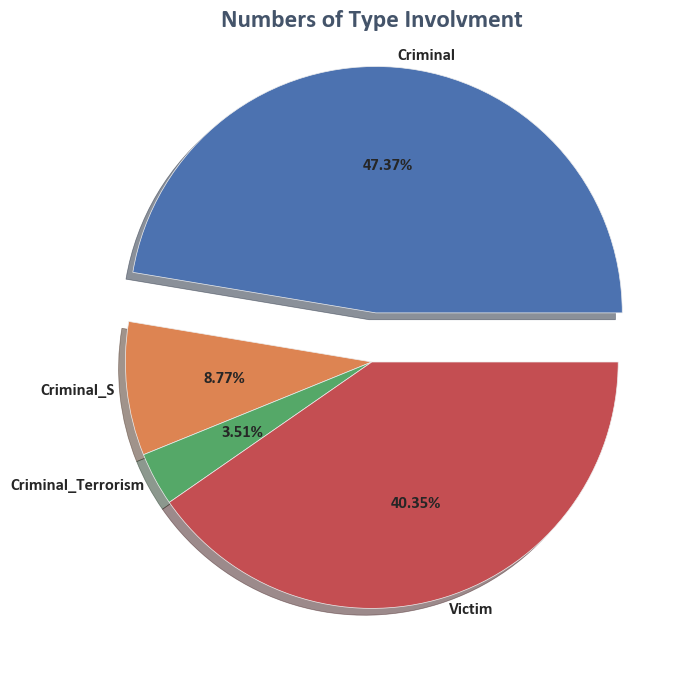

In [178]:
invpic1=inv_rec_off.groupby(["Type_Name_Involvment"])[["Involvment_ID"]].nunique()
# This is for extracting the values from the DataFrame because we need the nunique() aggregation for specific involvments, which has a multi-level index.
values = invpic1.iloc[:, 0]
# Creating the pie chart
special_colors_pie = sb.color_palette("deep")
sb.set_palette(sb.color_palette(special_colors_pie))
plt.figure(figsize=(8, 8))
plt.title('Numbers of Type Involvment', loc="center", fontsize=18, fontweight="bold", color="#44546A", pad=20)
plt.style.use('ggplot')
plt.pie(values, labels=invpic1.index, autopct="%1.2f%%", explode=(0.2, 0, 0, 0),
        shadow=True,
        colors=special_colors_pie,
        labeldistance=1.05,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.show()

**Main assumptions and conclusions**
- Pie Chart Overview: The chart visually breaks down the involvement types in various crimes.
- Observations:
    - Criminals: They constitute the largest share (47.37%).
    - Victims: Following closely, victims account for 40.35%.
    - Suspects and Terrorism: A smaller proportion includes suspects (8.77%) and individuals engaged in terrorism (3.51%).
- These findings provide valuable context for understanding the distribution of involvement types in the sample.

**Numbers of Involvments Categorized By Type Name Involvment for US states**

In [179]:
inv_rec_off.groupby([inv_rec_off["State_Name_Living"],inv_rec_off["Type_Name_Involvment"]])[["Involvment_ID"]].nunique()

Involvment_ID
State_Name_Living Type_Name_Involvment               
Arizona           Criminal                          1
                  Criminal_Terrorism                1
                  Victim                            1
California        Criminal                          4
                  Criminal_S                        2
                  Victim                            3
Colorado          Criminal                          3
                  Victim                            4
Illinois          Criminal                          3
                  Victim                            2
Libya             Criminal_Terrorism                1
Maryland          Criminal                          1
Nevada            Criminal                          2
                  Criminal_S                        1
New_York          Criminal                          7
                  Criminal_S                        1
                  Victim                            3
Ohio              Criminal                          1
                  Criminal_S                        1
                  Victim                            1
Pennsylvania      Criminal                          2
                  Victim                            1
Texas             Criminal                          3
                  Victim                            8

**The number of offenses according to the type of person involved and his country of birth**

In [180]:
inv_rec_off.groupby([inv_rec_off["State_Name_Living"],inv_rec_off["Type_Name_Involvment"]])[["Offence_ID_By_Law"]].count()

Offence_ID_By_Law
State_Name_Living Type_Name_Involvment                   
Arizona           Criminal                              2
                  Criminal_Terrorism                    1
                  Victim                                1
California        Criminal                              5
                  Criminal_S                            2
                  Victim                                3
Colorado          Criminal                              5
                  Victim                                4
Illinois          Criminal                              3
                  Victim                                2
Libya             Criminal_Terrorism                    1
Maryland          Criminal                              2
Nevada            Criminal                              4
                  Criminal_S                            1
New_York          Criminal                             10
                  Criminal_S                            1
                  Victim                                3
Ohio              Criminal                              1
                  Criminal_S                            1
                  Victim                                1
Pennsylvania      Criminal                              4
                  Victim                                1
Texas             Criminal                              5
                  Victim                                8

C:\Users\razha\AppData\Local\Temp\ipykernel_12604\3067202999.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pg12.set_xticklabels(pg12.get_xticklabels(), fontsize=10, fontweight='bold', color='.4', ha='center')
C:\Users\razha\AppData\Local\Temp\ipykernel_12604\3067202999.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pg12.set_yticklabels(pg12.get_yticklabels(), fontsize=10, fontweight='bold', color='.4')


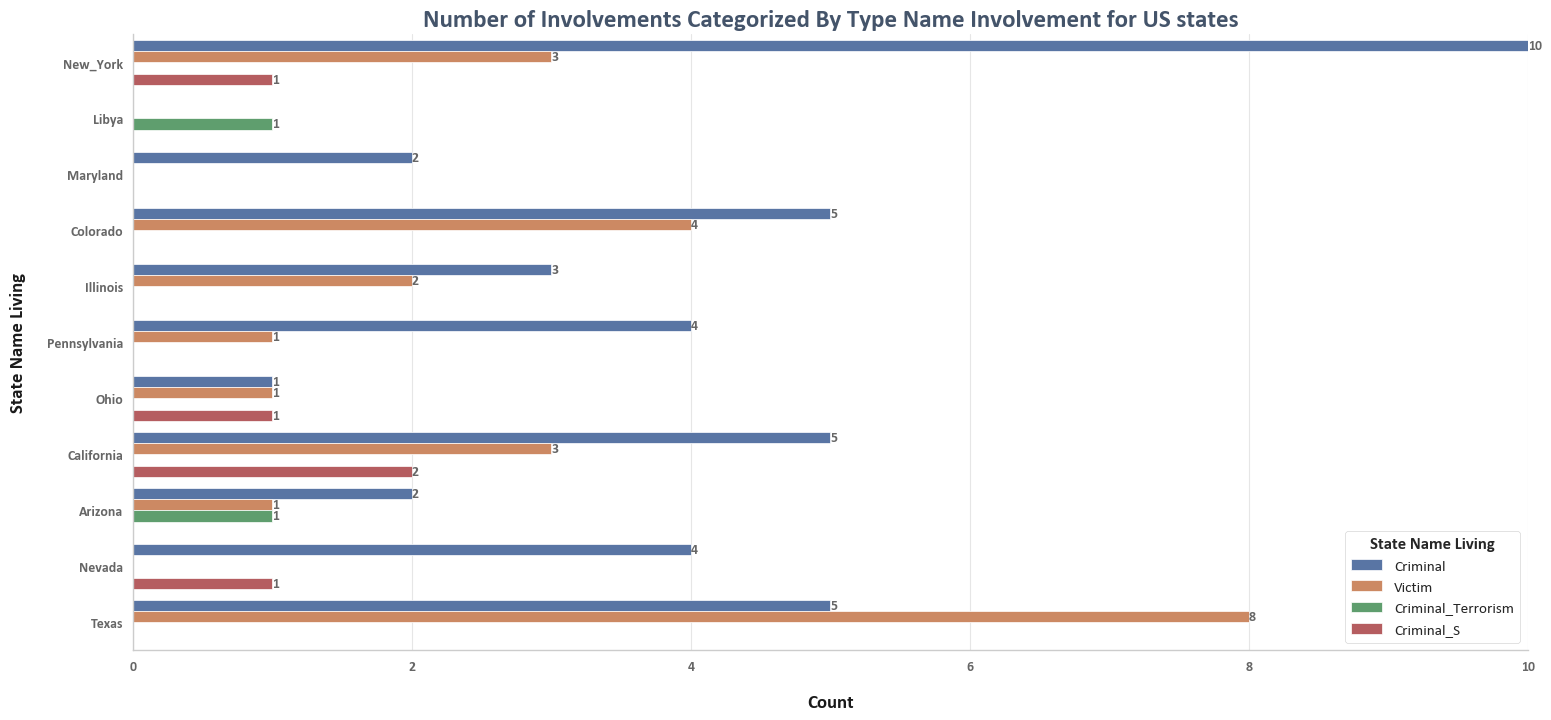

In [181]:
sb.set_style("whitegrid", {"grid.color": ".9"})
special_colors_countplot2 = sb.color_palette("deep")
sb.set_palette(sb.color_palette(special_colors_countplot2))
plt.figure(figsize=(18, 8))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
pg12 = sb.countplot(data=inv_rec_off, y="State_Name_Living", hue="Type_Name_Involvment")
pg12.set_title("Number of Involvements Categorized By Type Name Involvement for US states", fontdict={"size": 18, "weight": "bold"}, color="#44546A")
pg12.set_xlabel("Count", fontdict={"size": 13.5, "weight": "bold"}, labelpad=15, color=".1")
pg12.set_ylabel("State Name Living", fontdict={"size": 13.5, "weight": "bold"}, labelpad=15, color=".1")
pg12.set_xticklabels(pg12.get_xticklabels(), fontsize=10, fontweight='bold', color='.4', ha='center')
pg12.set_yticklabels(pg12.get_yticklabels(), fontsize=10, fontweight='bold', color='.4')
legend_state_station = plt.legend(title="State Name Living", loc="best", prop={"size": 11})
legend_state_station.set_title("State Name Living", prop={"size": 12, "weight": "bold"})
for container in pg12.containers:
    pg12.bar_label(container, fontsize=10, color='.4', fontweight='bold')
sb.despine()
plt.margins(x=0.0002)
plt.show()

**Assumptioms and Main Conclusions**
- Countplot Overview: This chart illustrates the frequency of offenses based on the type of involvement, alongside individual offenses recorded between 1984 and 2018. The data is categorized by the birth state of the involved individuals.
- Individuals born in Texas are associated with the highest number of recorded crimes (a total of 8 offenses).
- Notably, the largest number of offenses involving mixed criminals is found among individuals born in New York (10 offenses), as well as in Colorado, California, and Texas (each with 5 offenses).

**Involvment Criminals and Suspects income per month Categorized by Offence Group (CI)** - Calculated By Offences that reffered to involvments

In [182]:
inv_rec_off.groupby([inv_rec_off['Type_Name_Involvment'], inv_rec_off['Offence_Group_Name']]).agg({'Income_per_month': ['mean','std', 'count']})

Income_per_month                   
                                                       mean          std count
Type_Name_Involvment Offence_Group_Name                                       
Criminal             Computer=Offences         21342.166667  4692.713732     6
                     Instrumental=Offences      8279.285714  4144.151450     7
                     Sexual=Offences            8683.666667  3034.651600     3
                     Violent=Offences           8352.750000  2197.100893    16
                     White_Collar=Offences     18419.750000  3449.467568     8
Criminal_S           Violent=Offences           6500.000000          NaN     1

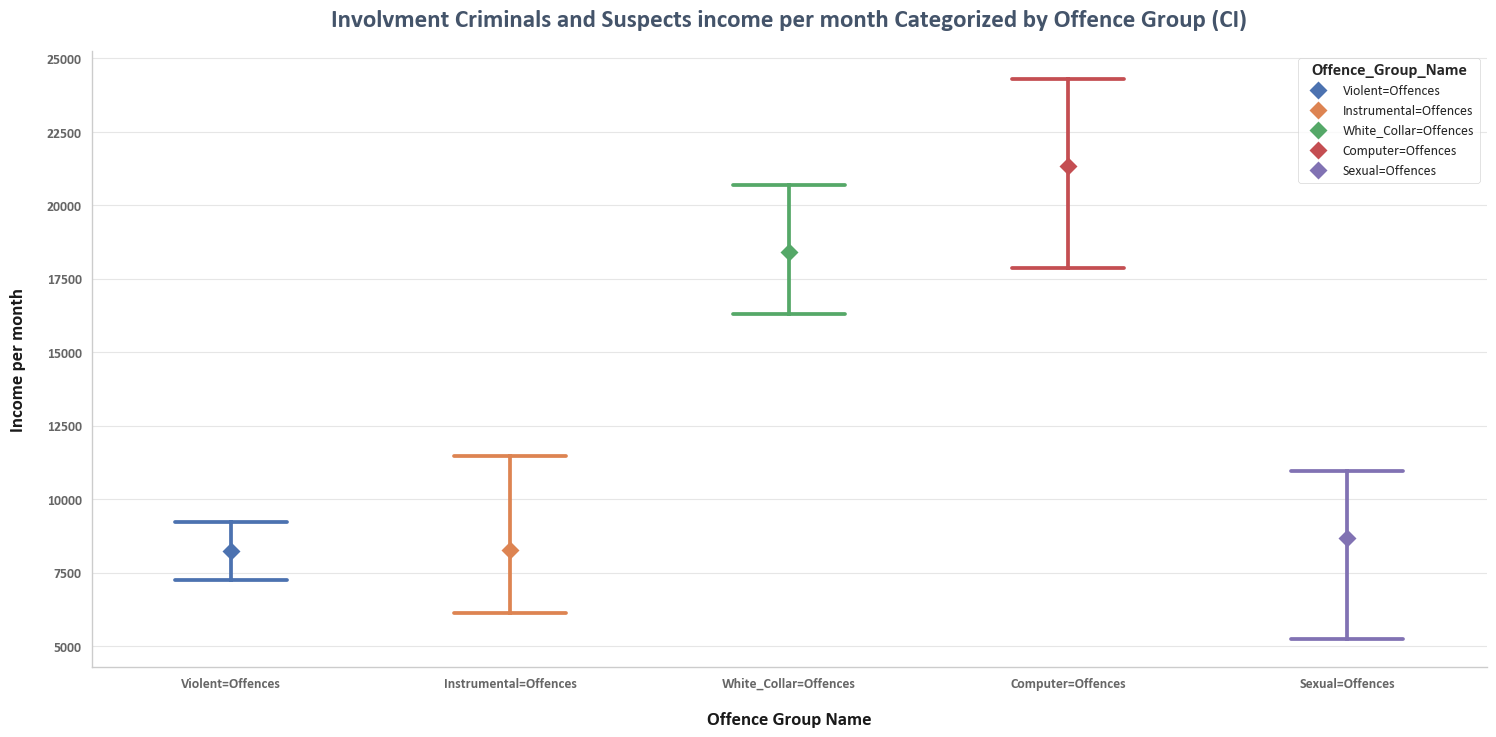

In [183]:
special_colors_point1 = sb.color_palette("deep")
sb.set_palette(sb.color_palette(special_colors_point1))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
plt.figure(figsize=(18, 8))
plt.title('Involvment Criminals and Suspects income per month Categorized by Offence Group (CI)' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Offence Group Name', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Income per month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4' )
plt.yticks(fontsize=10, fontweight='bold', color='.4')
sb.pointplot(data=inv_rec_off,
             x="Offence_Group_Name", y="Income_per_month", capsize=.4, hue="Offence_Group_Name",
    palette='deep', linestyle="none", marker="D",
            )
legend_income_inv_ci = plt.legend(title="Offence_Group_Name", loc="best", prop={"size": 10})
legend_income_inv_ci.set_title("Offence_Group_Name", prop={"size": 12, "weight": "bold"})
sb.despine()
plt.show()

**Assumptioms and Main Conclusions**
- Pointplot Overview: This chart illustrates how confidence intervals provide insight into the certainty of offense groups relative to the average monthly income associated with those involved. The higher our confidence level (e.g., 95%), the narrower the interval.
- Key observations from this small sample:
    - Violent crimes fall within this interval, with a 95% chance of being representative.
    - However, sexual offenses, computer offenses, and instrumental offenses do not exhibit significant representation, as they “fall” by 5% outside the interval.
- In addition, we can explore further by conducting a One-Way ANOVA test. This statistical test allows us to compare means across multiple groups (in this case, different offense categories) to determine if there are significant differences.

**Involvment Criminals and Suspects income per month Categorized by Offence Group (sd)** - Calculated By Offences that reffered to involvments

In [184]:
inv_rec_off.groupby([inv_rec_off['Type_Name_Involvment'], inv_rec_off['Offence_Group_Name']]).agg({'Income_per_month': ['mean','std', 'count']})

Income_per_month                   
                                                       mean          std count
Type_Name_Involvment Offence_Group_Name                                       
Criminal             Computer=Offences         21342.166667  4692.713732     6
                     Instrumental=Offences      8279.285714  4144.151450     7
                     Sexual=Offences            8683.666667  3034.651600     3
                     Violent=Offences           8352.750000  2197.100893    16
                     White_Collar=Offences     18419.750000  3449.467568     8
Criminal_S           Violent=Offences           6500.000000          NaN     1

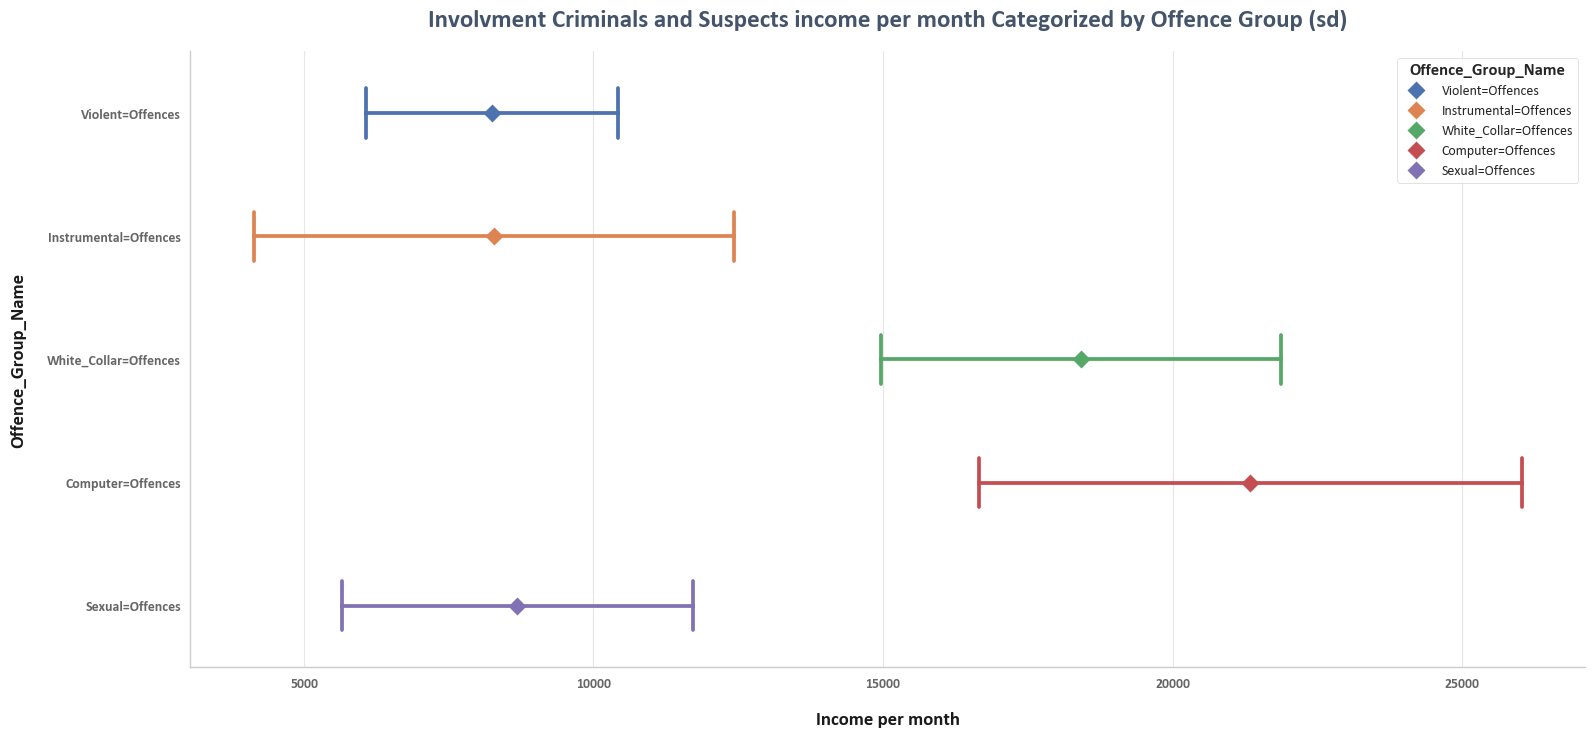

In [185]:
special_colors_point1 = sb.color_palette("deep")
sb.set_palette(sb.color_palette(special_colors_point1))
plt.figure(figsize=(18, 8))
plt.title('Involvment Criminals and Suspects income per month Categorized by Offence Group (sd)' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Income per month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Offence_Group_Name', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
sb.pointplot(data=inv_rec_off,
             x="Income_per_month", y="Offence_Group_Name", capsize=.4, hue="Offence_Group_Name",
    palette='deep', linestyle="none", marker="D",
            errorbar="sd"
            )
legend_income_inv_sd = plt.legend(title="Offence_Group_Name", loc="best", prop={"size": 10})
legend_income_inv_sd.set_title("Offence_Group_Name", prop={"size": 12, "weight": "bold"})
sb.despine()
plt.show()

**Assumptioms and Main Conclusions**
- Pointplot Overview: This diagram illustrates how observing the dispersion of data through standard deviation allows us to explore the variability in average monthly income associated with different offense groups. A wider spread indicates greater variation.
- Key observations from this small sample:
    - Violent crimes align closely with previous findings, as their average wage incomes are similar to those of the overall population.
    - However, computer crimes, instrumental crimes, and white-collar crimes exhibit wider spreads, indicating more variability.
    - These findings reinforce the reliability of our margin of error.

**Income Differences for Offenders and Victims** - Calculated By Offences that reffered to involvments

In [186]:
inv_rec_off.groupby(inv_rec_off['Relate_Involved']).agg({'Income_per_month':['nunique','count', 'mean', 'median', 'std']})

Income_per_month                               \
                             nunique count          mean   median   
Relate_Involved                                                     
Offender                          25    40  12326.525000  10049.5   
Suspect                            6     6  12636.166667  14061.5   
Terror_Orginization                0     0           NaN      NaN   
Victim                            16    16  16653.062500  11611.5   

                                   
                              std  
Relate_Involved                    
Offender              6363.169102  
Suspect               6298.447886  
Terror_Orginization           NaN  
Victim               11401.305507

<Figure size 1800x800 with 0 Axes>

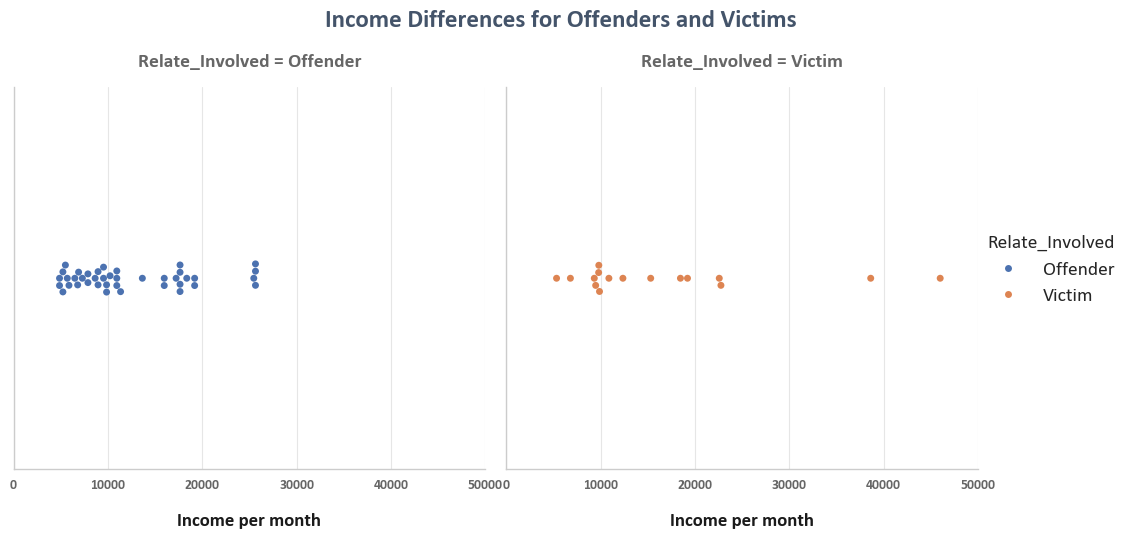

In [187]:
special_colors_sworm1 = sb.color_palette("deep")
sb.set_palette(sb.color_palette(special_colors_sworm1))
plt.figure(figsize=(18, 8))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
filtered_cat_Rel_inv=inv_rec_off[inv_rec_off['Relate_Involved'].isin(['Offender','Victim'])]
cat_plot_income_relate = sb.catplot(data=filtered_cat_Rel_inv, x="Income_per_month",  col="Relate_Involved",
            hue="Relate_Involved", kind="swarm", marker='o')
cat_plot_income_relate.fig.suptitle('Income Differences for Offenders and Victims',
                                    fontsize=18, fontweight="bold", color="#44546A", va='baseline', ha='center', y=1.03)
cat_plot_income_relate.set_xlabels('Income per month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
cat_plot_income_relate.set_xticklabels(fontsize=10, fontweight="bold", color='.4')
cat_plot_income_relate.set_titles(size=14, weight='bold', color='.4', pad=15)
sb.despine()
plt.show()

**Assumptioms and Main Conclusions**
- Catplot (Swarm) Overview: This chart illustrates how the distribution of observations allows us to explore the variation in average monthly income associated with involved criminals compared to involved victims. 
- Key findings from this small sample include:
    1. Criminal Participants:
        - The average income distribution for crimes involving criminal participants is relatively narrow.
        - Within this group, there is minimal variation in income averages.
    2. Victims:
        - In contrast, the group of victims exhibits a wider spread between income averages.
    3. Next Steps:
        - With a larger sample, we can further investigate the difference in average incomes between crimes involving criminals and victims using an independent samples t-test.

**Involvment Criminals and Suspects income per month Categorized by Past Number of crime events - following CI**

In [188]:
inv_rec_off.groupby([inv_rec_off['State_Name_Living'], inv_rec_off['Prisoner_Inmate_ID'], inv_rec_off['Offence_Group_Name'], inv_rec_off['Crime_Name']]).agg({'Income_per_month':['sum','mean','min','max'], 'Past_Num_Events':'sum'})

Income_per_month  \
                                                                                                  sum   
State_Name_Living Prisoner_Inmate_ID Offence_Group_Name    Crime_Name                                   
Arizona           2611415.0          Instrumental=Offences Violation_of_public_order           8962.0   
                                     Violent=Offences      Attack                              8962.0   
California        19191630.0         Violent=Offences      Attack                              7890.0   
                                                           Robbery                             7890.0   
                  22191417.0         Instrumental=Offences Theft                              17235.0   
                  2420210.0          Computer=Offences     Identity_Theft                     25469.0   
                  25201950.0         White_Collar=Offences Fraud                              18365.0   
Colorado          5291640.0          Sexual=Offences       Pedophilia                         10950.0   
                                     Violent=Offences      Homicide                           10950.0   
                                                           Kidnapping                         10950.0   
                  5791635.0          Violent=Offences      Attack                             10234.0   
                  5891635.0          Violent=Offences      Attack                              8654.0   
Illinois          10151420.0         Instrumental=Offences Theft_Vehicle                       6800.0   
                  11151410.0         Instrumental=Offences Arson                               6900.0   
                  12161640.0         Violent=Offences      Attack                             11350.0   
Maryland          7131950.0          White_Collar=Offences Forgery                            19200.0   
                                                           Fraud                              19200.0   
Nevada            2821640.0          Sexual=Offences       Rape                                5236.0   
                                     Violent=Offences      Homicide                            5236.0   
                  3021640.0          Sexual=Offences       Rape                                9865.0   
                                     Violent=Offences      Homicide                            9865.0   
New_York          2111630.0          Violent=Offences      Robbery                             6500.0   
                  3111630.0          Violent=Offences      Robbery                             5500.0   
                  333220.0           Computer=Offences     Blackmail_and_threats              25649.0   
                                                           Identity_Theft                     25649.0   
                                     White_Collar=Offences Fraud                              25649.0   
                  363220.0           Computer=Offences     Blackmail_and_threats              17654.0   
                                     White_Collar=Offences Fraud                              17654.0   
                  3831950.0          White_Collar=Offences Fraud                              13658.0   
                  4111417.0          Instrumental=Offences Theft                               7300.0   
                  5111640.0          Violent=Offences      Homicide                            5700.0   
Ohio              18181635.0         Violent=Offences      Attack                              6500.0   
Pennsylvania      1314210.0          Computer=Offences     Identity_Theft                     17654.0   
                                     White_Collar=Offences Forgery                            17654.0   
                  1517210.0          Computer=Offences     Identity_Theft                     15978.0   
                                     White_Collar=Offences Forgery                            1

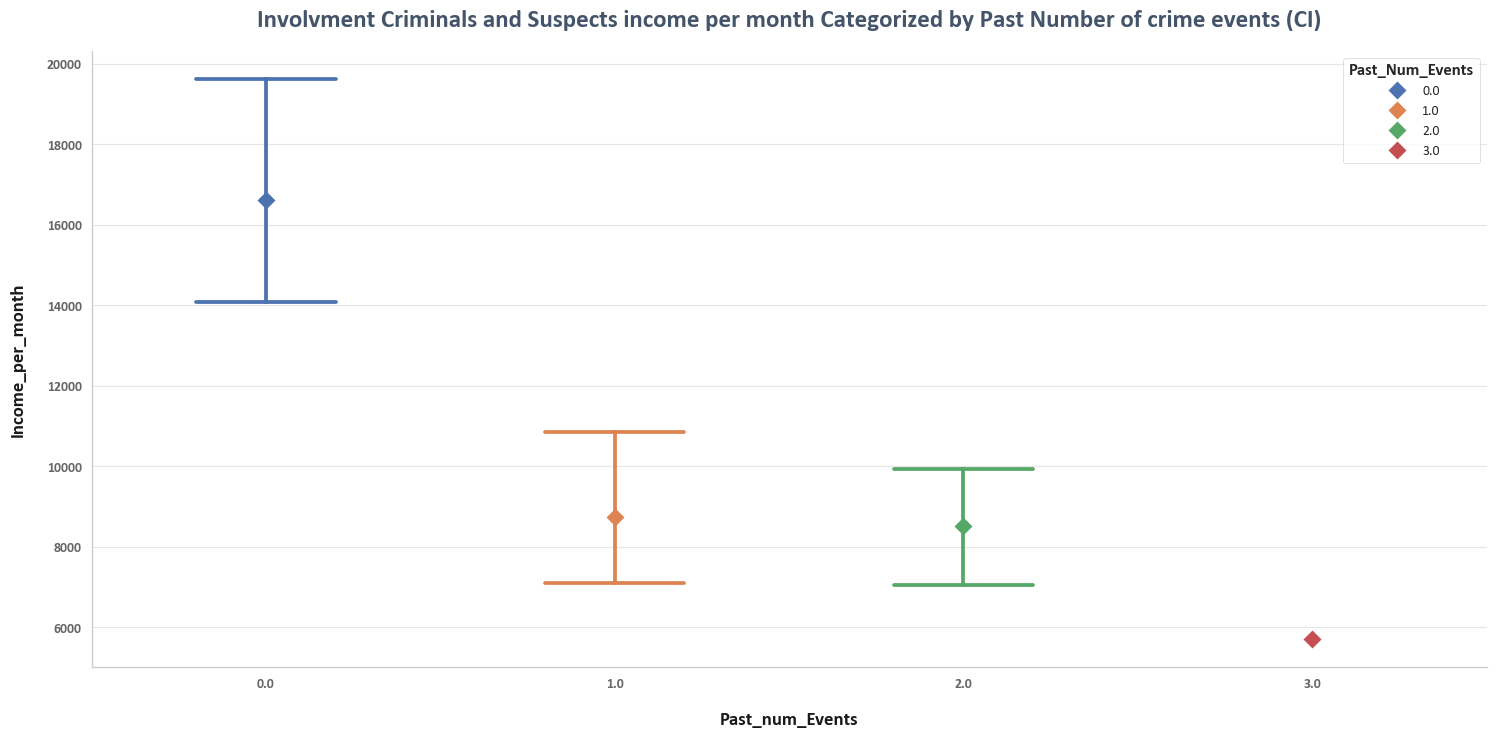

In [189]:
special_colors_point1 = sb.color_palette("deep")
sb.set_palette(sb.color_palette(special_colors_point1))
plt.figure(figsize=(18, 8))
plt.title('Involvment Criminals and Suspects income per month Categorized by Past Number of crime events (CI)' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Past_num_Events', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Income_per_month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
sb.pointplot(data=inv_rec_off,
             x="Past_Num_Events", y="Income_per_month", capsize=.4, hue="Past_Num_Events", legend=True,
    palette='deep', linestyle="none", marker="D",
            errorbar="ci"
            )
legend_income_inv_sd = plt.legend(title="Past_Num_Events", loc="best", prop={"size": 10})
legend_income_inv_sd.set_title("Past_Num_Events", prop={"size": 12, "weight": "bold"})
sb.despine()
plt.show()

**Assumptioms and Main Conclusions**
- Pointplot Overview: The chart presented here sheds light on the relationship between the number of prior offenses committed by criminals or suspects and their average monthly income. Confidence intervals play a crucial role in assessing the certainty of these associations.
- Observations:
    - Violent Crimes: Violent crimes fall within the confidence interval, with a 95% likelihood of being representative.
    - Sample Size Limitation: Due to the small sample size, we cannot confidently discard the margin of error for individuals who have committed three offenses in the past.
    - Two Offenses: Those with two prior offenses have a 95% chance of being represented, compared to those with only one offense, based on their average income.
    - No Prior Offenses: Individuals with no prior offenses do not exhibit significant representation; they fall outside the margin by 5%.
- Next Steps: To explore further, we can conduct a one-way ANOVA test. This statistical test assesses differences in variance across categories of previous offenses committed by criminals and suspects.

**Involvment Criminals and Suspects income per month Categorized by Past Number of crime events**

<Figure size 1800x800 with 0 Axes>

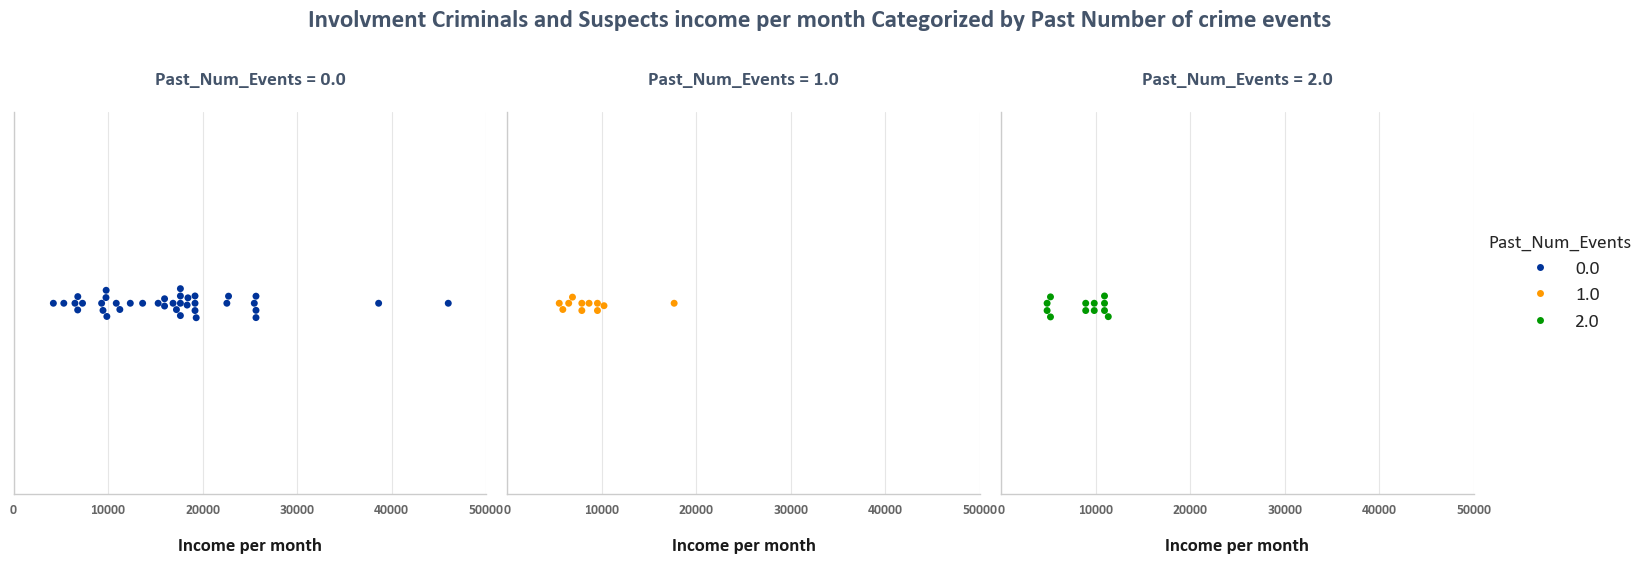

In [190]:
special_colors_sworm2 = ['#003399', '#FF9900', '#009900']
plt.figure(figsize=(18, 8))
filtered_cat_past_inv=inv_rec_off[inv_rec_off['Past_Num_Events'].isin([0.0,1.0,2.0])]
cat_plot_past_inv = sb.catplot(data=filtered_cat_past_inv, x="Income_per_month",  col="Past_Num_Events",
            hue="Past_Num_Events", kind="swarm", marker='o', palette=special_colors_sworm2)
cat_plot_past_inv.fig.suptitle('Involvment Criminals and Suspects income per month Categorized by Past Number of crime events',
                                    fontsize=18, fontweight="bold", color="#44546A", va='baseline', ha='center', y=1.08)
cat_plot_past_inv.set_xlabels('Income per month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
cat_plot_past_inv.set_xticklabels(fontsize=10, fontweight='bold', color='.4')
cat_plot_past_inv.set_titles(size=14, weight='bold', color='#44546A', pad=20)
plt.show()

**Assumptioms and Main Conclusions**
- Catplot Overview (Swarm): This visualization explores the relationship between the number of prior offenses committed by criminals and involved suspects and their average monthly income.
- Findings:
    - Two Offenses Group:
        - The average income for crimes involving criminal participants in this group ranges from 4879 to 11,350.
        - Notably, there is minimal variation in income averages within this category.
    - One Offense Group:
        - Individuals with a single prior offense exhibit the narrowest income dispersion (ranging from 5500 to 10,234).
        - Conversely, those with no prior offenses show a wider spread in income averages (ranging from 6500 to 25,649).
- These insights provide valuable context for understanding the relationship between criminal history and income. Further analysis can be conducted with a larger sample size and statistical tests.
- Next Steps: To explore further, we can conduct a one-way ANOVA test. This statistical test assesses differences in variance across categories of previous offenses committed by criminals and suspects.

**Unique Prisoners Count Categorized by Police Station**

In [191]:
inv_rec_off.groupby([inv_rec_off['Police_Station']]).agg({'Prisoner_Inmate_ID':'nunique'})

Prisoner_Inmate_ID
Police_Station                      
Station_1#PPD                      1
Station_11#PPD                     2
Station_13#LVMPD                   2
Station_13#SFPD                    2
Station_14#LAPD                    2
Station_21#CPD                     1
Station_22#NYPD                    7
Station_555#SAPD                   3
Station_879#BPD                    1
Station_95#CPD                     3

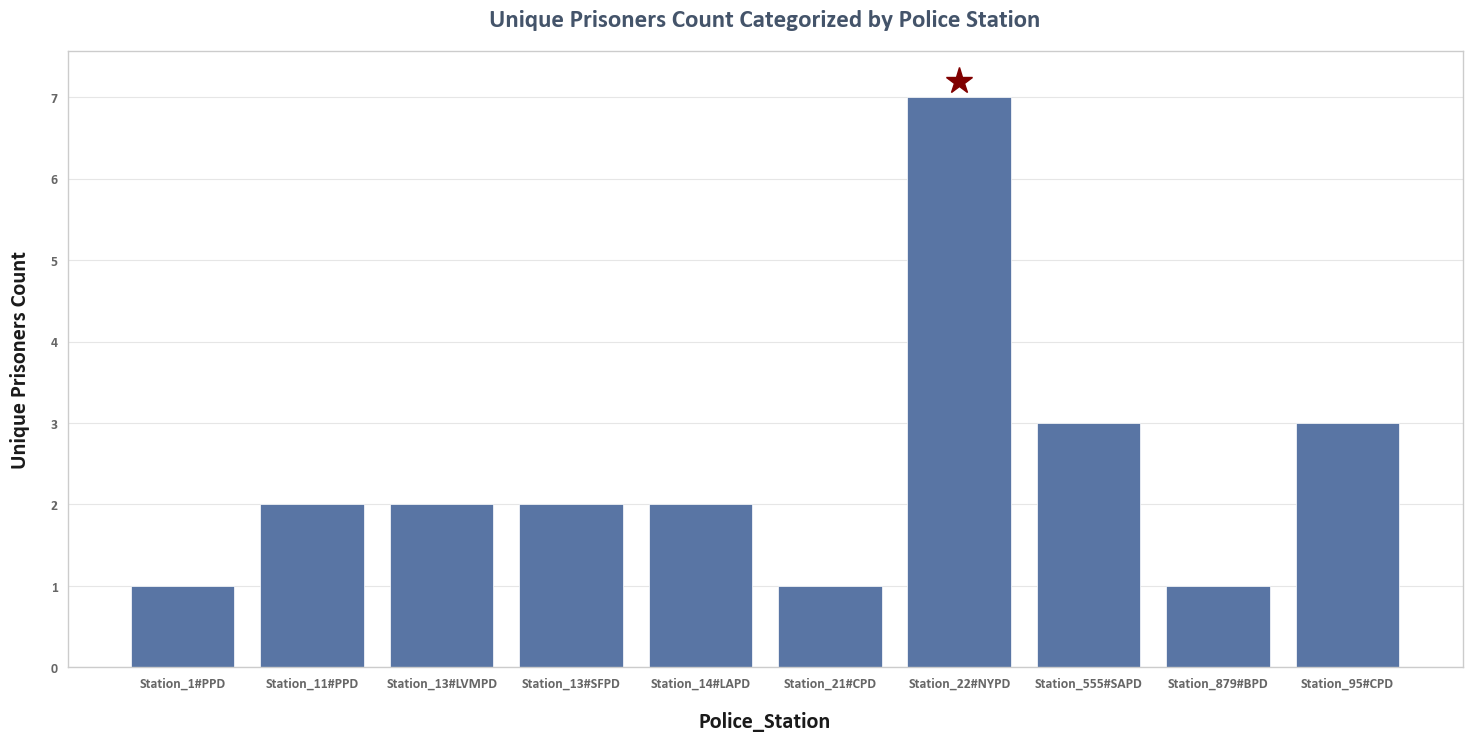

In [192]:
special_colors_bar4 = sb.color_palette("deep")
sb.set_palette(sb.color_palette(special_colors_bar4))
plt.figure(figsize=(18, 8))
grouped_station_prisoner=inv_rec_off.groupby([inv_rec_off['Police_Station']]).agg({'Prisoner_Inmate_ID':'nunique'}).reset_index()
grouped_station_prisoner1=sb.barplot(data=grouped_station_prisoner, x='Police_Station', y='Prisoner_Inmate_ID')
plt.title('Unique Prisoners Count Categorized by Police Station' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Police_Station', fontsize=16, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Unique Prisoners Count', fontsize=16, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
grouped_station_prisoner1.plot('Station_22#NYPD', 7.2, "*", markersize=20, color="#800000")
plt.show()

**Assumptioms and Main Conclusions**
- Barplot Overview: The chart displays the count of prisoners whose offenses were recorded and processed at various police stations within the sample from 1984 to 2018.
- Observations:
    - NYPD Station: The NYPD station recorded the highest number of prisoners in the sample (seven prisoners).
    - SAPD and CPD Stations: SAPD and CPD stations follow as the second largest (three prisoners each), handling prisoners under their jurisdiction.
- These insights provide valuable context for understanding the distribution of offenses across different police stations.

-------------------------------------------------------

### Quality of Life in Prison - Prisoners' characteristics information during imprisonment and correction facilities components
**Prisoners and Facilities (inv_pris_det):**
- This DataFrame contains prisoner details during their imprisonment, including components related to the quality of life within correctional facilities.

- Information on prisoners/suspects and their unique incarceration features, linked to specific correctional facilities.

### Data Frames Details and Data cleansing 
**ETL Processes (Extract, Transform, Load):**
- I refine and clean the raw data and add raw data, change data type for relevant columns, create null treatment for problematic values and ensuring accuracy and consistency.

#### Create a data frame variable named ‘inv_pris_det’ by joining information of Criminal and Suspects involvments with prisoners and correction facilities details data from the SQL view table.
##### You have two options for creating data frame variable - choose the one that suits your needs:

In [193]:
#inv_pris_det = pd.read_sql("select * from Inv_Pris_Det",conn)

In [194]:
#inv_pris_det= pd.read_excel(r"C:\Users\razha\Documents\Python\Project\.ipynb_checkpoints\df3_inv_pris_det.xlsx")

#### Information about Data Frame of criminals and suspects data and prisoners and correction facilities data

In [195]:
inv_pris_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Prisoner_Inmate_ID             27 non-null     int64         
 1   State_ID_Living                27 non-null     int64         
 2   State_Name_Living              27 non-null     object        
 3   Employment_Type_ID             27 non-null     int64         
 4   Employment_Type_Name           27 non-null     object        
 5   Entrance_Date                  27 non-null     datetime64[ns]
 6   Release_Date                   27 non-null     datetime64[ns]
 7   Birth_Date_Prisoner            27 non-null     datetime64[ns]
 8   Type_Prisoner_Inmate_ID        27 non-null     int64         
 9   Type_Prisoner_Inmate_Name      27 non-null     object        
 10  Correction_Facility_ID         27 non-null     int64         
 11  Correction_Facility_N

#### Presenting the missing columns info

In [196]:
inv_pris_det[["Income_Correction_Per_Month", "Expenses_Correction_Per_Month"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Income_Correction_Per_Month    27 non-null     int64
 1   Expenses_Correction_Per_Month  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
### Participations (Involvments - criminals and suspectd) with prisoners and correction failities data
 **CodeBook Information about the data frame:**
- **Prisoner_Inmate_ID** - This data contains unique identification numbers for each prisoner, linked to their associated offense(s).

- **State_ID_Living** - ID of the state of residence of the person involved

- **State_Name_Living** - This is the name of residence of the person involved

- **Employment_Type_ID** - ID of the type of employment of the person involved

- **Employment_Type_Name** - ID of the type of employment of the person involved

- **Entrance_Date** - This is the date the prisoner entered the correctional facility

- **Release_Date** - This is the release date of an inmate from a correctional facility

- **Birth_Date_Prisoner** - Date of birth of the prisoner

- **Type_Prisoner_Inmate_ID** - ID of the type of prisoner: 1 - prisoner; 2 - Arrest/Suspect

- **Type_Prisoner_Inmate_Name** - Name of the type of prisone: Prisoner Vs. Un_Arrest

- **Correction_Facility_ID** - Unique ID of the correctional facility

- **Correction_Facility_Name** - Unique Name of the correctional facility

- **Security_Level_Position** - Description of the security level of the prison (in this sample it is divided into medium and maximum)

- **Security_Wing_Level_ID** - Security level coding in the wing of the prison according to the dangerousness of its occupants 

- **Security_Wing_Level** - Security level naming in the wing of the prison according to the dangerousness of its occupants (A-E)

- **Emp_Name_Prison** - There is a prisoner's employment in the prison

- **Cell_Size** - The size of the confinement cell in square meters (note - the minimum cell size required by law is 4.5 square meters)

- **Income_per_month** - The monthly salary of the person involved (on average)

- **Income_Prisoner_Per_Month** - The monthly salary of the prisoner during imprisonment (on average)

- **Expenses_Prisoner_Per_Month** - The monthly expanses of the prisoner during imprisonment (on average)

- **Income_Correction_Per_Month** - The monthly income of the correction facility (on average)

- **Expenses_Correction_Per_Month** - The monthly expenses of the correction facility (on average)

- **Min_Penalty_By_Law** - Minimum punishment in months based on the definition of the type of offense

- **Max_Penalty_By_Law** - Maximum punishment in months based on the definition of the type of offense

- **Adding calculate columns:**

    - **Time_Spent_Prison_MM** - The length of a prisoner's stay in prison in months
    
    - **Entrance_Age** - The age of the prisoner when he entered the correctional facility

    - **Release_Age** - The age of the prisoner at the time of his release from the correctional facility

    - **Entrance_Year** - Year of entry into prison

    - **Release_Year** - A year out of prison

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#### Top 10 rows

In [197]:
inv_pris_det.head(10)

Prisoner_Inmate_ID  State_ID_Living State_Name_Living  Employment_Type_ID  \
0              333220               10          New_York                  75   
1              363220               10          New_York                  90   
2             1314210               45      Pennsylvania                  65   
3             1517210               45      Pennsylvania                  65   
4             2111630               10          New_York                  15   
5             2420210               13        California                  75   
6             2611415               12           Arizona                  15   
7             2821640               14            Nevada                  68   
8             3021640               14            Nevada                  49   
9             3111630               10          New_York                  52   

  Employment_Type_Name Entrance_Date Release_Date Birth_Date_Prisoner  \
0                DevOP    2005-11-12   2025-10-10          1985-01-16   
1              Finance    2006-05-17   2026-08-16          1986-05-15   
2              IT_Team    2010-05-15   2020-06-17          1998-04-19   
3              IT_Team    2010-07-13   2015-08-12          1997-03-11   
4           Shopkeeper    1994-05-03   2004-11-20          1974-08-12   
5                DevOP    2019-06-30   2026-02-26          1996-08-07   
6           Shopkeeper    1995-11-22   1998-09-09          1972-06-12   
7               Farmer    2001-12-19   2031-10-03          1971-07-11   
8        Fitness_Guide    2001-03-14   2031-02-05          1976-02-02   
9         Car_Mechanic    2003-03-12   2007-10-11          1980-05-26   

   Type_Prisoner_Inmate_ID Type_Prisoner_Inmate_Name  ...  \
0                        1                  Prisoner  ...   
1                        1                  Prisoner  ...   
2                        1                  Prisoner  ...   
3                        1                  Prisoner  ...   
4                        1                  Prisoner  ...   
5                        1                  Prisoner  ...   
6                        2                 Un_Arrest  ...   
7                        1                  Prisoner  ...   
8                        1                  Prisoner  ...   
9                        1                  Prisoner  ...   

   Security_Wing_Level     Emp_Name_Prison Cell_Size  Income_per_month  \
0                    C             Teacher       4.5             25649   
1                    C             Teacher       4.5             17654   
2                    C  Carpentry_workshop       4.5             17654   
3                    C             Kitchen       4.5             15978   
4                    B  Carpentry_workshop       4.5              6500   
5                    C             Laundry       6.0             25469   
6                    D                 NaN       5.2              8962   
7                    E             Laundry       4.9              5236   
8                    E  Carpentry_workshop       4.9              9865   
9                    B             Laundry       4.5              5500   

  Income_Prisoner_Per_Month Expenses_Prisoner_Per_Month  \
0                    1845.0                       756.0   
1                    1324.0                       536.0   
2                    1015.0                       452.0   
3                     347.0                       230.0   
4                    1230.0                       450.0   
5                     785.0                       356.0   
6                       NaN                         NaN   
7                     695.0                       423.0   
8                    1200.0                       450.0   
9                     732.0                       260.0   

   Income_Correction_Per_Month  Expenses_Correction_Per_Month  \
0                       236000                         164322   
1                       236000                     

#### Presenting the missing columns as type data frame

In [198]:
inv_pris_det[["Income_Correction_Per_Month", "Expenses_Correction_Per_Month"]].head(10)

Income_Correction_Per_Month  Expenses_Correction_Per_Month
0                       236000                         164322
1                       236000                         164322
2                       364255                         123689
3                       364255                         123689
4                       236000                         164322
5                       597230                         423987
6                       368153                         198563
7                       652301                         489621
8                       652301                         489621
9                       236000                         164322

#### Convert Int/Float/Datetime
**Change the data Type for dates from object to datetime and int / float to objeect (string) and int to flaot**

In [199]:
inv_pris_det["Prisoner_Inmate_ID"]= inv_pris_det["Prisoner_Inmate_ID"].astype(str)
inv_pris_det["State_ID_Living"]= inv_pris_det["State_ID_Living"].astype(str)
inv_pris_det["Employment_Type_ID"]= inv_pris_det["Employment_Type_ID"].astype(str)
inv_pris_det["Entrance_Date"]=pd.to_datetime(inv_pris_det["Entrance_Date"],format="%d-%m-%Y")
inv_pris_det["Release_Date"]=pd.to_datetime(inv_pris_det["Release_Date"],format="%d-%m-%Y")
inv_pris_det["Birth_Date_Prisoner"]=pd.to_datetime(inv_pris_det["Birth_Date_Prisoner"],format="%d-%m-%Y")
inv_pris_det["Type_Prisoner_Inmate_ID"]= inv_pris_det["Type_Prisoner_Inmate_ID"].astype(str)
inv_pris_det["Correction_Facility_ID"]= inv_pris_det["Correction_Facility_ID"].astype(str)
inv_pris_det["Security_Wing_Level_ID"]= inv_pris_det["Security_Wing_Level_ID"].astype(str)
inv_pris_det["Min_Penalty_By_Law"]= inv_pris_det["Min_Penalty_By_Law"].astype(float)

**Information validation for changing the relevant data type**

In [200]:
inv_pris_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Prisoner_Inmate_ID             27 non-null     object        
 1   State_ID_Living                27 non-null     object        
 2   State_Name_Living              27 non-null     object        
 3   Employment_Type_ID             27 non-null     object        
 4   Employment_Type_Name           27 non-null     object        
 5   Entrance_Date                  27 non-null     datetime64[ns]
 6   Release_Date                   27 non-null     datetime64[ns]
 7   Birth_Date_Prisoner            27 non-null     datetime64[ns]
 8   Type_Prisoner_Inmate_ID        27 non-null     object        
 9   Type_Prisoner_Inmate_Name      27 non-null     object        
 10  Correction_Facility_ID         27 non-null     object        
 11  Correction_Facility_N

In [201]:
inv_pris_det[["Income_Correction_Per_Month", "Expenses_Correction_Per_Month"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Income_Correction_Per_Month    27 non-null     int64
 1   Expenses_Correction_Per_Month  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [202]:
inv_pris_det.head(10)

Prisoner_Inmate_ID State_ID_Living State_Name_Living Employment_Type_ID  \
0             333220              10          New_York                 75   
1             363220              10          New_York                 90   
2            1314210              45      Pennsylvania                 65   
3            1517210              45      Pennsylvania                 65   
4            2111630              10          New_York                 15   
5            2420210              13        California                 75   
6            2611415              12           Arizona                 15   
7            2821640              14            Nevada                 68   
8            3021640              14            Nevada                 49   
9            3111630              10          New_York                 52   

  Employment_Type_Name Entrance_Date Release_Date Birth_Date_Prisoner  \
0                DevOP    2005-11-12   2025-10-10          1985-01-16   
1              Finance    2006-05-17   2026-08-16          1986-05-15   
2              IT_Team    2010-05-15   2020-06-17          1998-04-19   
3              IT_Team    2010-07-13   2015-08-12          1997-03-11   
4           Shopkeeper    1994-05-03   2004-11-20          1974-08-12   
5                DevOP    2019-06-30   2026-02-26          1996-08-07   
6           Shopkeeper    1995-11-22   1998-09-09          1972-06-12   
7               Farmer    2001-12-19   2031-10-03          1971-07-11   
8        Fitness_Guide    2001-03-14   2031-02-05          1976-02-02   
9         Car_Mechanic    2003-03-12   2007-10-11          1980-05-26   

  Type_Prisoner_Inmate_ID Type_Prisoner_Inmate_Name  ... Security_Wing_Level  \
0                       1                  Prisoner  ...                   C   
1                       1                  Prisoner  ...                   C   
2                       1                  Prisoner  ...                   C   
3                       1                  Prisoner  ...                   C   
4                       1                  Prisoner  ...                   B   
5                       1                  Prisoner  ...                   C   
6                       2                 Un_Arrest  ...                   D   
7                       1                  Prisoner  ...                   E   
8                       1                  Prisoner  ...                   E   
9                       1                  Prisoner  ...                   B   

      Emp_Name_Prison Cell_Size Income_per_month Income_Prisoner_Per_Month  \
0             Teacher       4.5            25649                    1845.0   
1             Teacher       4.5            17654                    1324.0   
2  Carpentry_workshop       4.5            17654                    1015.0   
3             Kitchen       4.5            15978                     347.0   
4  Carpentry_workshop       4.5             6500                    1230.0   
5             Laundry       6.0            25469                     785.0   
6                 NaN       5.2             8962                       NaN   
7             Laundry       4.9             5236                     695.0   
8  Carpentry_workshop       4.9             9865                    1200.0   
9             Laundry       4.5             5500                     732.0   

  Expenses_Prisoner_Per_Month  Income_Correction_Per_Month  \
0                       756.0                       236000   
1                       536.0                       236000   
2                       452.0                       364255   
3                       230.0                       364255   
4                       450.0                       236000   
5                       356.0                       597230   
6                         NaN                       368153   
7                       423.0                       652301   
8                       450.0                       

#### Null Treatment
**Change the null value for the variable Income_Prisoner_Per_Month and Exenses_Prisoner_Per_Month to the value 0.** 
- Due to different calculations for income and expenses during imprisonment, the value 0 represents that the prisoner/detainee (Un_Arrest) has no income or expenses.

In [203]:
inv_pris_det["Income_Prisoner_Per_Month"] = inv_pris_det["Income_Prisoner_Per_Month"].fillna(0)
inv_pris_det["Expenses_Prisoner_Per_Month"]= inv_pris_det["Expenses_Prisoner_Per_Month"].fillna(0)

**Information validation for Null Treatment**

In [204]:
inv_pris_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Prisoner_Inmate_ID             27 non-null     object        
 1   State_ID_Living                27 non-null     object        
 2   State_Name_Living              27 non-null     object        
 3   Employment_Type_ID             27 non-null     object        
 4   Employment_Type_Name           27 non-null     object        
 5   Entrance_Date                  27 non-null     datetime64[ns]
 6   Release_Date                   27 non-null     datetime64[ns]
 7   Birth_Date_Prisoner            27 non-null     datetime64[ns]
 8   Type_Prisoner_Inmate_ID        27 non-null     object        
 9   Type_Prisoner_Inmate_Name      27 non-null     object        
 10  Correction_Facility_ID         27 non-null     object        
 11  Correction_Facility_N

In [205]:
inv_pris_det.head(10)

Prisoner_Inmate_ID State_ID_Living State_Name_Living Employment_Type_ID  \
0             333220              10          New_York                 75   
1             363220              10          New_York                 90   
2            1314210              45      Pennsylvania                 65   
3            1517210              45      Pennsylvania                 65   
4            2111630              10          New_York                 15   
5            2420210              13        California                 75   
6            2611415              12           Arizona                 15   
7            2821640              14            Nevada                 68   
8            3021640              14            Nevada                 49   
9            3111630              10          New_York                 52   

  Employment_Type_Name Entrance_Date Release_Date Birth_Date_Prisoner  \
0                DevOP    2005-11-12   2025-10-10          1985-01-16   
1              Finance    2006-05-17   2026-08-16          1986-05-15   
2              IT_Team    2010-05-15   2020-06-17          1998-04-19   
3              IT_Team    2010-07-13   2015-08-12          1997-03-11   
4           Shopkeeper    1994-05-03   2004-11-20          1974-08-12   
5                DevOP    2019-06-30   2026-02-26          1996-08-07   
6           Shopkeeper    1995-11-22   1998-09-09          1972-06-12   
7               Farmer    2001-12-19   2031-10-03          1971-07-11   
8        Fitness_Guide    2001-03-14   2031-02-05          1976-02-02   
9         Car_Mechanic    2003-03-12   2007-10-11          1980-05-26   

  Type_Prisoner_Inmate_ID Type_Prisoner_Inmate_Name  ... Security_Wing_Level  \
0                       1                  Prisoner  ...                   C   
1                       1                  Prisoner  ...                   C   
2                       1                  Prisoner  ...                   C   
3                       1                  Prisoner  ...                   C   
4                       1                  Prisoner  ...                   B   
5                       1                  Prisoner  ...                   C   
6                       2                 Un_Arrest  ...                   D   
7                       1                  Prisoner  ...                   E   
8                       1                  Prisoner  ...                   E   
9                       1                  Prisoner  ...                   B   

      Emp_Name_Prison Cell_Size Income_per_month Income_Prisoner_Per_Month  \
0             Teacher       4.5            25649                    1845.0   
1             Teacher       4.5            17654                    1324.0   
2  Carpentry_workshop       4.5            17654                    1015.0   
3             Kitchen       4.5            15978                     347.0   
4  Carpentry_workshop       4.5             6500                    1230.0   
5             Laundry       6.0            25469                     785.0   
6                 NaN       5.2             8962                       0.0   
7             Laundry       4.9             5236                     695.0   
8  Carpentry_workshop       4.9             9865                    1200.0   
9             Laundry       4.5             5500                     732.0   

  Expenses_Prisoner_Per_Month  Income_Correction_Per_Month  \
0                       756.0                       236000   
1                       536.0                       236000   
2                       452.0                       364255   
3                       230.0                       364255   
4                       450.0                       236000   
5                       356.0                       597230   
6                         0.0                       368153   
7                       423.0                       652301   
8                       450.0                       

#### Adding new columns for analyzing Time Spent in Prison and Age while Entrance and Release from prison

**Creating "Time_Spent_Prison_MM"**

In [206]:
inv_pris_det["Time_Spent_Prison_MM"] = (inv_pris_det["Release_Date"] - inv_pris_det["Entrance_Date"]).dt.days /30
inv_pris_det["Time_Spent_Prison_MM"] = inv_pris_det["Time_Spent_Prison_MM"].round(1)

**Information validation for adding columns**

In [207]:
inv_pris_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Prisoner_Inmate_ID             27 non-null     object        
 1   State_ID_Living                27 non-null     object        
 2   State_Name_Living              27 non-null     object        
 3   Employment_Type_ID             27 non-null     object        
 4   Employment_Type_Name           27 non-null     object        
 5   Entrance_Date                  27 non-null     datetime64[ns]
 6   Release_Date                   27 non-null     datetime64[ns]
 7   Birth_Date_Prisoner            27 non-null     datetime64[ns]
 8   Type_Prisoner_Inmate_ID        27 non-null     object        
 9   Type_Prisoner_Inmate_Name      27 non-null     object        
 10  Correction_Facility_ID         27 non-null     object        
 11  Correction_Facility_N

In [208]:
np.round(inv_pris_det[["Entrance_Date", "Release_Date", "Time_Spent_Prison_MM"]],1).head(5)

Entrance_Date Release_Date  Time_Spent_Prison_MM
0    2005-11-12   2025-10-10                 242.4
1    2006-05-17   2026-08-16                 246.5
2    2010-05-15   2020-06-17                 122.9
3    2010-07-13   2015-08-12                  61.9
4    1994-05-03   2004-11-20                 128.5

**Creating "Entrance_Age"**

In [209]:
inv_pris_det["Entrance_Age"] = ((inv_pris_det["Entrance_Date"] - inv_pris_det["Birth_Date_Prisoner"]).dt.days /365).round(0)

**Information validation for adding columns**

In [210]:
inv_pris_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Prisoner_Inmate_ID             27 non-null     object        
 1   State_ID_Living                27 non-null     object        
 2   State_Name_Living              27 non-null     object        
 3   Employment_Type_ID             27 non-null     object        
 4   Employment_Type_Name           27 non-null     object        
 5   Entrance_Date                  27 non-null     datetime64[ns]
 6   Release_Date                   27 non-null     datetime64[ns]
 7   Birth_Date_Prisoner            27 non-null     datetime64[ns]
 8   Type_Prisoner_Inmate_ID        27 non-null     object        
 9   Type_Prisoner_Inmate_Name      27 non-null     object        
 10  Correction_Facility_ID         27 non-null     object        
 11  Correction_Facility_N

In [211]:
inv_pris_det[["Entrance_Date", "Release_Date", "Time_Spent_Prison_MM", "Birth_Date_Prisoner", "Entrance_Age"]].head(5)

Entrance_Date Release_Date  Time_Spent_Prison_MM Birth_Date_Prisoner  \
0    2005-11-12   2025-10-10                 242.4          1985-01-16   
1    2006-05-17   2026-08-16                 246.5          1986-05-15   
2    2010-05-15   2020-06-17                 122.9          1998-04-19   
3    2010-07-13   2015-08-12                  61.9          1997-03-11   
4    1994-05-03   2004-11-20                 128.5          1974-08-12   

   Entrance_Age  
0          21.0  
1          20.0  
2          12.0  
3          13.0  
4          20.0

**Creating "Release_Age"**

In [212]:
inv_pris_det["Release_Age"] = ((inv_pris_det["Release_Date"] - inv_pris_det["Birth_Date_Prisoner"]).dt.days /365).round(0)

**Information validation for adding columns**

In [213]:
inv_pris_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Prisoner_Inmate_ID             27 non-null     object        
 1   State_ID_Living                27 non-null     object        
 2   State_Name_Living              27 non-null     object        
 3   Employment_Type_ID             27 non-null     object        
 4   Employment_Type_Name           27 non-null     object        
 5   Entrance_Date                  27 non-null     datetime64[ns]
 6   Release_Date                   27 non-null     datetime64[ns]
 7   Birth_Date_Prisoner            27 non-null     datetime64[ns]
 8   Type_Prisoner_Inmate_ID        27 non-null     object        
 9   Type_Prisoner_Inmate_Name      27 non-null     object        
 10  Correction_Facility_ID         27 non-null     object        
 11  Correction_Facility_N

In [214]:
inv_pris_det[["Entrance_Date", "Release_Date", "Time_Spent_Prison_MM", "Birth_Date_Prisoner", "Entrance_Age", "Release_Age"]].head(5)

Entrance_Date Release_Date  Time_Spent_Prison_MM Birth_Date_Prisoner  \
0    2005-11-12   2025-10-10                 242.4          1985-01-16   
1    2006-05-17   2026-08-16                 246.5          1986-05-15   
2    2010-05-15   2020-06-17                 122.9          1998-04-19   
3    2010-07-13   2015-08-12                  61.9          1997-03-11   
4    1994-05-03   2004-11-20                 128.5          1974-08-12   

   Entrance_Age  Release_Age  
0          21.0         41.0  
1          20.0         40.0  
2          12.0         22.0  
3          13.0         18.0  
4          20.0         30.0

### Descriptive Statistcs
**Aggregating Data for Reports:**
   - I summarize and aggregate relevant information.
   - Reports provide insights into crime patterns, demographics, and facility characteristics.

**Describe all Descriptive Statistcs in General - ALL**

In [215]:
inv_pris_det.describe(include="all")

Prisoner_Inmate_ID State_ID_Living State_Name_Living  \
count                  27              27                27   
unique                 27              10                10   
top                333220              10          New_York   
freq                    1               7                 7   
mean                  NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   
std                   NaN             NaN               NaN   

       Employment_Type_ID Employment_Type_Name        Entrance_Date  \
count                  27                   27                   27   
unique                 11                   11                  NaN   
top                    52         Car_Mechanic                  NaN   
freq                    5                    5                  NaN   
mean                  NaN                  NaN  2006-09-20 08:53:20   
min                   NaN                  NaN  1985-02-12 00:00:00   
25%                   NaN                  NaN  2001-07-06 00:00:00   
50%                   NaN                  NaN  2005-11-12 00:00:00   
75%                   NaN                  NaN  2017-05-27 12:00:00   
max                   NaN                  NaN  2020-03-12 00:00:00   
std                   NaN                  NaN                  NaN   

               Release_Date  Birth_Date_Prisoner Type_Prisoner_Inmate_ID  \
count                    27                   27                      27   
unique                  NaN                  NaN                       2   
top                     NaN                  NaN                       1   
freq                    NaN                  NaN                      23   
mean    2018-05-08 12:26:40  1985-05-21 15:06:40                     NaN   
min     1995-08-13 00:00:00  1962-05-13 00:00:00                     NaN   
25%     2009-05-10 00:00:00  1978-03-30 12:00:00                     NaN   
50%     2021-07-03 00:00:00  1986-05-15 00:00:00                     NaN   
75%     2025-12-18 12:00:00  1996-03-04 00:00:00                     NaN   
max     2032-11-12 00:00:00  1998-11-08 00:00:00                     NaN   
std                     NaN                  NaN                     NaN   

       Type_Prisoner_Inmate_Name  ... Income_per_month  \
count                         27  ...        27.000000   
unique                         2  ...              NaN   
top                     Prisoner  ...              NaN   
freq                          23  ...              NaN   
mean                         NaN  ...     11463.074074   
min                          NaN  ...      4879.000000   
25%                          NaN  ...      6650.000000   
50%                          NaN  ...      9542.000000   
75%                          NaN  ...     16606.500000   
max                          NaN  ...     25649.000000   
std                          NaN  ...      6096.217806   

       Income_Prisoner_Per_Month Expenses_Prisoner_Per_Month  \
count                  27.000000                   27.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                  607.962963                  281.592593   
min                     0.000000                    0.000000   
25%                   366.000000                  219.500000   
50%                   569.000000                  260.000000   
75%                   758.500000                  429.000000   
max                  1845.000000                  756.000000   
std                   495.030806                  192.985105   

       Income_Corr

**Describe all Descriptive Statistcs in General - Numeric and Date Type**

In [216]:
inv_pris_det.describe()

Entrance_Date         Release_Date  Birth_Date_Prisoner  \
count                   27                   27                   27   
mean   2006-09-20 08:53:20  2018-05-08 12:26:40  1985-05-21 15:06:40   
min    1985-02-12 00:00:00  1995-08-13 00:00:00  1962-05-13 00:00:00   
25%    2001-07-06 00:00:00  2009-05-10 00:00:00  1978-03-30 12:00:00   
50%    2005-11-12 00:00:00  2021-07-03 00:00:00  1986-05-15 00:00:00   
75%    2017-05-27 12:00:00  2025-12-18 12:00:00  1996-03-04 00:00:00   
max    2020-03-12 00:00:00  2032-11-12 00:00:00  1998-11-08 00:00:00   
std                    NaN                  NaN                  NaN   

       Cell_Size  Income_per_month  Income_Prisoner_Per_Month  \
count  27.000000         27.000000                  27.000000   
mean    5.014815      11463.074074                 607.962963   
min     4.500000       4879.000000                   0.000000   
25%     4.500000       6650.000000                 366.000000   
50%     4.700000       9542.000000                 569.000000   
75%     5.600000      16606.500000                 758.500000   
max     6.200000      25649.000000                1845.000000   
std     0.670650       6096.217806                 495.030806   

       Expenses_Prisoner_Per_Month  Income_Correction_Per_Month  \
count                    27.000000                    27.000000   
mean                    281.592593                397498.666667   
min                       0.000000                236000.000000   
25%                     219.500000                240492.500000   
50%                     260.000000                300245.000000   
75%                     429.000000                597230.000000   
max                     756.000000                652301.000000   
std                     192.985105                172454.584475   

       Expenses_Correction_Per_Month  Min_Penalty_By_Law  Max_Penalty_By_Law  \
count                      27.000000           27.000000           23.000000   
mean                   260001.000000           73.814815          218.608696   
min                    122356.000000           12.000000           36.000000   
25%                    164322.000000           12.000000          120.000000   
50%                    198563.000000           24.000000          180.000000   
75%                    423987.000000          120.000000          240.000000   
max                    489621.000000          240.000000          480.000000   
std                    136705.318635           94.680043          153.374687   

       Time_Spent_Prison_MM  Entrance_Age  Release_Age  
count             27.000000     27.000000    27.000000  
mean             141.607407     21.296296    32.962963  
min                0.400000     12.000000    18.000000  
25%               51.950000     20.000000    26.000000  
50%               95.500000     22.000000    30.000000  
75%              242.450000     23.000000    37.000000  
max              485.600000     30.000000    63.000000  
std              129.002519      4.158539    11.463928

**Describe all Descriptive Statistcs in General - String Type (object)**

In [217]:
inv_pris_det.describe(include='object')

Prisoner_Inmate_ID State_ID_Living State_Name_Living  \
count                  27              27                27   
unique                 27              10                10   
top                333220              10          New_York   
freq                    1               7                 7   

       Employment_Type_ID Employment_Type_Name Type_Prisoner_Inmate_ID  \
count                  27                   27                      27   
unique                 11                   11                       2   
top                    52         Car_Mechanic                       1   
freq                    5                    5                      23   

       Type_Prisoner_Inmate_Name Correction_Facility_ID  \
count                         27                     27   
unique                         2                     10   
top                     Prisoner                  10327   
freq                          23                      7   

       Correction_Facility_Name Security_Level_Position  \
count                        27                      27   
unique                       10                       2   
top             New_York_Prison                  Medium   
freq                          7                      15   

       Security_Wing_Level_ID Security_Wing_Level Emp_Name_Prison  
count                      27                  27              21  
unique                      5                   5               4  
top                       757                   C         Kitchen  
freq                        9                  10               8

**Describe Main And Relavent Descriptive Statistics - Prisoner_Inmate_ID**

In [218]:
inv_pris_det["Prisoner_Inmate_ID"].count()

27

In [219]:
inv_pris_det["Prisoner_Inmate_ID"].nunique()

27

In [220]:
inv_pris_det["Prisoner_Inmate_ID"].value_counts(ascending=False).to_frame()

count
Prisoner_Inmate_ID       
333220                  1
5071420                 1
22191417                1
19191630                1
18181635                1
12161640                1
11151410                1
10151420                1
7131950                 1
5891635                 1
5791635                 1
5291640                 1
5111640                 1
4871420                 1
363220                  1
4661360                 1
4111417                 1
3831950                 1
3111630                 1
3021640                 1
2821640                 1
2611415                 1
2420210                 1
2111630                 1
1517210                 1
1314210                 1
25201950                1

**Describe Main And Relavent Descriptive Statistics - State_Name_Living**

In [221]:
inv_pris_det["State_Name_Living"].mode()

0    New_York
Name: State_Name_Living, dtype: object

In [222]:
inv_pris_det["State_Name_Living"].count()

27

In [223]:
inv_pris_det["State_Name_Living"].nunique()

10

In [224]:
inv_pris_det["State_Name_Living"].value_counts(ascending=False).to_frame()

count
State_Name_Living       
New_York               7
California             4
Texas                  3
Colorado               3
Illinois               3
Pennsylvania           2
Nevada                 2
Arizona                1
Maryland               1
Ohio                   1

**Describe Main And Relavent Descriptive Statistics - Employment_Type_Name**

In [225]:
inv_pris_det["Employment_Type_Name"].mode()

0    Car_Mechanic
Name: Employment_Type_Name, dtype: object

In [226]:
inv_pris_det["Employment_Type_Name"].count()

27

In [227]:
inv_pris_det["Employment_Type_Name"].nunique()

11

In [228]:
inv_pris_det["Employment_Type_Name"].value_counts(ascending=False).to_frame()

count
Employment_Type_Name       
Car_Mechanic              5
Finance                   4
Shopkeeper                4
Farmer                    3
DevOP                     2
IT_Team                   2
Fitness_Guide             2
Marketing                 2
Flight_Mechanic           1
Security_Guard            1
Tour_Guide                1

**Describe Main And Relavent Descriptive Statistics - Entrance_Date**

In [229]:
inv_pris_det["Entrance_Date"].count()

27

In [230]:
inv_pris_det["Entrance_Date"].nunique()

27

In [231]:
inv_pris_det["Entrance_Date"].value_counts(ascending=False).to_frame()

count
Entrance_Date       
2005-11-12         1
2019-11-11         1
2004-01-19         1
2004-02-08         1
2016-09-11         1
2017-07-07         1
2018-11-28         1
2018-12-20         1
2010-02-18         1
1985-04-22         1
1985-02-12         1
1985-04-20         1
2001-07-23         1
2019-12-20         1
2006-05-17         1
2017-04-17         1
2001-06-19         1
2005-10-15         1
2003-03-12         1
2001-03-14         1
2001-12-19         1
1995-11-22         1
2019-06-30         1
1994-05-03         1
2010-07-13         1
2010-05-15         1
2020-03-12         1

**Describe Main And Relavent Descriptive Statistics - Release_Date**

In [232]:
inv_pris_det["Release_Date"].count()

27

In [233]:
inv_pris_det["Release_Date"].nunique()

27

In [234]:
inv_pris_det["Release_Date"].value_counts(ascending=False).to_frame()

count
Release_Date       
2025-10-10        1
2020-05-11        1
2007-12-31        1
2024-04-13        1
2021-07-03        1
2023-03-02        1
2019-12-22        1
2019-12-10        1
2022-03-30        1
1995-08-13        1
2005-01-14        1
2025-03-10        1
2026-06-13        1
2021-10-11        1
2026-08-16        1
2032-11-12        1
2001-07-02        1
2010-09-18        1
2007-10-11        1
2031-02-05        1
2031-10-03        1
1998-09-09        1
2026-02-26        1
2004-11-20        1
2015-08-12        1
2020-06-17        1
2028-01-14        1

**Describe Main And Relavent Descriptive Statistics - Birth_Date_Prisoner**

In [235]:
inv_pris_det["Birth_Date_Prisoner"].count()

27

In [236]:
inv_pris_det["Birth_Date_Prisoner"].nunique()

27

In [237]:
inv_pris_det["Birth_Date_Prisoner"].value_counts(ascending=False).to_frame()

count
Birth_Date_Prisoner       
1985-01-16               1
1996-10-01               1
1982-02-24               1
1991-08-11               1
1992-05-05               1
1995-09-30               1
1990-05-17               1
1993-01-24               1
1988-09-05               1
1963-02-13               1
1965-03-11               1
1962-05-13               1
1983-03-13               1
1998-11-08               1
1986-05-15               1
1998-06-22               1
1982-04-20               1
1985-06-23               1
1980-05-26               1
1976-02-02               1
1971-07-11               1
1972-06-12               1
1996-08-07               1
1974-08-12               1
1997-03-11               1
1998-04-19               1
1997-03-15               1

**Describe Main And Relavent Descriptive Statistics - Type_Prisoner_Inmate_Name**

In [238]:
inv_pris_det["Type_Prisoner_Inmate_Name"].mode()

0    Prisoner
Name: Type_Prisoner_Inmate_Name, dtype: object

In [239]:
inv_pris_det["Type_Prisoner_Inmate_Name"].count()

27

In [240]:
inv_pris_det["Type_Prisoner_Inmate_Name"].nunique()

2

In [241]:
inv_pris_det["Type_Prisoner_Inmate_Name"].value_counts(ascending=False).to_frame()

count
Type_Prisoner_Inmate_Name       
Prisoner                      23
Un_Arrest                      4

**Describe Main And Relavent Descriptive Statistics - Correction_Facility_Name**

In [242]:
inv_pris_det["Correction_Facility_Name"].mode()

0    New_York_Prison
Name: Correction_Facility_Name, dtype: object

In [243]:
inv_pris_det["Correction_Facility_Name"].count()

27

In [244]:
inv_pris_det["Correction_Facility_Name"].nunique()

10

In [245]:
inv_pris_det["Correction_Facility_Name"].value_counts(ascending=False).to_frame()

count
Correction_Facility_Name       
New_York_Prison               7
California_Prison             4
Texas_Prison                  3
Colorado                      3
Illinois_Prison               3
Pennsylvania_Prison           2
Nevada_Prison                 2
Arizona_Prison                1
Maryland_Prison               1
Ohio_Prison                   1

**Describe Main And Relavent Descriptive Statistics - Security_Level_Position**

In [246]:
inv_pris_det["Security_Level_Position"].mode()

0    Medium
Name: Security_Level_Position, dtype: object

In [247]:
inv_pris_det["Security_Level_Position"].count()

27

In [248]:
inv_pris_det["Security_Level_Position"].nunique()

2

In [249]:
inv_pris_det["Security_Level_Position"].value_counts(ascending=False).to_frame()

count
Security_Level_Position       
Medium                      15
Maximum                     12

**Describe Main And Relavent Descriptive Statistics - Security_Wing_Level** 

In [250]:
inv_pris_det["Security_Wing_Level"].mode()

0    C
Name: Security_Wing_Level, dtype: object

In [251]:
inv_pris_det["Security_Wing_Level"].count()

27

In [252]:
inv_pris_det["Security_Wing_Level"].nunique()

5

In [253]:
inv_pris_det["Security_Wing_Level"].value_counts(ascending=False).to_frame()

count
Security_Wing_Level       
C                       10
B                        7
D                        4
E                        3
A                        3

**Describe Main And Relavent Descriptive Statistics - Emp_Name_Prison**

In [254]:
inv_pris_det["Emp_Name_Prison"].mode()

0    Kitchen
Name: Emp_Name_Prison, dtype: object

In [255]:
inv_pris_det["Emp_Name_Prison"].count()

21

In [256]:
inv_pris_det["Emp_Name_Prison"].nunique()

4

In [257]:
inv_pris_det["Emp_Name_Prison"].value_counts(ascending=False).to_frame()

count
Emp_Name_Prison          
Kitchen                 8
Laundry                 7
Teacher                 3
Carpentry_workshop      3

**Describe Main And Relavent Descriptive Statistics - Cell_Size**

In [258]:
inv_pris_det["Cell_Size"].mode()

0    4.5
Name: Cell_Size, dtype: float64

In [259]:
np.round(inv_pris_det["Cell_Size"].max(), 2)

6.2

In [260]:
np.round(inv_pris_det["Cell_Size"].min(), 2)

4.5

In [261]:
inv_pris_det["Cell_Size"].count()

27

In [262]:
inv_pris_det["Cell_Size"].nunique()

7

In [263]:
inv_pris_det["Cell_Size"].value_counts(ascending=False).to_frame()

count
Cell_Size       
4.5           12
6.0            4
4.9            3
6.2            3
4.7            3
5.2            1
4.8            1

In [264]:
np.round(inv_pris_det["Cell_Size"].median() ,2)

4.7

In [265]:
np.round(inv_pris_det["Cell_Size"].mean() ,2)

5.01

In [266]:
np.round(inv_pris_det["Cell_Size"].var() ,3)

0.45

In [267]:
np.round(inv_pris_det["Cell_Size"].std() ,3)

0.671

**Describe Main And Relavent Descriptive Statistics - Income_per_month**

In [268]:
inv_pris_det["Income_per_month"].mode()

0     6500
1    17654
Name: Income_per_month, dtype: int64

In [269]:
inv_pris_det["Income_per_month"].max()

25649

In [270]:
inv_pris_det["Income_per_month"].min()

4879

In [271]:
inv_pris_det["Income_per_month"].count()

27

In [272]:
inv_pris_det["Income_per_month"].nunique()

25

In [273]:
inv_pris_det["Income_per_month"].value_counts(ascending=False).to_frame()

count
Income_per_month       
6500                  2
17654                 2
25649                 1
5700                  1
17235                 1
7890                  1
11350                 1
6900                  1
6800                  1
19200                 1
8654                  1
10234                 1
10950                 1
4879                  1
5879                  1
9542                  1
7300                  1
13658                 1
5500                  1
9865                  1
5236                  1
8962                  1
25469                 1
15978                 1
18365                 1

In [274]:
inv_pris_det["Income_per_month"].median()

9542.0

In [275]:
np.round(inv_pris_det["Income_per_month"].mean() ,2)

11463.07

In [276]:
np.round(inv_pris_det["Income_per_month"].var() ,2)

37163871.53

In [277]:
np.round(inv_pris_det["Income_per_month"].std() ,2)

6096.22

**Describe Main And Relavent Descriptive Statistics - Income_Prisoner_Per_Month**

In [278]:
inv_pris_det["Income_Prisoner_Per_Month"].mode()

0    0.0
Name: Income_Prisoner_Per_Month, dtype: float64

In [279]:
inv_pris_det["Income_Prisoner_Per_Month"].max()

1845.0

In [280]:
inv_pris_det["Income_Prisoner_Per_Month"].min()

0.0

In [281]:
inv_pris_det["Income_Prisoner_Per_Month"].count()

27

In [282]:
inv_pris_det["Income_Prisoner_Per_Month"].nunique()

21

In [283]:
inv_pris_det["Income_Prisoner_Per_Month"].value_counts(ascending=False).to_frame()

count
Income_Prisoner_Per_Month       
0.0                            6
443.0                          2
1845.0                         1
385.0                          1
654.0                          1
630.0                          1
450.0                          1
425.0                          1
600.0                          1
674.0                          1
423.0                          1
569.0                          1
1324.0                         1
732.0                          1
1200.0                         1
695.0                          1
785.0                          1
1230.0                         1
347.0                          1
1015.0                         1
1546.0                         1

In [284]:
inv_pris_det["Income_Prisoner_Per_Month"].median()

569.0

In [285]:
np.round(inv_pris_det["Income_Prisoner_Per_Month"].mean(), 2)

607.96

In [286]:
np.round(inv_pris_det["Income_Prisoner_Per_Month"].var(), 2)

245055.5

In [287]:
np.round(inv_pris_det["Income_Prisoner_Per_Month"].std(), 2)

495.03

**Describe Main And Relavent Descriptive Statistics - Expenses_Prisoner_Per_Month**

In [288]:
inv_pris_det["Expenses_Prisoner_Per_Month"].mode()

0    0.0
Name: Expenses_Prisoner_Per_Month, dtype: float64

In [289]:
inv_pris_det["Expenses_Prisoner_Per_Month"].max()

756.0

In [290]:
inv_pris_det["Expenses_Prisoner_Per_Month"].min()

0.0

In [291]:
inv_pris_det["Expenses_Prisoner_Per_Month"].count()

27

In [292]:
inv_pris_det["Expenses_Prisoner_Per_Month"].nunique()

19

In [293]:
inv_pris_det["Expenses_Prisoner_Per_Month"].value_counts(ascending=False).to_frame()

count
Expenses_Prisoner_Per_Month       
0.0                              6
452.0                            2
450.0                            2
365.0                            2
756.0                            1
215.0                            1
233.0                            1
321.0                            1
224.0                            1
255.0                            1
235.0                            1
354.0                            1
236.0                            1
536.0                            1
260.0                            1
423.0                            1
356.0                            1
230.0                            1
435.0                            1

In [294]:
inv_pris_det["Expenses_Prisoner_Per_Month"].median()

260.0

In [295]:
np.round(inv_pris_det["Expenses_Prisoner_Per_Month"].mean() ,2)

281.59

In [296]:
np.round(inv_pris_det["Expenses_Prisoner_Per_Month"].var() ,2)

37243.25

In [297]:
np.round(inv_pris_det["Expenses_Prisoner_Per_Month"].std() ,2)

192.99

**Describe Main And Relavent Descriptive Statistics - Income_Correction_Per_Month**

In [298]:
inv_pris_det["Income_Correction_Per_Month"].max()

652301

In [299]:
inv_pris_det["Income_Correction_Per_Month"].min()

236000

In [300]:
inv_pris_det["Income_Correction_Per_Month"].nunique()

10

In [301]:
inv_pris_det["Income_Correction_Per_Month"].median()

300245.0

*pay attention - mean, var, std  - duplicated because the raws count prisoners (this is for anlayzing purposes)*

In [302]:
np.round(inv_pris_det["Income_Correction_Per_Month"].mean() ,2)

397498.67

In [303]:
np.round(inv_pris_det["Income_Correction_Per_Month"].var() ,2)

29740583706.46

In [304]:
np.round(inv_pris_det["Income_Correction_Per_Month"].std() ,2)

172454.58

**Describe Main And Relavent Descriptive Statistics - Expenses_Correction_Per_Month**

In [305]:
inv_pris_det["Expenses_Correction_Per_Month"].max()

489621

In [306]:
inv_pris_det["Expenses_Correction_Per_Month"].min()

122356

In [307]:
inv_pris_det["Expenses_Correction_Per_Month"].nunique()

10

In [308]:
inv_pris_det["Expenses_Correction_Per_Month"].median()

198563.0

*pay attention - mean, var, std  - duplicated because the raws count prisoners (this is for anlayzing purposes)*

In [309]:
inv_pris_det["Expenses_Correction_Per_Month"].mean()

260001.0

In [310]:
np.round(inv_pris_det["Expenses_Correction_Per_Month"].var() ,2)

18688344143.15

In [311]:
np.round(inv_pris_det["Expenses_Correction_Per_Month"].std() ,2)

136705.32

**Describe Main And Relavent Descriptive Statistics - Min_Penalty_By_Law**

In [312]:
inv_pris_det["Min_Penalty_By_Law"].mode()

0    12.0
Name: Min_Penalty_By_Law, dtype: float64

In [313]:
inv_pris_det["Min_Penalty_By_Law"].max()

240.0

In [314]:
inv_pris_det["Min_Penalty_By_Law"].min()

12.0

In [315]:
inv_pris_det["Min_Penalty_By_Law"].count()

27

In [316]:
inv_pris_det["Min_Penalty_By_Law"].nunique()

5

In [317]:
inv_pris_det["Min_Penalty_By_Law"].value_counts(ascending=False)

Min_Penalty_By_Law
12.0     11
24.0      7
240.0     6
120.0     2
13.0      1
Name: count, dtype: int64

In [318]:
inv_pris_det["Min_Penalty_By_Law"].median()

24.0

In [319]:
np.round(inv_pris_det["Min_Penalty_By_Law"].mean() ,0)

74.0

In [320]:
np.round(inv_pris_det["Min_Penalty_By_Law"].var() ,2)

8964.31

In [321]:
np.round(inv_pris_det["Min_Penalty_By_Law"].std() ,2)

94.68

**Describe Main And Relavent Descriptive Statistics - Max_Penalty_By_Law**

In [322]:
inv_pris_det["Max_Penalty_By_Law"].mode()

0    120.0
Name: Max_Penalty_By_Law, dtype: float64

In [323]:
inv_pris_det["Max_Penalty_By_Law"].max()

480.0

In [324]:
inv_pris_det["Max_Penalty_By_Law"].min()

36.0

In [325]:
inv_pris_det["Max_Penalty_By_Law"].count()

23

In [326]:
inv_pris_det["Max_Penalty_By_Law"].nunique()

5

In [327]:
inv_pris_det["Max_Penalty_By_Law"].value_counts(ascending=False).to_frame()

count
Max_Penalty_By_Law       
120.0                   7
480.0                   5
180.0                   4
240.0                   4
36.0                    3

In [328]:
inv_pris_det["Max_Penalty_By_Law"].median()

180.0

In [329]:
np.round(inv_pris_det["Max_Penalty_By_Law"].mean(), 0)

219.0

In [330]:
np.round(inv_pris_det["Max_Penalty_By_Law"].var(), 2)

23523.79

In [331]:
np.round(inv_pris_det["Max_Penalty_By_Law"].std(), 2)

153.37

**Describe Main And Relavent Descriptive Statistics - Time_Spent_Prison_MM** 

In [332]:
inv_pris_det["Time_Spent_Prison_MM"].max()

485.6

In [333]:
inv_pris_det["Time_Spent_Prison_MM"].min()

0.4

In [334]:
inv_pris_det["Time_Spent_Prison_MM"].count()

27

In [335]:
inv_pris_det["Time_Spent_Prison_MM"].nunique()

27

In [336]:
inv_pris_det["Time_Spent_Prison_MM"].value_counts()

Time_Spent_Prison_MM
242.4    1
6.1      1
48.1     1
245.7    1
58.5     1
68.8     1
13.0     1
11.8     1
147.4    1
125.5    1
242.5    1
485.6    1
303.0    1
22.0     1
246.5    1
189.6    1
0.4      1
60.0     1
55.8     1
364.0    1
362.7    1
34.1     1
81.1     1
128.5    1
61.9     1
122.9    1
95.5     1
Name: count, dtype: int64

In [337]:
inv_pris_det["Time_Spent_Prison_MM"].median()

95.5

In [338]:
np.round(inv_pris_det["Time_Spent_Prison_MM"].mean() ,2)

141.61

In [339]:
np.round(inv_pris_det["Time_Spent_Prison_MM"].var() ,2)

16641.65

In [340]:
np.round(inv_pris_det["Time_Spent_Prison_MM"].std() ,2)

129.0

**Describe Main And Relavent Descriptive Statistics - Entrance_Age**

In [341]:
inv_pris_det["Entrance_Age"].mode()

0    23.0
Name: Entrance_Age, dtype: float64

In [342]:
inv_pris_det["Entrance_Age"].max()

30.0

In [343]:
inv_pris_det["Entrance_Age"].min()

12.0

In [344]:
inv_pris_det["Entrance_Age"].count()

27

In [345]:
inv_pris_det["Entrance_Age"].nunique()

13

In [346]:
inv_pris_det["Entrance_Age"].value_counts(ascending=False).to_frame()

count
Entrance_Age       
23.0              6
20.0              4
21.0              3
22.0              3
13.0              2
19.0              2
12.0              1
30.0              1
25.0              1
18.0              1
26.0              1
29.0              1
24.0              1

In [347]:
inv_pris_det["Entrance_Age"].median()

22.0

In [348]:
np.round(inv_pris_det["Entrance_Age"].mean(), 2)

21.3

In [349]:
np.round(inv_pris_det["Entrance_Age"].var(), 2)

17.29

In [350]:
np.round(inv_pris_det["Entrance_Age"].std(), 2)

4.16

**Describe Main And Relavent Descriptive Statistics - Release_Age**

In [351]:
inv_pris_det["Release_Age"].mode()

0    27.0
1    30.0
Name: Release_Age, dtype: float64

In [352]:
inv_pris_det["Release_Age"].max()

63.0

In [353]:
inv_pris_det["Release_Age"].min()

18.0

In [354]:
inv_pris_det["Release_Age"].count()

27

In [355]:
inv_pris_det["Release_Age"].nunique()

19

In [356]:
inv_pris_det["Release_Age"].value_counts(ascending=False).to_frame()

count
Release_Age       
30.0             3
27.0             3
33.0             2
26.0             2
40.0             2
34.0             2
41.0             1
23.0             1
29.0             1
63.0             1
43.0             1
24.0             1
25.0             1
19.0             1
55.0             1
60.0             1
18.0             1
22.0             1
31.0             1

In [357]:
inv_pris_det["Release_Age"].median()

30.0

In [358]:
np.round(inv_pris_det["Release_Age"].mean(), 2)

32.96

In [359]:
np.round(inv_pris_det["Release_Age"].var(), 2)

131.42

In [360]:
np.round(inv_pris_det["Release_Age"].std(), 2)

11.46

### Descriptive Statistics
**Examples of cross-tabulations and dimension analysis data - using aggregation functions**

**State_Name_Living categorized by Prisoner_Inmate_ID**

In [361]:
inv_pris_det.groupby([inv_pris_det["State_Name_Living"]])[["Prisoner_Inmate_ID"]].count()

Prisoner_Inmate_ID
State_Name_Living                    
Arizona                             1
California                          4
Colorado                            3
Illinois                            3
Maryland                            1
Nevada                              2
New_York                            7
Ohio                                1
Pennsylvania                        2
Texas                               3

**Employment_Type_Name categorized by Prisoner_Inmate_ID**

In [362]:
inv_pris_det.groupby([inv_pris_det["Employment_Type_Name"]])[["Prisoner_Inmate_ID"]].count()

Prisoner_Inmate_ID
Employment_Type_Name                    
Car_Mechanic                           5
DevOP                                  2
Farmer                                 3
Finance                                4
Fitness_Guide                          2
Flight_Mechanic                        1
IT_Team                                2
Marketing                              2
Security_Guard                         1
Shopkeeper                             4
Tour_Guide                             1

**State_Name_Living according to Employment_Type_Name categorized by Prisoner_Inmate_ID**

In [363]:
inv_pris_det.groupby([inv_pris_det["State_Name_Living"], inv_pris_det["Employment_Type_Name"]])[["Prisoner_Inmate_ID"]].count()

Prisoner_Inmate_ID
State_Name_Living Employment_Type_Name                    
Arizona           Shopkeeper                             1
California        DevOP                                  1
                  Finance                                2
                  Shopkeeper                             1
Colorado          Car_Mechanic                           1
                  Marketing                              1
                  Tour_Guide                             1
Illinois          Farmer                                 2
                  Fitness_Guide                          1
Maryland          Finance                                1
Nevada            Farmer                                 1
                  Fitness_Guide                          1
New_York          Car_Mechanic                           1
                  DevOP                                  1
                  Finance                                1
                  Marketing                              1
                  Security_Guard                         1
                  Shopkeeper                             2
Ohio              Car_Mechanic                           1
Pennsylvania      IT_Team                                2
Texas             Car_Mechanic                           2
                  Flight_Mechanic                        1

**Correction_Facility_Name by Type_Prisoner_Inmate_Name and  Security_Level_Position categorized by Prisoner_Inmate_ID**

In [364]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Type_Prisoner_Inmate_Name', 'Security_Level_Position']).agg({"Prisoner_Inmate_ID":'count'})

Prisoner_Inmate_ID
Correction_Facility_Name Type_Prisoner_Inmate_Name Security_Level_Position                    
Arizona_Prison           Un_Arrest                 Medium                                    1
California_Prison        Prisoner                  Maximum                                   4
Colorado                 Prisoner                  Maximum                                   3
Illinois_Prison          Prisoner                  Medium                                    1
                         Un_Arrest                 Medium                                    2
Maryland_Prison          Prisoner                  Medium                                    1
Nevada_Prison            Prisoner                  Maximum                                   2
New_York_Prison          Prisoner                  Medium                                    7
Ohio_Prison              Un_Arrest                 Medium                                    1
Pennsylvania_Prison      Prisoner                  Medium                                    2
Texas_Prison             Prisoner                  Maximum                                   3

**Correction_Facility_Name by Security_Wing_Level and Security_Level_Position categorized by Prisoner_Inmate_ID**

In [365]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Security_Wing_Level', 'Security_Level_Position']).agg({"Prisoner_Inmate_ID":'count'})

Prisoner_Inmate_ID
Correction_Facility_Name Security_Wing_Level Security_Level_Position                    
Arizona_Prison           D                   Medium                                    1
California_Prison        B                   Maximum                                   2
                         C                   Maximum                                   2
Colorado                 A                   Maximum                                   1
                         B                   Maximum                                   1
                         E                   Maximum                                   1
Illinois_Prison          A                   Medium                                    1
                         D                   Medium                                    2
Maryland_Prison          C                   Medium                                    1
Nevada_Prison            E                   Maximum                                   2
New_York_Prison          A                   Medium                                    1
                         B                   Medium                                    2
                         C                   Medium                                    4
Ohio_Prison              D                   Medium                                    1
Pennsylvania_Prison      C                   Medium                                    2
Texas_Prison             B                   Maximum                                   2
                         C                   Maximum                                   1

**Correction_Facility_Name by Security_Wing_Level and Security_Level_Position and  Security_Level_Position categorized by Prisoner_Inmate_ID**

In [366]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Type_Prisoner_Inmate_Name', 'Security_Wing_Level', 'Security_Level_Position']).agg({"Prisoner_Inmate_ID":'count'})

Prisoner_Inmate_ID
Correction_Facility_Name Type_Prisoner_Inmate_Name Security_Wing_Level Security_Level_Position                    
Arizona_Prison           Un_Arrest                 D                   Medium                                    1
California_Prison        Prisoner                  B                   Maximum                                   2
                                                   C                   Maximum                                   2
Colorado                 Prisoner                  A                   Maximum                                   1
                                                   B                   Maximum                                   1
                                                   E                   Maximum                                   1
Illinois_Prison          Prisoner                  A                   Medium                                    1
                         Un_Arrest                 D                   Medium                                    2
Maryland_Prison          Prisoner                  C                   Medium                                    1
Nevada_Prison            Prisoner                  E                   Maximum                                   2
New_York_Prison          Prisoner                  A                   Medium                                    1
                                                   B                   Medium                                    2
                                                   C                   Medium                                    4
Ohio_Prison              Un_Arrest                 D                   Medium                                    1
Pennsylvania_Prison      Prisoner                  C                   Medium                                    2
Texas_Prison             Prisoner                  B                   Maximum                                   2
                                                   C                   Maximum                                   1

**Correction_Facility_Name by Security_Level_Position categorized by Prisoner_Inmate_ID**

In [367]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Security_Level_Position']).agg({"Prisoner_Inmate_ID":'count'})

Prisoner_Inmate_ID
Correction_Facility_Name Security_Level_Position                    
Arizona_Prison           Medium                                    1
California_Prison        Maximum                                   4
Colorado                 Maximum                                   3
Illinois_Prison          Medium                                    3
Maryland_Prison          Medium                                    1
Nevada_Prison            Maximum                                   2
New_York_Prison          Medium                                    7
Ohio_Prison              Medium                                    1
Pennsylvania_Prison      Medium                                    2
Texas_Prison             Maximum                                   3

**Correction_Facility_Name by Security_Wing_Level categorized by Prisoner_Inmate_ID**

In [368]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Security_Wing_Level']).agg({"Prisoner_Inmate_ID":'count'})

Prisoner_Inmate_ID
Correction_Facility_Name Security_Wing_Level                    
Arizona_Prison           D                                     1
California_Prison        B                                     2
                         C                                     2
Colorado                 A                                     1
                         B                                     1
                         E                                     1
Illinois_Prison          A                                     1
                         D                                     2
Maryland_Prison          C                                     1
Nevada_Prison            E                                     2
New_York_Prison          A                                     1
                         B                                     2
                         C                                     4
Ohio_Prison              D                                     1
Pennsylvania_Prison      C                                     2
Texas_Prison             B                                     2
                         C                                     1

**Correction_Facility_Name by Emp_Name_Prison categorized by Prisoner_Inmate_ID**

In [369]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Emp_Name_Prison']).agg({"Prisoner_Inmate_ID":'count'})

Prisoner_Inmate_ID
Correction_Facility_Name Emp_Name_Prison                       
California_Prison        Kitchen                              1
                         Laundry                              2
                         Teacher                              1
Colorado                 Kitchen                              1
                         Laundry                              1
Illinois_Prison          Laundry                              1
Maryland_Prison          Kitchen                              1
Nevada_Prison            Carpentry_workshop                   1
                         Laundry                              1
New_York_Prison          Carpentry_workshop                   1
                         Kitchen                              2
                         Laundry                              1
                         Teacher                              2
Pennsylvania_Prison      Carpentry_workshop                   1
                         Kitchen                              1
Texas_Prison             Kitchen                              2
                         Laundry                              1

**Correction_Facility_Name by Emp_Name_Prison and Security_Wing_Level and Security_Level_Position categorized by Prisoner_Inmate_ID**

In [370]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Emp_Name_Prison', 'Security_Wing_Level', 'Security_Level_Position']).agg({"Prisoner_Inmate_ID":'count'})

Prisoner_Inmate_ID
Correction_Facility_Name Emp_Name_Prison    Security_Wing_Level Security_Level_Position                    
California_Prison        Kitchen            C                   Maximum                                   1
                         Laundry            B                   Maximum                                   1
                                            C                   Maximum                                   1
                         Teacher            B                   Maximum                                   1
Colorado                 Kitchen            B                   Maximum                                   1
                         Laundry            A                   Maximum                                   1
Illinois_Prison          Laundry            A                   Medium                                    1
Maryland_Prison          Kitchen            C                   Medium                                    1
Nevada_Prison            Carpentry_workshop E                   Maximum                                   1
                         Laundry            E                   Maximum                                   1
New_York_Prison          Carpentry_workshop B                   Medium                                    1
                         Kitchen            C                   Medium                                    2
                         Laundry            B                   Medium                                    1
                         Teacher            C                   Medium                                    2
Pennsylvania_Prison      Carpentry_workshop C                   Medium                                    1
                         Kitchen            C                   Medium                                    1
Texas_Prison             Kitchen            B                   Maximum                                   1
                                            C                   Maximum                                   1
                         Laundry            B                   Maximum                                   1

**Correction_Facility_Name by Emp_Name_Prison categorized by count of Prisoner_Inmate_ID and their agg info for Income_Prisoner_Per_Month and Expenses_Prisoner_Per_Month**

In [371]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Emp_Name_Prison']).agg({"Prisoner_Inmate_ID":'count', 'Income_Prisoner_Per_Month' : ['mean', 'median', 'var', 'std', 'max', 'min'], 'Expenses_Prisoner_Per_Month':['mean', 'median', 'var', 'std', 'max', 'min']})

Prisoner_Inmate_ID  \
                                                         count   
Correction_Facility_Name Emp_Name_Prison                         
California_Prison        Kitchen                             1   
                         Laundry                             2   
                         Teacher                             1   
Colorado                 Kitchen                             1   
                         Laundry                             1   
Illinois_Prison          Laundry                             1   
Maryland_Prison          Kitchen                             1   
Nevada_Prison            Carpentry_workshop                  1   
                         Laundry                             1   
New_York_Prison          Carpentry_workshop                  1   
                         Kitchen                             2   
                         Laundry                             1   
                         Teacher                             2   
Pennsylvania_Prison      Carpentry_workshop                  1   
                         Kitchen                             1   
Texas_Prison             Kitchen                             2   
                         Laundry                             1   

                                            Income_Prisoner_Per_Month          \
                                                                 mean  median   
Correction_Facility_Name Emp_Name_Prison                                        
California_Prison        Kitchen                                443.0   443.0   
                         Laundry                                719.5   719.5   
                         Teacher                               1546.0  1546.0   
Colorado                 Kitchen                                425.0   425.0   
                         Laundry                                600.0   600.0   
Illinois_Prison          Laundry                                630.0   630.0   
Maryland_Prison          Kitchen                                450.0   450.0   
Nevada_Prison            Carpentry_workshop                    1200.0  1200.0   
                         Laundry                                695.0   695.0   
New_York_Prison          Carpentry_workshop                    1230.0  1230.0   
                         Kitchen                                477.0   477.0   
                         Laundry                                732.0   732.0   
                         Teacher                               1584.5  1584.5   
Pennsylvania_Prison      Carpentry_workshop                    1015.0  1015.0   
                         Kitchen                                347.0   347.0   
Texas_Prison             Kitchen                                433.0   433.0   
                         Laundry                                674.0   674.0   

                                                                           \
                                                  var         std     max   
Correction_Facility_Name Emp_Name_Prison                                    
California_Prison        Kitchen                  NaN         NaN   443.0   
                         Laundry               8580.5   92.630988   785.0   
                         Teacher                  NaN         NaN  1546.0   
Colorado                 Kitchen                  NaN         NaN   425.0   
                         Laundry                  NaN         NaN   600.0   
Illinois_Prison          Laundry                  NaN         NaN   630.0   
Maryland_Prison          Kitchen                  NaN         NaN   450.0   
Nevada_Prison            Carpentry_workshop       NaN         NaN  1200.0   
                         Laundry                  NaN         NaN   695.0   
New_York_Prison          Carpentry_workshop       NaN         NaN  1230.0   
                         Kitchen              16928.0  130.107648   569.0   
                        

**Correction_Facility_Name by Security_Level_Position, Security_Wing_Leve and Emp_Name_Prison categorized by count of Prisoner_Inmate_ID and their agg info for Income_Prisoner_Per_Month and Expenses_Prisoner_Per_Month**

In [372]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Security_Level_Position' ,'Security_Wing_Level' ,'Emp_Name_Prison']).agg({"Prisoner_Inmate_ID":'count', 'Income_Prisoner_Per_Month' : ['mean', 'median', 'var', 'std', 'max', 'min'], 'Expenses_Prisoner_Per_Month':['mean', 'median', 'var', 'std', 'max', 'min']})

Prisoner_Inmate_ID  \
                                                                                                     count   
Correction_Facility_Name Security_Level_Position Security_Wing_Level Emp_Name_Prison                         
California_Prison        Maximum                 B                   Laundry                             1   
                                                                     Teacher                             1   
                                                 C                   Kitchen                             1   
                                                                     Laundry                             1   
Colorado                 Maximum                 A                   Laundry                             1   
                                                 B                   Kitchen                             1   
Illinois_Prison          Medium                  A                   Laundry                             1   
Maryland_Prison          Medium                  C                   Kitchen                             1   
Nevada_Prison            Maximum                 E                   Carpentry_workshop                  1   
                                                                     Laundry                             1   
New_York_Prison          Medium                  B                   Carpentry_workshop                  1   
                                                                     Laundry                             1   
                                                 C                   Kitchen                             2   
                                                                     Teacher                             2   
Pennsylvania_Prison      Medium                  C                   Carpentry_workshop                  1   
                                                                     Kitchen                             1   
Texas_Prison             Maximum                 B                   Kitchen                             1   
                                                                     Laundry                             1   
                                                 C                   Kitchen                             1   

                                                                                        Income_Prisoner_Per_Month  \
                                                                                                             mean   
Correction_Facility_Name Security_Level_Position Security_Wing_Level Emp_Name_Prison                                
California_Prison        Maximum                 B                   Laundry                                654.0   
                                                                     Teacher                               1546.0   
                                                 C                   Kitchen                                443.0   
                                                                     Laundry                                785.0   
Colorado                 Maximum                 A                   Laundry                                600.0   
                                                 B                   Kitchen                                425.0   
Illinois_Prison          Medium                  A                   Laundry                                630.0   
Maryland_Prison          Medium                  C                   Kitchen                                450.0   
Nevada_Prison            Maximum                 E                   Carpentry_workshop                    1200.0   
                                                                     Laundry                                695.0   
New_York_Prison          Medium                  B                   Carpentry_workshop                    1230.0   
                             

**Correction_Facility_Name categorized by count of Prisoner_Inmate_ID and their agg info for Entrance_Age and Release_Age**

In [373]:
inv_pris_det.groupby(['Correction_Facility_Name']).agg({"Prisoner_Inmate_ID":'count', 'Entrance_Age':['mean', 'median', 'var', 'std'], 'Release_Age':['mean','median', 'var', 'std']})

Prisoner_Inmate_ID Entrance_Age                    \
                                      count         mean median        var   
Correction_Facility_Name                                                     
Arizona_Prison                            1    23.000000   23.0        NaN   
California_Prison                         4    20.250000   22.5  23.583333   
Colorado                                  3    21.666667   22.0   2.333333   
Illinois_Prison                           3    25.666667   26.0  12.333333   
Maryland_Prison                           1    21.000000   21.0        NaN   
Nevada_Prison                             2    27.500000   27.5  12.500000   
New_York_Prison                           7    20.142857   20.0   2.476190   
Ohio_Prison                               1    24.000000   24.0        NaN   
Pennsylvania_Prison                       2    12.500000   12.5   0.500000   
Texas_Prison                              3    21.000000   21.0   4.000000   

                                   Release_Age                                
                               std        mean median         var        std  
Correction_Facility_Name                                                      
Arizona_Prison                 NaN   26.000000   26.0         NaN        NaN  
California_Prison         4.856267   30.000000   30.5    8.666667   2.943920  
Colorado                  1.527525   45.333333   40.0  246.333333  15.695010  
Illinois_Prison           3.511885   28.000000   27.0    3.000000   1.732051  
Maryland_Prison                NaN   34.000000   34.0         NaN        NaN  
Nevada_Prison             3.535534   57.500000   57.5   12.500000   3.535534  
New_York_Prison           1.573592   32.142857   30.0   85.476190   9.245333  
Ohio_Prison                    NaN   29.000000   29.0         NaN        NaN  
Pennsylvania_Prison       0.707107   20.000000   20.0    8.000000   2.828427  
Texas_Prison              2.000000   27.000000   24.0   37.000000   6.082763

**Correction_Facility_Name, Security_Level_Position and Security_Wing_Level categorized by count of Prisoner_Inmate_ID and their agg info for Entrance_Age and Release_Age**

In [374]:
inv_pris_det.groupby(['Correction_Facility_Name','Security_Level_Position' ,'Security_Wing_Level']).agg({"Prisoner_Inmate_ID":'count', 'Entrance_Age':['mean', 'median', 'var', 'std'], 'Release_Age':['mean','median', 'var', 'std']})

Prisoner_Inmate_ID  \
                                                                                  count   
Correction_Facility_Name Security_Level_Position Security_Wing_Level                      
Arizona_Prison           Medium                  D                                    1   
California_Prison        Maximum                 B                                    2   
                                                 C                                    2   
Colorado                 Maximum                 A                                    1   
                                                 B                                    1   
                                                 E                                    1   
Illinois_Prison          Medium                  A                                    1   
                                                 D                                    2   
Maryland_Prison          Medium                  C                                    1   
Nevada_Prison            Maximum                 E                                    2   
New_York_Prison          Medium                  A                                    1   
                                                 B                                    2   
                                                 C                                    4   
Ohio_Prison              Medium                  D                                    1   
Pennsylvania_Prison      Medium                  C                                    2   
Texas_Prison             Maximum                 B                                    2   
                                                 C                                    1   

                                                                     Entrance_Age  \
                                                                             mean   
Correction_Facility_Name Security_Level_Position Security_Wing_Level                
Arizona_Prison           Medium                  D                           23.0   
California_Prison        Maximum                 B                           18.0   
                                                 C                           22.5   
Colorado                 Maximum                 A                           20.0   
                                                 B                           22.0   
                                                 E                           23.0   
Illinois_Prison          Medium                  A                           22.0   
                                                 D                           27.5   
Maryland_Prison          Medium                  C                           21.0   
Nevada_Prison            Maximum                 E                           27.5   
New_York_Prison          Medium                  A                           18.0   
                                                 B                           21.5   
                                                 C                           20.0   
Ohio_Prison              Medium                  D                           24.0   
Pennsylvania_Prison      Medium                  C                           12.5   
Texas_Prison             Maximum                 B                           20.0   
                                                 C                           23.0   

                                                                             \
                                                                     median   
Correction_Facility_Name Security_Level_Position Security_Wing_Level          
Arizona_Prison           Medium                  D                     23.0   
California_Prison        Maximum                 B                     18.0   
                                                 C                     22.5   
Colorado                 Maximum                 A                     20

**Correction_Facility_Name categorized by count of Prisoner_Inmate_ID and their agg info for Cell_Size**

In [375]:
inv_pris_det.groupby(['Correction_Facility_Name']).agg({'Prisoner_Inmate_ID':'count','Cell_Size':['mean', 'median', 'var', 'std', 'max', 'min']})

Prisoner_Inmate_ID Cell_Size                        \
                                      count      mean median  var  std  max   
Correction_Facility_Name                                                      
Arizona_Prison                            1       5.2    5.2  NaN  NaN  5.2   
California_Prison                         4       6.0    6.0  0.0  0.0  6.0   
Colorado                                  3       6.2    6.2  0.0  0.0  6.2   
Illinois_Prison                           3       4.7    4.7  0.0  0.0  4.7   
Maryland_Prison                           1       4.8    4.8  NaN  NaN  4.8   
Nevada_Prison                             2       4.9    4.9  0.0  0.0  4.9   
New_York_Prison                           7       4.5    4.5  0.0  0.0  4.5   
Ohio_Prison                               1       4.9    4.9  NaN  NaN  4.9   
Pennsylvania_Prison                       2       4.5    4.5  0.0  0.0  4.5   
Texas_Prison                              3       4.5    4.5  0.0  0.0  4.5   

                               
                          min  
Correction_Facility_Name       
Arizona_Prison            5.2  
California_Prison         6.0  
Colorado                  6.2  
Illinois_Prison           4.7  
Maryland_Prison           4.8  
Nevada_Prison             4.9  
New_York_Prison           4.5  
Ohio_Prison               4.9  
Pennsylvania_Prison       4.5  
Texas_Prison              4.5

**Correction_Facility_Name categorized by count of Prisoner_Inmate_ID and their agg info about Time_Spent_Prison_MM**

In [376]:
inv_pris_det.groupby(['Correction_Facility_Name']).agg({'Prisoner_Inmate_ID':'count','Time_Spent_Prison_MM':['mean', 'median', 'var', 'std', 'max', 'min', 'sum']})

Prisoner_Inmate_ID Time_Spent_Prison_MM          \
                                      count                 mean  median   
Correction_Facility_Name                                                   
Arizona_Prison                            1            34.100000   34.10   
California_Prison                         4           117.600000   88.30   
Colorado                                  3           284.533333  242.50   
Illinois_Prison                           3            31.200000   13.00   
Maryland_Prison                           1           147.400000  147.40   
Nevada_Prison                             2           363.350000  363.35   
New_York_Prison                           7           148.085714  128.50   
Ohio_Prison                               1            58.500000   58.50   
Pennsylvania_Prison                       2            92.400000   92.40   
Texas_Prison                              3            72.566667   22.00   

                                                                          
                                   var         std    max    min     sum  
Correction_Facility_Name                                                  
Arizona_Prison                     NaN         NaN   34.1   34.1    34.1  
California_Prison          7686.840000   87.674626  245.7   48.1   470.4  
Colorado                  33743.103333  183.692959  485.6  125.5   853.6  
Illinois_Prison            1060.680000   32.568083   68.8   11.8    93.6  
Maryland_Prison                    NaN         NaN  147.4  147.4   147.4  
Nevada_Prison                 0.845000    0.919239  364.0  362.7   726.7  
New_York_Prison           13508.234762  116.224932  303.0    0.4  1036.6  
Ohio_Prison                        NaN         NaN   58.5   58.5    58.5  
Pennsylvania_Prison        1860.500000   43.133514  122.9   61.9   184.8  
Texas_Prison              10335.803333  101.665153  189.6    6.1   217.7

**Correction_Facility_Name, Income_Correction_Per_Month and Expenses_Correction_Per_Month categorized by count of Prisoner_Inmate_ID and their agg info about Time_Spent_Prison_MM - pay attention - mean, var, std  - duplicated because the raws count prisoners (this is for anlayzing purposes)**

In [377]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Income_Correction_Per_Month', 'Expenses_Correction_Per_Month']).agg({'Time_Spent_Prison_MM':['sum','mean', 'median', 'var', 'std', 'max', 'min'],'Prisoner_Inmate_ID':'count'})

Time_Spent_Prison_MM  \
                                                                                                    sum   
Correction_Facility_Name Income_Correction_Per_Month Expenses_Correction_Per_Month                        
Arizona_Prison           368153                      198563                                        34.1   
California_Prison        597230                      423987                                       470.4   
Colorado                 642305                      438971                                       853.6   
Illinois_Prison          244985                      122356                                        93.6   
Maryland_Prison          458651                      256031                                       147.4   
Nevada_Prison            652301                      489621                                       726.7   
New_York_Prison          236000                      164322                                      1036.6   
Ohio_Prison              269023                      168235                                        58.5   
Pennsylvania_Prison      364255                      123689                                       184.8   
Texas_Prison             300245                      213465                                       217.7   

                                                                                                \
                                                                                          mean   
Correction_Facility_Name Income_Correction_Per_Month Expenses_Correction_Per_Month               
Arizona_Prison           368153                      198563                          34.100000   
California_Prison        597230                      423987                         117.600000   
Colorado                 642305                      438971                         284.533333   
Illinois_Prison          244985                      122356                          31.200000   
Maryland_Prison          458651                      256031                         147.400000   
Nevada_Prison            652301                      489621                         363.350000   
New_York_Prison          236000                      164322                         148.085714   
Ohio_Prison              269023                      168235                          58.500000   
Pennsylvania_Prison      364255                      123689                          92.400000   
Texas_Prison             300245                      213465                          72.566667   

                                                                                            \
                                                                                    median   
Correction_Facility_Name Income_Correction_Per_Month Expenses_Correction_Per_Month           
Arizona_Prison           368153                      198563                          34.10   
California_Prison        597230                      423987                          88.30   
Colorado                 642305                      438971                         242.50   
Illinois_Prison          244985                      122356                          13.00   
Maryland_Prison          458651                      256031                         147.40   
Nevada_Prison            652301                      489621                         363.35   
New_York_Prison          236000                      164322                         128.50   
Ohio_Prison              269023                      168235                          58.50   
Pennsylvania_Prison      364255                      123689                          92.40   
Texas_Prison             300245                      213465                          22.00   

                                                                                                  \
                                                                                             

**Correction_Facility_Name, Income_Correction_Per_Month and Expenses_Correction_Per_Month categorized by count of Prisoner_Inmate_ID and their agg info about Time_Spent_Prison_MM, Income_Prisoner_Per_Month and Expenses_Prisoner_Per_Month  - pay attention - mean, var, std  - duplicated because the raws count prisoners (this is for anlayzing purposes)**

In [378]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Income_Correction_Per_Month', 'Expenses_Correction_Per_Month']).agg({'Time_Spent_Prison_MM':['sum','mean', 'median', 'var', 'std', 'max', 'min'],'Income_Prisoner_Per_Month':['mean', 'sum', 'std'], 'Expenses_Prisoner_Per_Month':['mean','sum', 'std'],'Prisoner_Inmate_ID':'count'})

Time_Spent_Prison_MM  \
                                                                                                    sum   
Correction_Facility_Name Income_Correction_Per_Month Expenses_Correction_Per_Month                        
Arizona_Prison           368153                      198563                                        34.1   
California_Prison        597230                      423987                                       470.4   
Colorado                 642305                      438971                                       853.6   
Illinois_Prison          244985                      122356                                        93.6   
Maryland_Prison          458651                      256031                                       147.4   
Nevada_Prison            652301                      489621                                       726.7   
New_York_Prison          236000                      164322                                      1036.6   
Ohio_Prison              269023                      168235                                        58.5   
Pennsylvania_Prison      364255                      123689                                       184.8   
Texas_Prison             300245                      213465                                       217.7   

                                                                                                \
                                                                                          mean   
Correction_Facility_Name Income_Correction_Per_Month Expenses_Correction_Per_Month               
Arizona_Prison           368153                      198563                          34.100000   
California_Prison        597230                      423987                         117.600000   
Colorado                 642305                      438971                         284.533333   
Illinois_Prison          244985                      122356                          31.200000   
Maryland_Prison          458651                      256031                         147.400000   
Nevada_Prison            652301                      489621                         363.350000   
New_York_Prison          236000                      164322                         148.085714   
Ohio_Prison              269023                      168235                          58.500000   
Pennsylvania_Prison      364255                      123689                          92.400000   
Texas_Prison             300245                      213465                          72.566667   

                                                                                            \
                                                                                    median   
Correction_Facility_Name Income_Correction_Per_Month Expenses_Correction_Per_Month           
Arizona_Prison           368153                      198563                          34.10   
California_Prison        597230                      423987                          88.30   
Colorado                 642305                      438971                         242.50   
Illinois_Prison          244985                      122356                          13.00   
Maryland_Prison          458651                      256031                         147.40   
Nevada_Prison            652301                      489621                         363.35   
New_York_Prison          236000                      164322                         128.50   
Ohio_Prison              269023                      168235                          58.50   
Pennsylvania_Prison      364255                      123689                          92.40   
Texas_Prison             300245                      213465                          22.00   

                                                                                                  \
                                                                                             

### **Visualization**
 **Main Visualizations:**
   - Through charts, graphs, and visual representations, I bring the data to life.
   - Visualizations aid in understanding complex relationships.

**Number of Prisoners/Suspects By Type Prisoner_Inmate Name**

In [379]:
inv_pris_det.groupby(["Type_Prisoner_Inmate_Name"])[["Prisoner_Inmate_ID"]].count()

Prisoner_Inmate_ID
Type_Prisoner_Inmate_Name                    
Prisoner                                   23
Un_Arrest                                   4

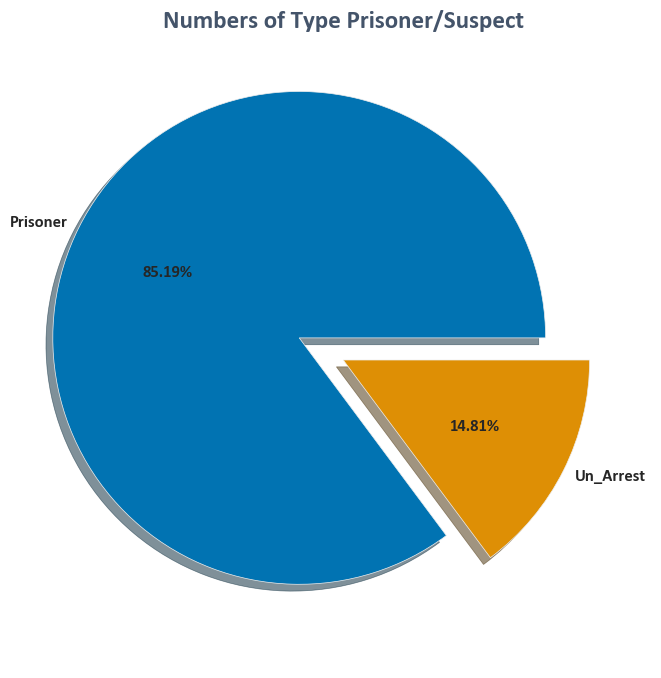

In [380]:
prispic1=inv_pris_det.groupby("Type_Prisoner_Inmate_Name")["Prisoner_Inmate_ID"].count()
special_colors_pie_blind = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_pie_blind))
plt.figure(figsize=(8, 8))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
plt.title('Numbers of Type Prisoner/Suspect' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.style.use('ggplot')
plt.pie(prispic1,labels=prispic1.index, autopct="%1.2f%%", explode=(0.2,0.0),
        shadow=True, 
        colors=special_colors_pie_blind, 
        labeldistance=1.05,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.show()

**Main assumptions and conclusions**
- Pie Chart Overview: 
- The pie chart visually represents the distribution of prisoner types in correctional facilities.
- Key observations:
    - Prisoners: They constitute the largest share, accounting for 85.19%.
    - Under Arrest: Detainees under close surveillance make up 14.81%.
- These insights offer valuable context for understanding the composition of prisoners within the sample. 

**Prisoners Count Categorized by Correction Name**

In [381]:
inv_pris_det.groupby(["Correction_Facility_Name"])[["Prisoner_Inmate_ID"]].count()

Prisoner_Inmate_ID
Correction_Facility_Name                    
Arizona_Prison                             1
California_Prison                          4
Colorado                                   3
Illinois_Prison                            3
Maryland_Prison                            1
Nevada_Prison                              2
New_York_Prison                            7
Ohio_Prison                                1
Pennsylvania_Prison                        2
Texas_Prison                               3

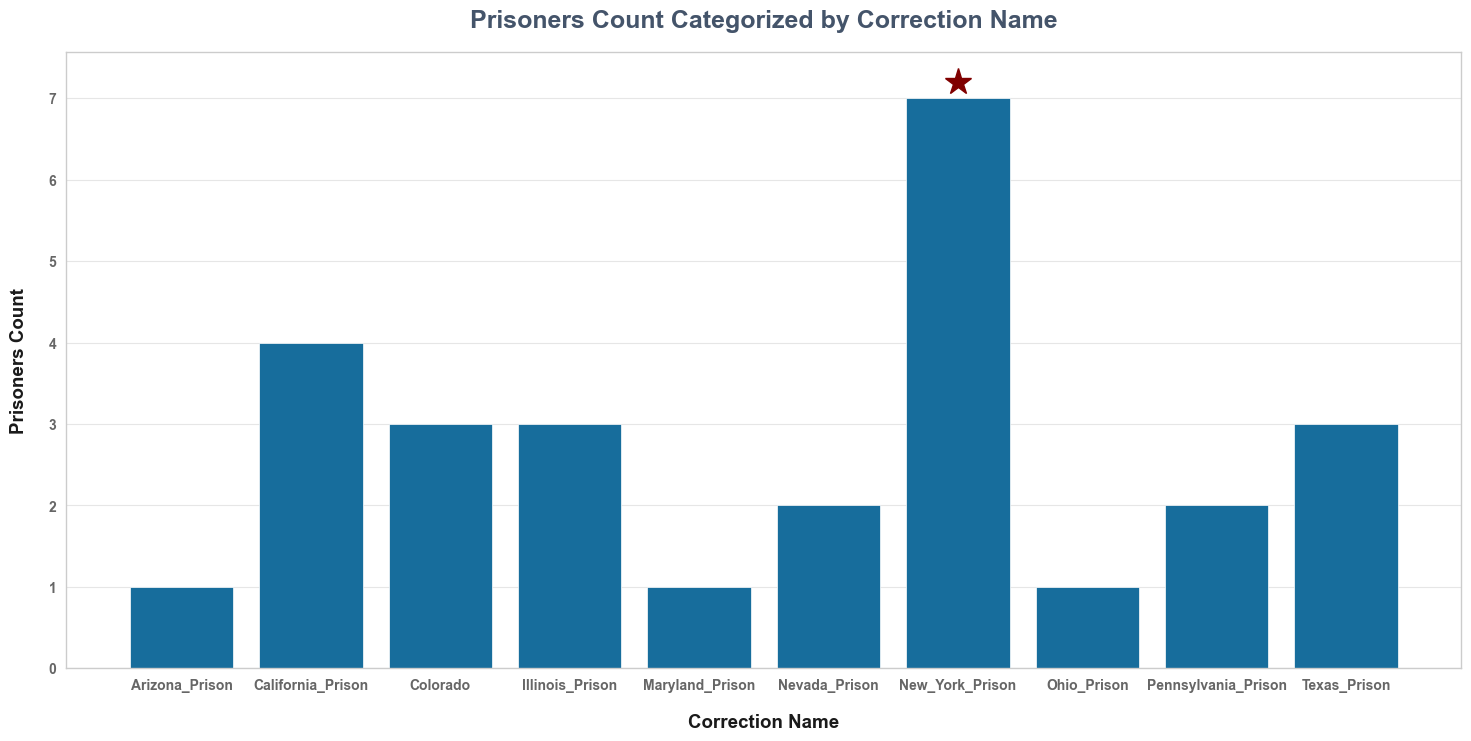

In [382]:
sb.set_style("whitegrid", {"grid.color": ".9"})
special_colors_bar5 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_bar5))
plt.figure(figsize=(18, 8))
grouped_Corr_prisoner=inv_pris_det.groupby([inv_pris_det['Correction_Facility_Name']]).agg({'Prisoner_Inmate_ID':'count'}).reset_index()
grouped_Corr_prisoner1=sb.barplot(data=grouped_Corr_prisoner, x='Correction_Facility_Name', y='Prisoner_Inmate_ID')
plt.title('Prisoners Count Categorized by Correction Name' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Correction Name', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Prisoners Count', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4') 
grouped_Corr_prisoner1.plot('New_York_Prison', 7.2, "*", markersize=20, color="#800000")
plt.show()

**Assumptioms and Main Conclusions**
- Barplot Overview: The barplot displays the number of prisoners across different prison facilities in the sample from 1984 to 2018.
- Key observations:
    - New York Prison: Recorded the highest number of prisoners (seven).
    - California Prison: Registered the second highest number of prisoners (four).
    - Following Facilities: Colorado Prison, Illinois Prison, and Texas Prison each had three prisoners.
- These insights offer valuable context for understanding offense distribution among various prison facilities.

**Differences between Correction Facilities Categorized by Security Level**

In [383]:
inv_pris_det.groupby(['Correction_Facility_Name', 'Security_Level_Position']).agg({"Prisoner_Inmate_ID":'count'})

Prisoner_Inmate_ID
Correction_Facility_Name Security_Level_Position                    
Arizona_Prison           Medium                                    1
California_Prison        Maximum                                   4
Colorado                 Maximum                                   3
Illinois_Prison          Medium                                    3
Maryland_Prison          Medium                                    1
Nevada_Prison            Maximum                                   2
New_York_Prison          Medium                                    7
Ohio_Prison              Medium                                    1
Pennsylvania_Prison      Medium                                    2
Texas_Prison             Maximum                                   3

<Figure size 1800x800 with 0 Axes>

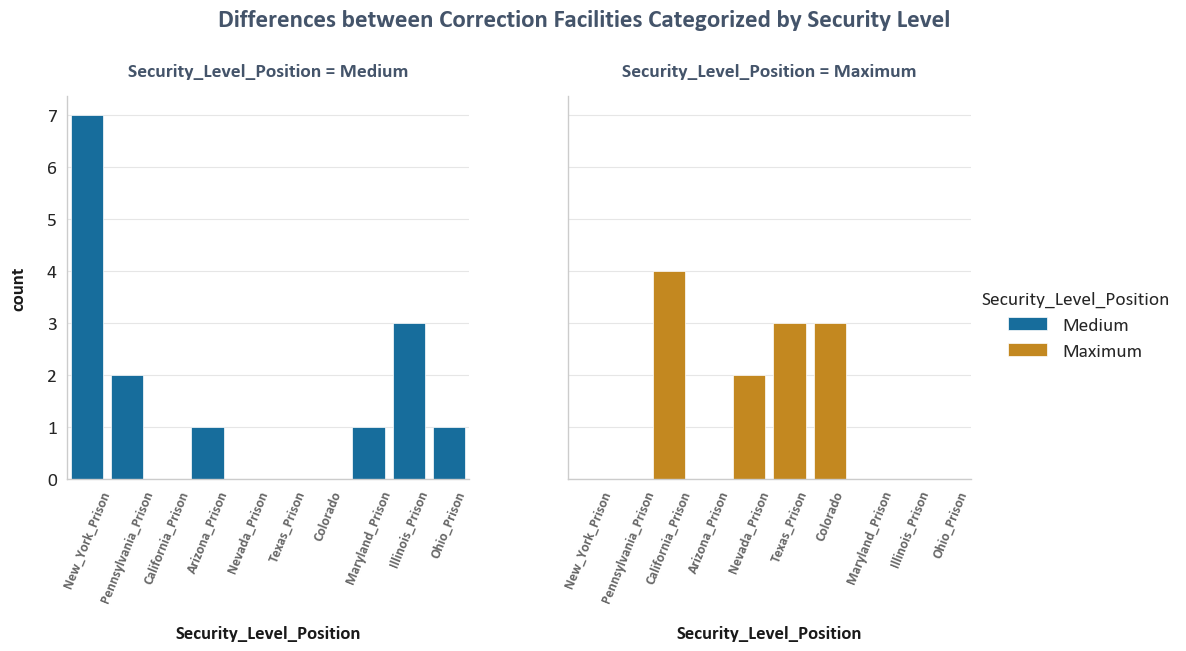

In [384]:
special_colors_bar20 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_bar20))
plt.figure(figsize=(18, 8))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
cat_Corr_Pris_1 = inv_pris_det[inv_pris_det['Security_Level_Position'].isin(['Medium', 'Maximum'])]
cat_plot_Corr_Priss = sb.catplot(data=cat_Corr_Pris_1, x="Correction_Facility_Name", hue="Security_Level_Position",
                                 col='Security_Level_Position', kind="count")
cat_plot_Corr_Priss.fig.suptitle('Differences between Correction Facilities Categorized by Security Level',
                                  fontsize=18, fontweight="bold", color="#44546A", va='baseline', ha='center', y=1.05)
cat_plot_Corr_Priss.set_xlabels('Security_Level_Position', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
cat_plot_Corr_Priss.set_ylabels('count', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
cat_plot_Corr_Priss.set_xticklabels(rotation=68, fontsize=10, fontweight='bold', color='.4')
cat_plot_Corr_Priss.set_titles(size=14, weight='bold', color='#44546A', pad=15)
plt.show()

**Main assumptions and conclusions**
- Catplot (Countplot) Overview:The chart depicts the total number of prisoners based on security levels in correctional facilities from 1984 to 2018.
- Key observations:
    - New York Facility: Highest number of maximum-security prisoners (seven).
    - California Facility: Largest number of medium-security prisoners (four).
    - Other facilities at the same security level had fewer prisoners.
- These insights provide context for understanding prisoner distribution across security levels.

**Prisoners and Suspects income per month Categorized by Employment Type in Prison (CI)**

In [385]:
inv_pris_det.groupby([inv_pris_det['Emp_Name_Prison']]).agg({'Income_per_month': ['mean','std','count']})

Income_per_month                   
                               mean          std count
Emp_Name_Prison                                       
Carpentry_workshop     11339.666667  5721.355638     3
Kitchen                12180.750000  4990.726107     8
Laundry                10079.714286  7242.756996     7
Teacher                20556.000000  4424.970847     3

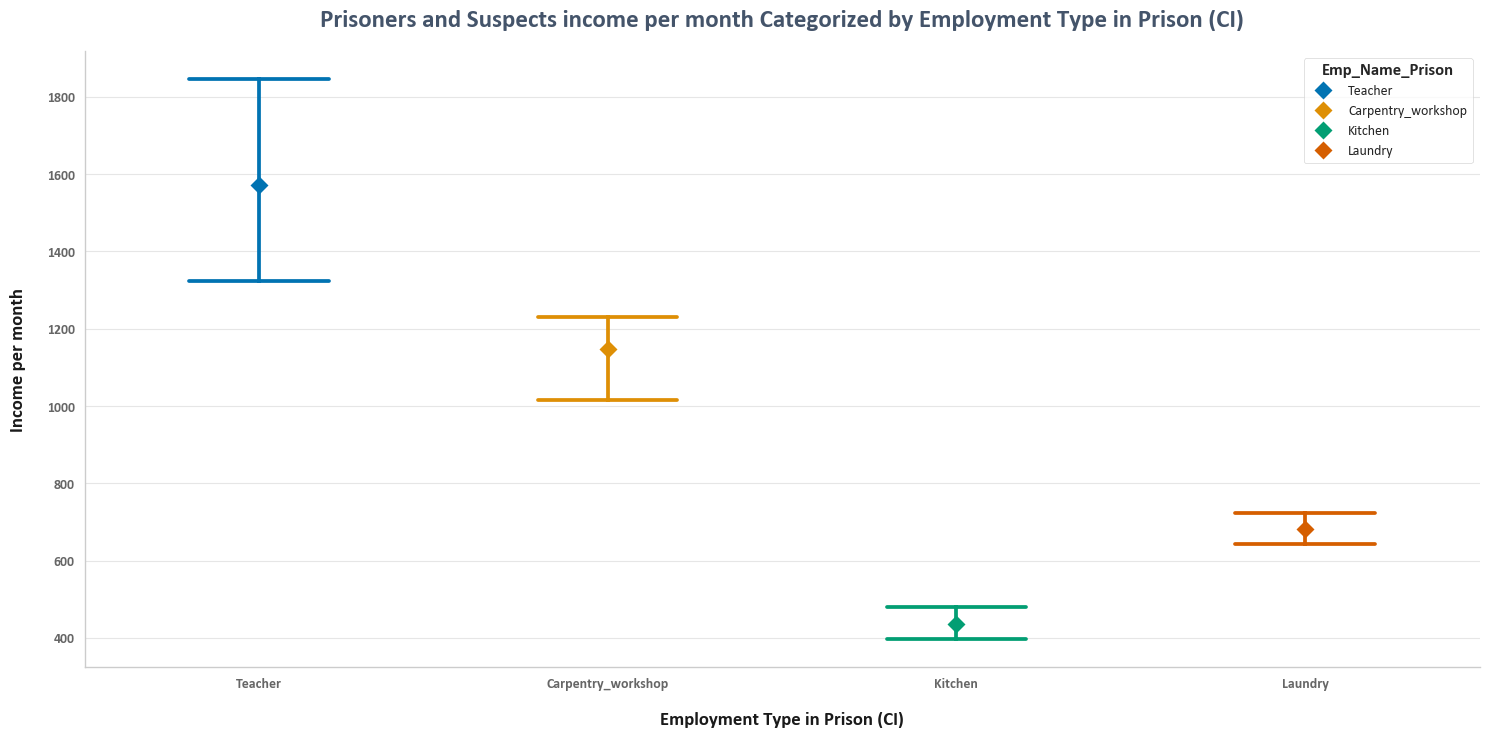

In [386]:
special_colors_point2 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_point2))
plt.figure(figsize=(18, 8))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
plt.title('Prisoners and Suspects income per month Categorized by Employment Type in Prison (CI)' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Employment Type in Prison (CI)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Income per month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
sb.pointplot(data=inv_pris_det,
             x="Emp_Name_Prison", y="Income_Prisoner_Per_Month", capsize=.4, hue="Emp_Name_Prison",
    palette='colorblind', linestyle="none", marker="D", legend=True,
            errorbar="ci"
            )
legend_emp_pris_ci = plt.legend(title="Emp_Name_Prison", loc="best", prop={"size": 10})
legend_emp_pris_ci.set_title("Emp_Name_Prison", prop={"size": 12, "weight": "bold"})
sb.despine()
plt.show()

**Assumptioms and Main Conclusions**
- Pointplot Overview: The chart illustrates how confidence intervals shed light on the certainty of prison employment types regarding average monthly income for inmates. A higher confidence level (e.g., 95%) results in a narrower margin.
- Key observations from this small sample:
    - Kitchen and laundry Employees: Their monthly income falls within the margin with a 95% chance of being representative.
    - Teachers: Their employment doesn’t significantly align with monthly income; they fall 5% outside the margin.
- Additionally, we can delve deeper by conducting a one-way ANOVA test. This statistical test allows us to compare means across different offense categories to identify significant differences.

**Prisoners and Suspects income per month Categorized by Employment Type in Prison (sd)**

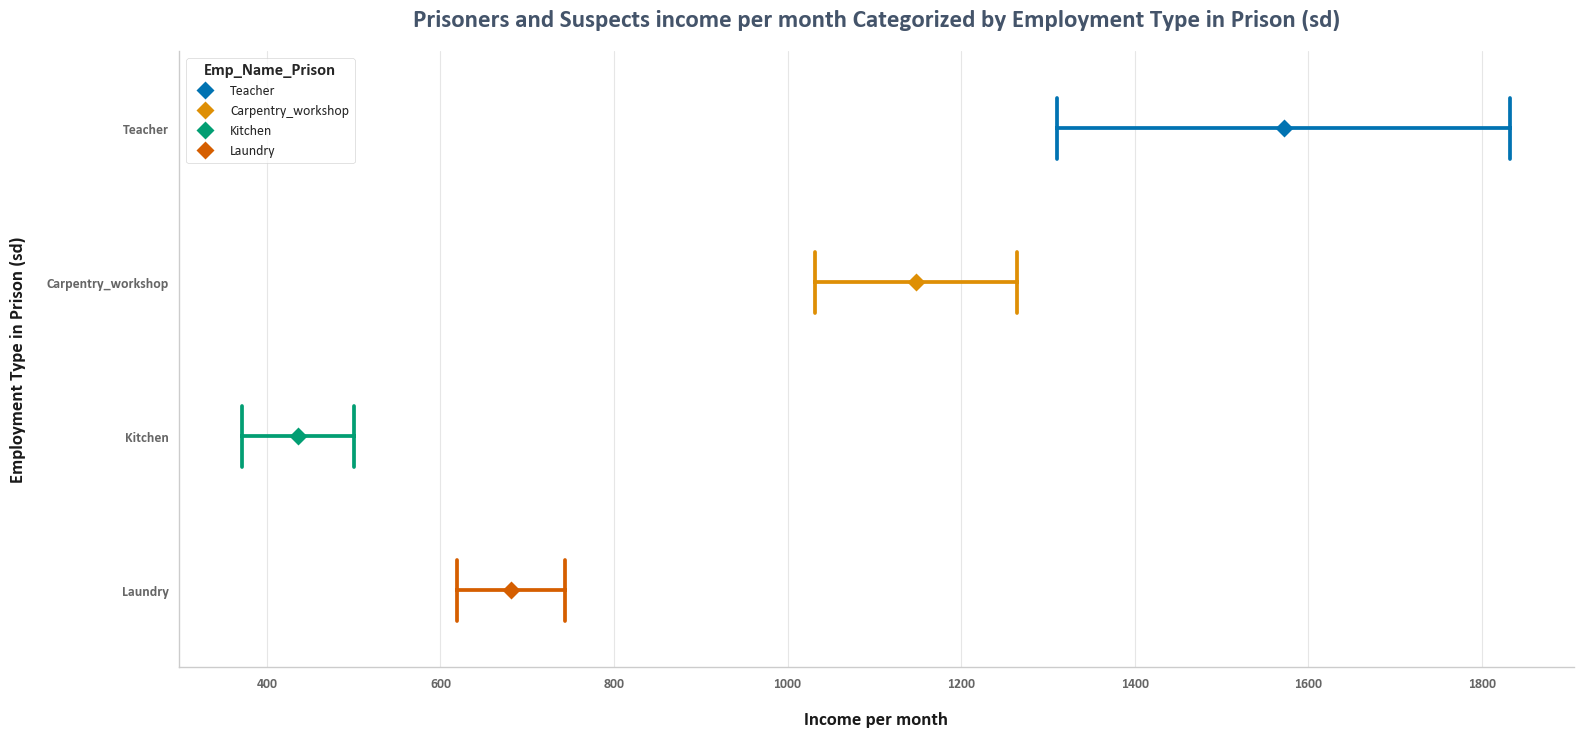

In [387]:
special_colors_point2 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_point2))
plt.figure(figsize=(18, 8))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
plt.title('Prisoners and Suspects income per month Categorized by Employment Type in Prison (sd)' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Income per month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Employment Type in Prison (sd)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
sb.pointplot(data=inv_pris_det,
             x="Income_Prisoner_Per_Month", y="Emp_Name_Prison", capsize=.4, hue="Emp_Name_Prison",
    palette='colorblind', linestyle="none", marker="D", legend=True,
            errorbar="sd"
            )
legend_emp_pris_sd = plt.legend(title="Emp_Name_Prison", loc="best", prop={"size": 10})
legend_emp_pris_sd.set_title("Emp_Name_Prison", prop={"size": 12, "weight": "bold"})
sb.despine()
plt.show()

**Assumptioms and Main Conclusions**
- Pointplot Overview: The chart illustrates how examining the spread of data using standard deviation allows us to explore the variation in average monthly income associated with different types of employment in correctional facilities. A wider spread indicates greater variability.
- Key observations from this small sample:
    - Kitchen and Laundry Employees: Their average wage income aligns with previous findings and is similar to that of the entire prison population.
    - Teachers: Their employment shows a wider spread, indicating more variation in monthly income.
- These findings enhance the reliability of our margin of error

**Prisoners and Suspects expenses per month Categorized by Employment Type in Prison (CI)**

In [388]:
inv_pris_det.groupby([inv_pris_det['Emp_Name_Prison']]).agg({'Expenses_Prisoner_Per_Month': ['mean','std','count']})

Expenses_Prisoner_Per_Month                  
                                          mean         std count
Emp_Name_Prison                                                 
Carpentry_workshop                  450.666667    1.154701     3
Kitchen                             279.125000   68.467797     8
Laundry                             327.285714   87.558960     7
Teacher                             575.666667  164.135107     3

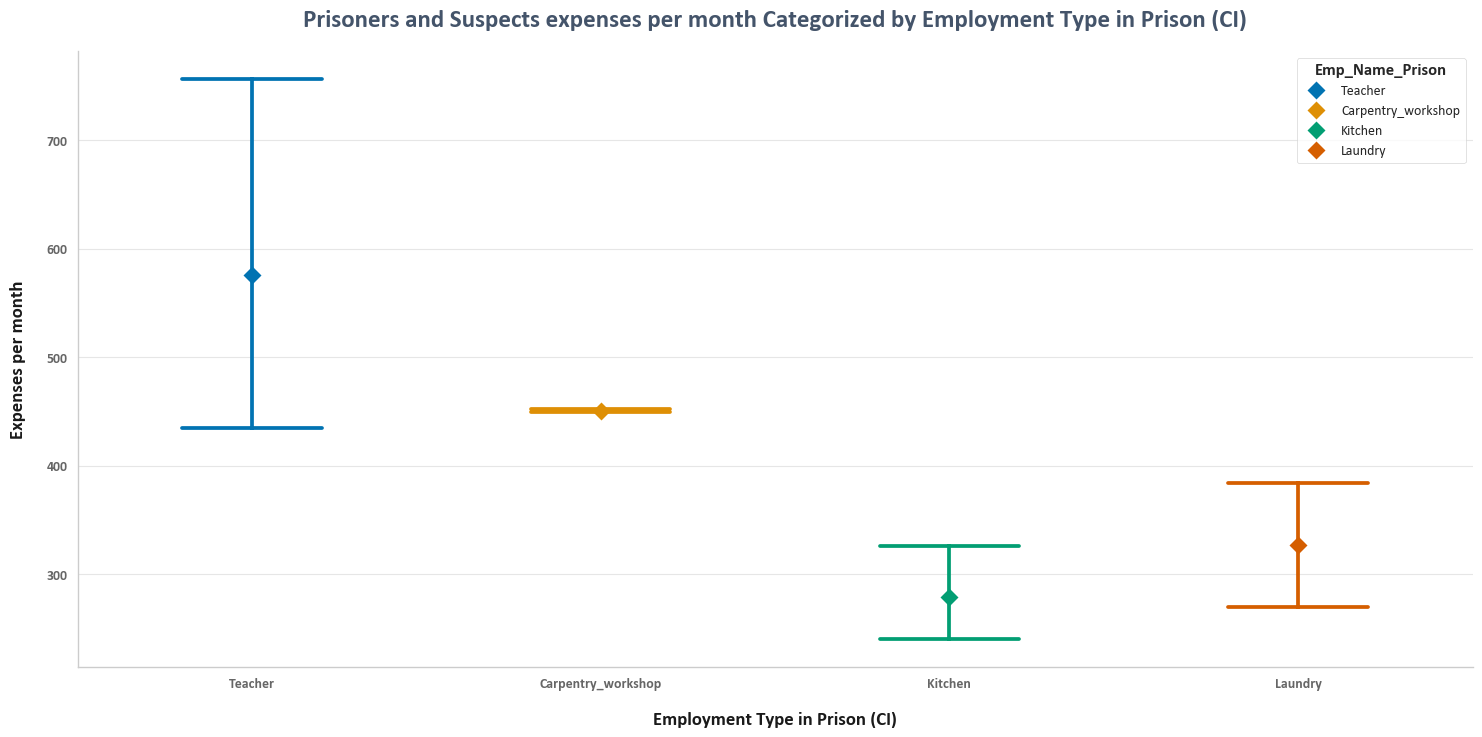

In [389]:
special_colors_point2 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_point2))
plt.figure(figsize=(18, 8))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
plt.title('Prisoners and Suspects expenses per month Categorized by Employment Type in Prison (CI)' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Employment Type in Prison (CI)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Expenses per month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
sb.pointplot(data=inv_pris_det,
             x="Emp_Name_Prison", y="Expenses_Prisoner_Per_Month", capsize=.4, hue="Emp_Name_Prison",
    palette='colorblind', linestyle="none", marker="D", legend=True,
            errorbar="ci"
            )
legend_emp_pris_ci = plt.legend(title="Emp_Name_Prison", loc="best", prop={"size": 10})
legend_emp_pris_ci.set_title("Emp_Name_Prison", prop={"size": 12, "weight": "bold"})
sb.despine()
plt.show()

**Assumptioms and Main Conclusions**
- Pointplot Overview: The chart illustrates how confidence intervals shed light on the certainty of prison employment types regarding average monthly inmate spending. A higher confidence level (e.g., 95%) results in a narrower margin.
- Key observations from this small sample:
    - Kitchen Workers: Their average monthly expenditure falls within the margin with a 95% chance of being representative.
    - Teachers: Their employment does not significantly align with average monthly expenditure; they fall 5% outside the margin.
- Additionally, we can delve deeper by performing a one-way ANOVA test. This statistical test allows us to compare means between different offense categories to identify significant differences.

**Prisoners and Suspects expenses per month Categorized by Employment Type in Prison (sd)**

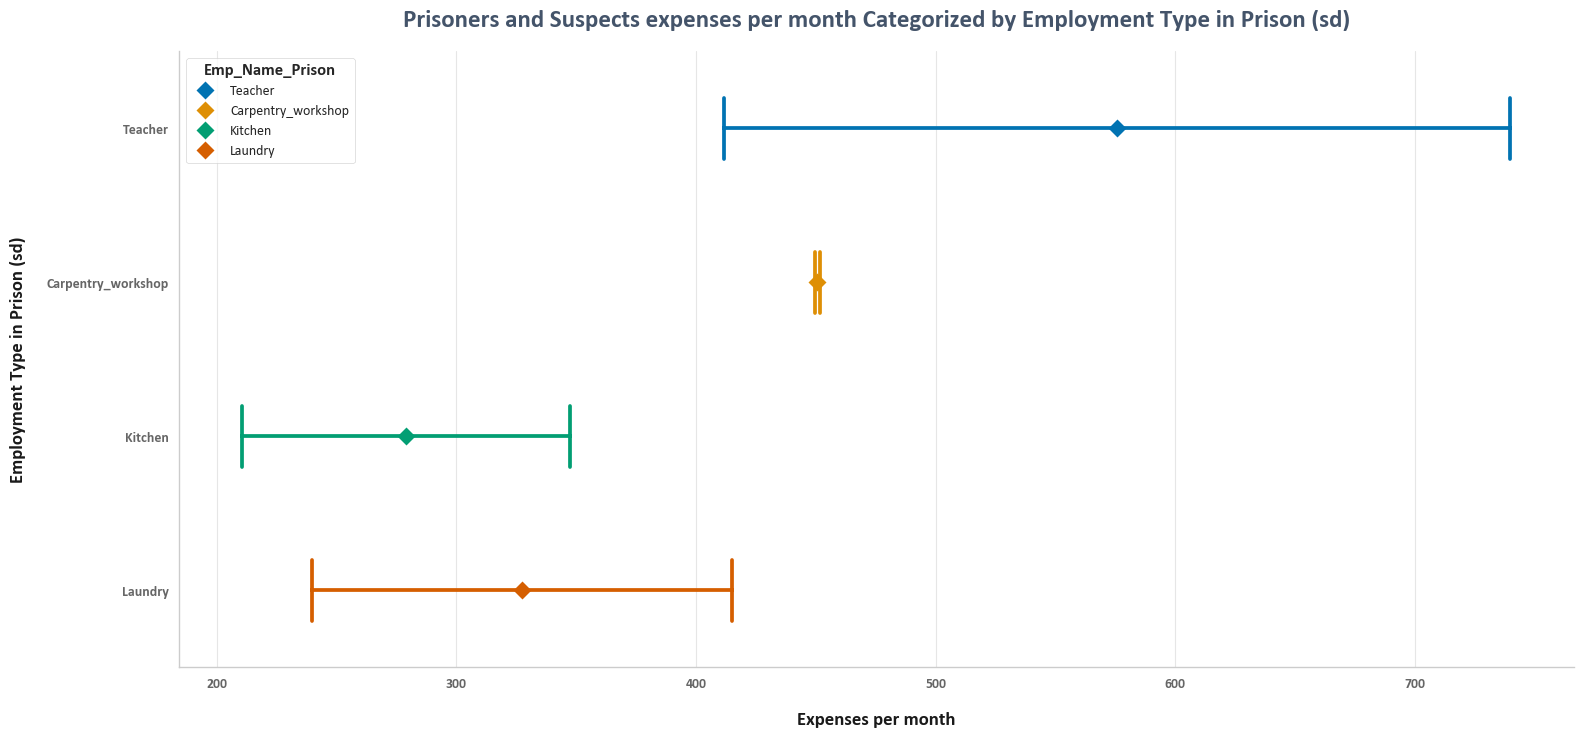

In [390]:
special_colors_point2 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_point2))
plt.figure(figsize=(18, 8))
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = 14
plt.title('Prisoners and Suspects expenses per month Categorized by Employment Type in Prison (sd)' ,loc ="center" ,fontsize=18, fontweight="bold" ,color="#44546A", pad=18)
plt.xlabel('Expenses per month', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Employment Type in Prison (sd)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
sb.pointplot(data=inv_pris_det,
             x="Expenses_Prisoner_Per_Month", y="Emp_Name_Prison", capsize=.4, hue="Emp_Name_Prison",
    palette='colorblind', linestyle="none", marker="D", legend=True,
            errorbar="sd"
            )
legend_emp_pris_sd = plt.legend(title="Emp_Name_Prison", loc="best", prop={"size": 10})
legend_emp_pris_sd.set_title("Emp_Name_Prison", prop={"size": 12, "weight": "bold"})
sb.despine()
plt.show()

**Assumptioms and Main Conclusions**
- Pointplot Overview: The chart illustrates how examining the spread of data using standard deviation allows us to explore the variation in average monthly expenditure associated with different types of employment in correctional facilities. A wider spread indicates greater variability.
- Key observations from this small sample:
    - Kitchen and Laundry Workers: Their average expenditure aligns with previous findings and is similar to that of the entire prison population.
    - Teachers: Their employment shows a wider dispersion, indicating greater variation in monthly expenditure.
- These findings enhance the reliability of our margin of error

**Time Spent In Prison (Months) Categorized by Correction Facilities Name**

In [391]:
inv_pris_det[["Time_Spent_Prison_MM"]].head()

Time_Spent_Prison_MM
0                 242.4
1                 246.5
2                 122.9
3                  61.9
4                 128.5

C:\Users\razha\AppData\Local\Temp\ipykernel_12604\3708953612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  time_correction1 = sb.catplot(data=inv_pris_det, x="Time_Spent_Prison_MM",


<Figure size 1200x1000 with 0 Axes>

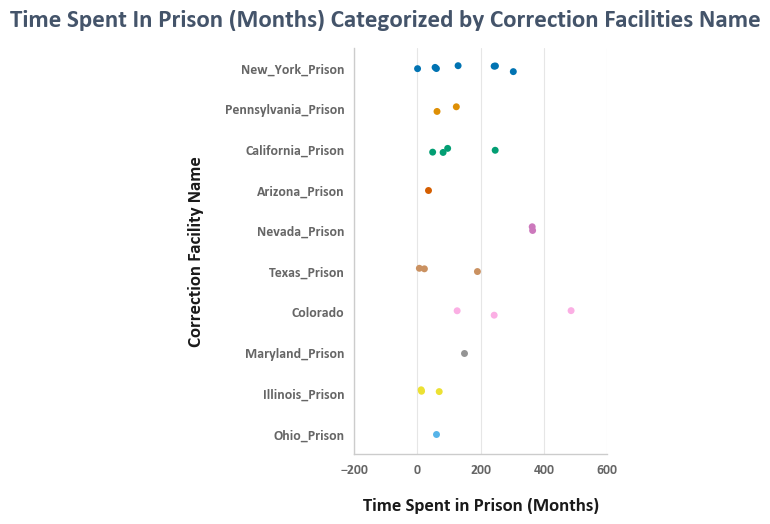

In [392]:
special_colors_swarm3 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_swarm3))
plt.figure(figsize=(12, 10))
time_correction1 = sb.catplot(data=inv_pris_det, x="Time_Spent_Prison_MM",
                              y="Correction_Facility_Name", kind="strip",
                              marker='o', palette=special_colors_swarm3)
time_correction1.fig.suptitle('Time Spent In Prison (Months) Categorized by Correction Facilities Name',
                              fontsize=18, fontweight="bold", color="#44546A", va='baseline', ha='center', y=1.00)
time_correction1.set_xlabels('Time Spent in Prison (Months)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
time_correction1.set_ylabels('Correction Facility Name', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
time_correction1.set_xticklabels(fontsize=10, fontweight='bold', color='.4')
time_correction1.set_yticklabels(fontsize=10, fontweight='bold', color='.4')
time_correction1.set_titles(size=14, weight='bold', color='#44546A', pad=18)
plt.show()

**Assumptioms and Main Conclusions**
- Catplot (strip) Overview: This chart illustrates how the distribution of observations allows us to explore the variation in the time prisoner spent in prison.
    - Colorado Prison: The distribution of time spent in prison shows the highest variation.
    - California Prison: The dispersion is small, indicating low variability, and inmates do not stay as long compared to other correctional facilities in the chart.
- This information provides valuable context for understanding the differences in length of stay across correctional facilities

#### Complex Visualization - Statistical meaningful

**Correlation and Linear Reggresion Line (OLS equation line) - prisoner realese age and total time in prison**

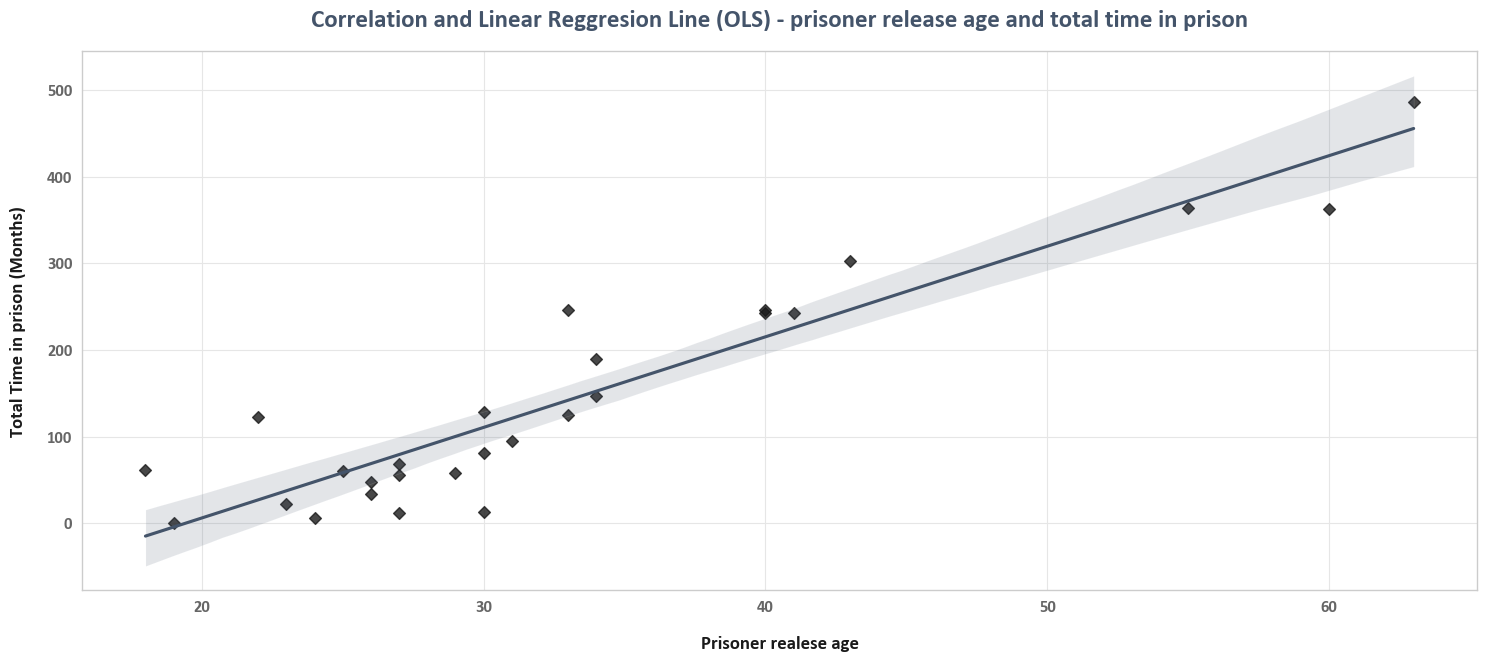

In [393]:
special_colors_regplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_regplot1))
plt.figure(figsize=(18, 7))
sb.regplot(data=inv_pris_det, x="Release_Age", y="Time_Spent_Prison_MM", ci=95, color=".1", marker="D", line_kws=dict(color="#44546A"),)
plt.title('Correlation and Linear Reggresion Line (OLS) - prisoner release age and total time in prison',
          fontsize=18, fontweight="bold", color="#44546A", pad=18)
plt.xlabel('Prisoner realese age', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Total Time in prison (Months)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=12, fontweight='bold', color='.4')
plt.yticks(fontsize=12, fontweight='bold', color='.4')
plt.show()

**Assumptioms and Main Conclusions**
- Regplot Overview: The chart displays a correlation with a regression line.
    - The key insight is that as the age at which a prisoner is released from prison increases, their length of stay in prison also increases.
    - This relationship is evident from both the regression line and the observations (represented by small diamonds) clustered around it.
- To further investigate the predictive power of release age on prison stay length, we can perform linear regression and assess regression hypothesis tests.

**Total prisoner entrance age**

<Figure size 1800x800 with 0 Axes>

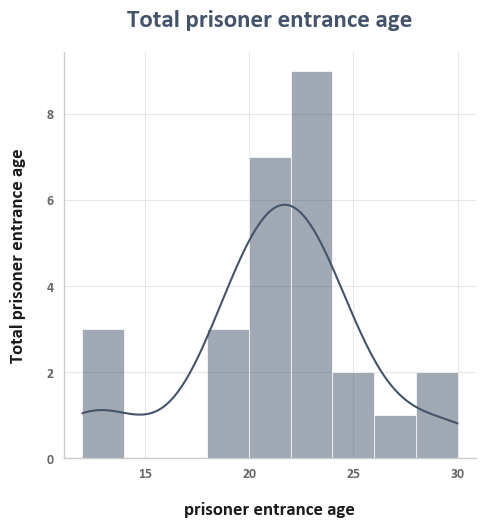

In [394]:
special_colors_displot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_displot1))
plt.figure(figsize=(18, 8))
sb.displot(data=inv_pris_det, x="Entrance_Age", kde=True, color="#44546A")
plt.title('Total prisoner entrance age',
          fontsize=18, fontweight="bold", color="#44546A", pad=18)
plt.xlabel('prisoner entrance age', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Total prisoner entrance age', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()

**Assumptioms and Main Conclusions**
- Displot (kde) Overview: The The diagram reveals a normal distribution concerning the age count upon entering prison.
- Consequently, the central limit theorem suggests that there may be equality between the average, median, and mode.
- This information provides valuable context for understanding the distribution of ages among prisoners entering correctional facilities.

**Total prisoner release age**

<Figure size 1200x800 with 0 Axes>

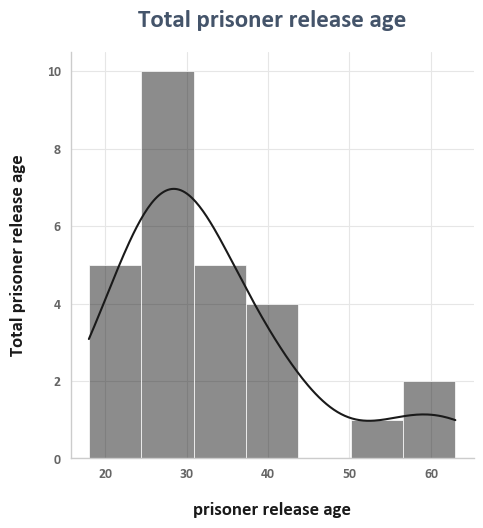

In [395]:
special_colors_displot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_displot1))
plt.figure(figsize=(12, 8))
sb.displot(data=inv_pris_det, x="Release_Age", kde=True, color=".1")
plt.title('Total prisoner release age',
          fontsize=18, fontweight="bold", color="#44546A", pad=18)
plt.xlabel('prisoner release age', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Total prisoner release age', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()

**Assumptioms and Main Conclusions**
- Displot (kde) Overview: The diagram indicates a right-skewed distribution for the count of ages at release from prison.
- Consequently, most released prisoners are young (closer to 30 years old) compared to older prisoners (closer to 60 years old).
- This information provides valuable context for understanding the age distribution among prisoners leaving correctional facilities.

**Linear Regression Check Correlations Between Time Of Prisoners Entrance Age to Income and Expenses Categorized by Employment Type imprisonment (for numeric variables)**

<Figure size 3000x2500 with 0 Axes>

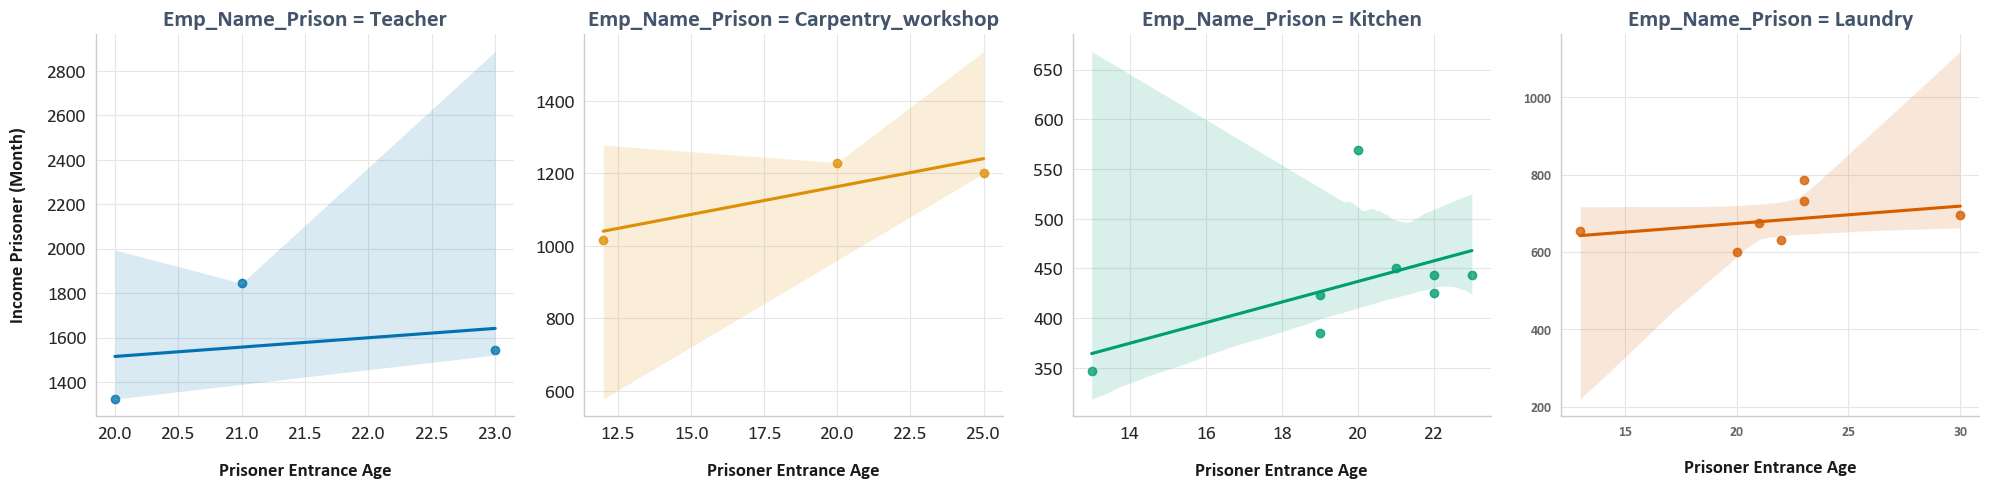

In [396]:
special_colors_lmplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_lmplot1))
plt.figure(figsize=(30, 25))
linear_rel_age_in1 = sb.lmplot(data=inv_pris_det, x="Entrance_Age", y="Income_Prisoner_Per_Month", col="Emp_Name_Prison",
         facet_kws=dict(sharex=False, sharey=False), hue="Emp_Name_Prison")
linear_rel_age_in1.set_titles(fontsize=20, fontweight="bold", color="#44546A")
linear_rel_age_in1.set_axis_labels("Prisoner Entrance Age", "Income Prisoner (Month)"
                                      ,fontsize=13.5, fontweight='bold', color=".1", labelpad=15)
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()

**Assumptioms and Main Conclusions**
- lmplot Overview: The chart depicts a correlation with a regression line, focusing on the relationship between age of entry and averge monthly income in categorized by employment type during prison.
- Key insights:
    - As the age at which a prisoner enters prison increases, their income also tends to increase.
    - The connection is stronger for those employed in the kitchen.
    - The relationship is weaker for those employed in teaching.
- These patterns are evident both from the regression line and the observations (represented by small circles) clustered around it. 

<Figure size 3000x2500 with 0 Axes>

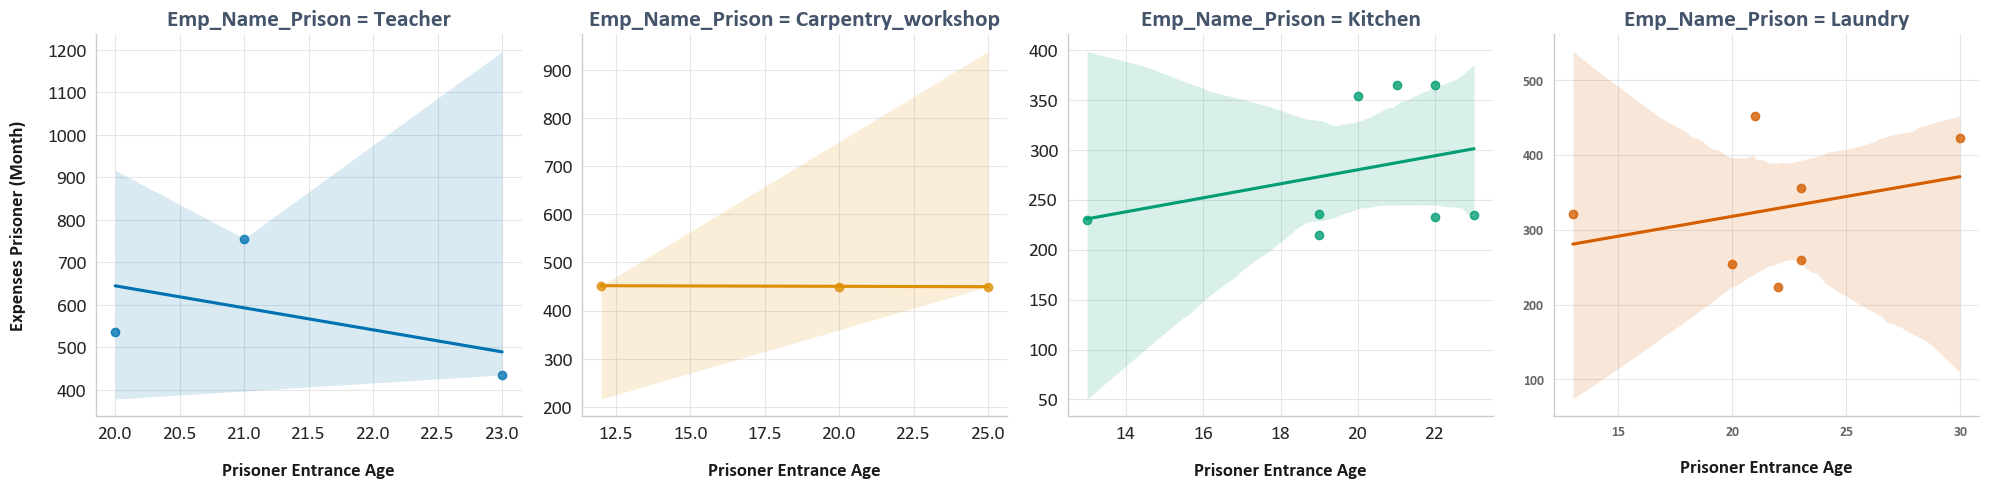

In [397]:
special_colors_lmplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_lmplot1))
plt.figure(figsize=(30, 25))
linear_rel_age_ex1 = sb.lmplot(data=inv_pris_det, x="Entrance_Age", y="Expenses_Prisoner_Per_Month", col="Emp_Name_Prison",
         facet_kws=dict(sharex=False, sharey=False), hue="Emp_Name_Prison")
linear_rel_age_ex1.set_titles(fontsize=20, fontweight="bold", color="#44546A")
linear_rel_age_ex1.set_axis_labels("Prisoner Entrance Age", "Expenses Prisoner (Month)"
                                      ,fontsize=13.5, fontweight='bold', color=".1", labelpad=15)
plt.xticks(fontsize=10, fontweight='bold', color=".4" )
plt.yticks(fontsize=10, fontweight='bold', color=".4" )
plt.show()

**Assumptioms and Main Conclusions**
- lmplot Overview: The diagram depicts a correlation with a regression line, focusing on the relationship between age of entry and average monthly expenditure in different employment categories during prison.
- Key insights:
    - As the age at which a prisoner enters prison increases, their expenditure tends to increase for those employed in the kitchen and laundry.
    - Conversely, as the age at entry increases, expenditure tends to decrease for those employed in teaching and the craft workshop.
- These patterns are evident both from the regression line and the observations (represented by small circles) clustered around it.

**Linear Regression Check Correlations Between Time Of Prisoners Release Age to Income and Expenses Categorized by Employment Type imprisonment (for numeric variables)**

<Figure size 3000x2500 with 0 Axes>

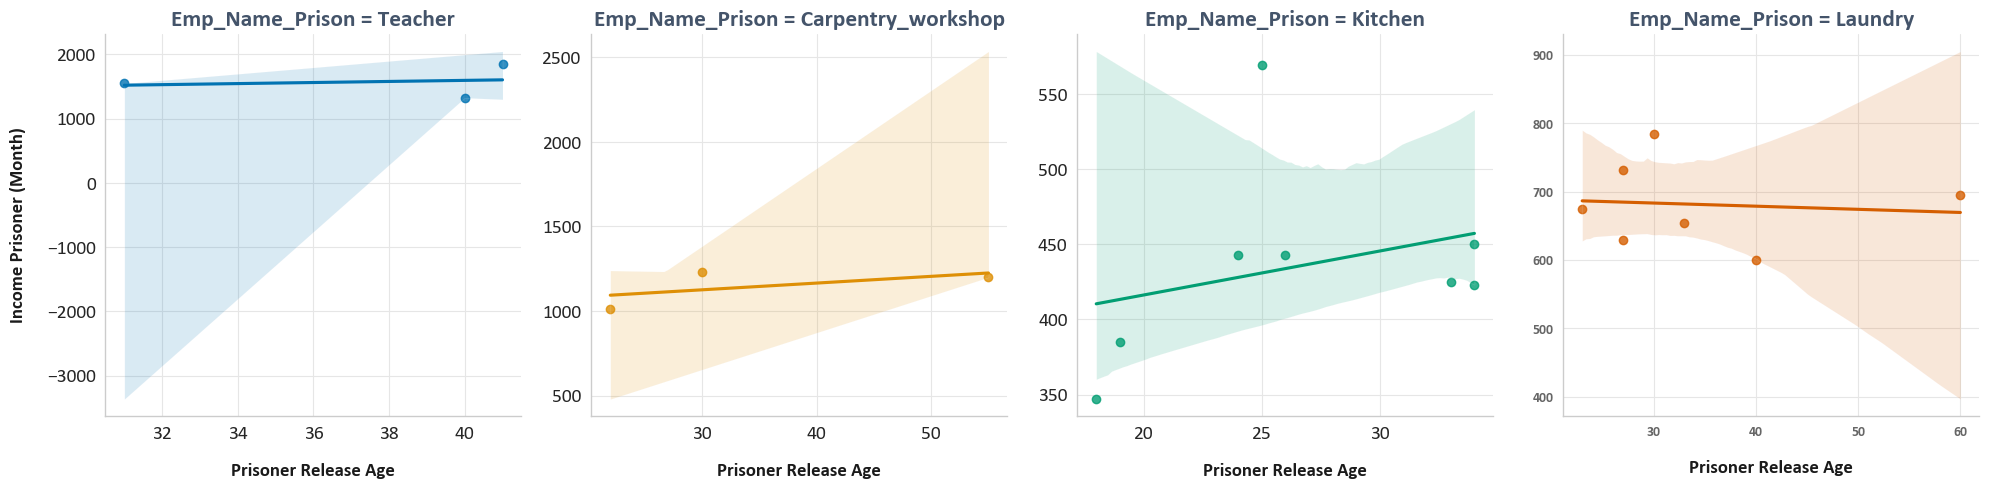

In [398]:
special_colors_lmplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_lmplot1))
plt.figure(figsize=(30, 25))
linear_rel_age_in= sb.lmplot(data=inv_pris_det, x="Release_Age", y="Income_Prisoner_Per_Month", col="Emp_Name_Prison",
         facet_kws=dict(sharex=False, sharey=False), hue="Emp_Name_Prison")
linear_rel_age_in.set_titles(fontsize=20, fontweight="bold", color="#44546A")
linear_rel_age_in.set_axis_labels("Prisoner Release Age", "Income Prisoner (Month)"
                                      ,fontsize=13.5, fontweight='bold', color=".1", labelpad=15)
plt.xticks(fontsize=10, fontweight='bold', color=".4")
plt.yticks(fontsize=10, fontweight='bold', color=".4")
plt.show()

**Assumptioms and Main Conclusions**
- lmplot Overview: The diagram illustrates a correlation with a regression line, focusing on the relationship between age of entry and average monthly income based on different employment types during prison.
- Key insights:
    - As the age at which a prisoner enters prison increases, their income tends to increase, particularly for those employed in the workshop and kitchen.
    - Conversely, the relationship is weaker for prisoners employed in teaching (likely due to a very small sample) and laundry.
- These patterns are evident both from the regression line and the observations (represented by small circles) clustered around it. 

<Figure size 3000x2500 with 0 Axes>

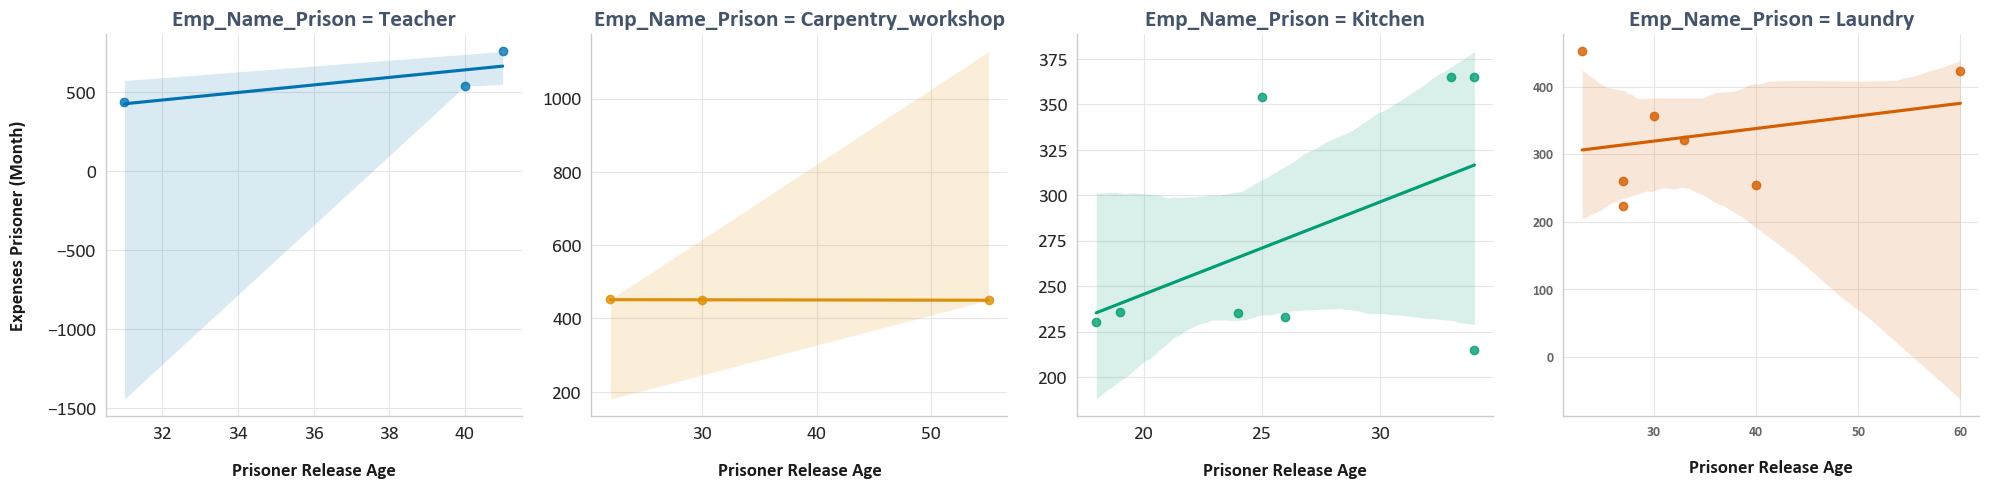

In [399]:
special_colors_lmplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_lmplot1))
plt.figure(figsize=(30, 25))
linear_rel_age_ex = sb.lmplot(data=inv_pris_det, x="Release_Age", y="Expenses_Prisoner_Per_Month", col="Emp_Name_Prison",
         facet_kws=dict(sharex=False, sharey=False), hue="Emp_Name_Prison")
linear_rel_age_ex.set_titles(fontsize=20, fontweight="bold", color="#44546A")
linear_rel_age_ex.set_axis_labels("Prisoner Release Age", "Expenses Prisoner (Month)"
                                      ,fontsize=13.5, fontweight='bold', color=".1", labelpad=15)
plt.xticks(fontsize=10, fontweight='bold', color=".4")
plt.yticks(fontsize=10, fontweight='bold', color=".4")
plt.show()

**Assumptioms and Main Conclusions**
- lmplot Overview: The diagram illustrates a correlation with a regression line, focusing on the relationship between the age of entry into prison and the average monthly expenditure across different employment categories.
-  Key Insights:
    - Positive Correlation:
        - For prisoners employed in the kitchen (which exhibits the strongest link), teaching, and laundry, as the age of entry increases, their expenses tend to rise.
    - Negative Correlation:
        - Conversely, for prisoners employed in the carpentry workshop, as the age at entry increases, their expenditure tends to decrease.
    - Observations:
        - These patterns are evident both from the regression line and the observations represented by small circles grouped around it.

**Correction Charactaristics - Permanent Cell Size (square meter) For Each Correctional Facility**

In [400]:
inv_pris_det.groupby(['Correction_Facility_Name']).agg({'Prisoner_Inmate_ID':'count','Cell_Size':['mean', 'median', 'var', 'std', 'max', 'min']})

Prisoner_Inmate_ID Cell_Size                        \
                                      count      mean median  var  std  max   
Correction_Facility_Name                                                      
Arizona_Prison                            1       5.2    5.2  NaN  NaN  5.2   
California_Prison                         4       6.0    6.0  0.0  0.0  6.0   
Colorado                                  3       6.2    6.2  0.0  0.0  6.2   
Illinois_Prison                           3       4.7    4.7  0.0  0.0  4.7   
Maryland_Prison                           1       4.8    4.8  NaN  NaN  4.8   
Nevada_Prison                             2       4.9    4.9  0.0  0.0  4.9   
New_York_Prison                           7       4.5    4.5  0.0  0.0  4.5   
Ohio_Prison                               1       4.9    4.9  NaN  NaN  4.9   
Pennsylvania_Prison                       2       4.5    4.5  0.0  0.0  4.5   
Texas_Prison                              3       4.5    4.5  0.0  0.0  4.5   

                               
                          min  
Correction_Facility_Name       
Arizona_Prison            5.2  
California_Prison         6.0  
Colorado                  6.2  
Illinois_Prison           4.7  
Maryland_Prison           4.8  
Nevada_Prison             4.9  
New_York_Prison           4.5  
Ohio_Prison               4.9  
Pennsylvania_Prison       4.5  
Texas_Prison              4.5

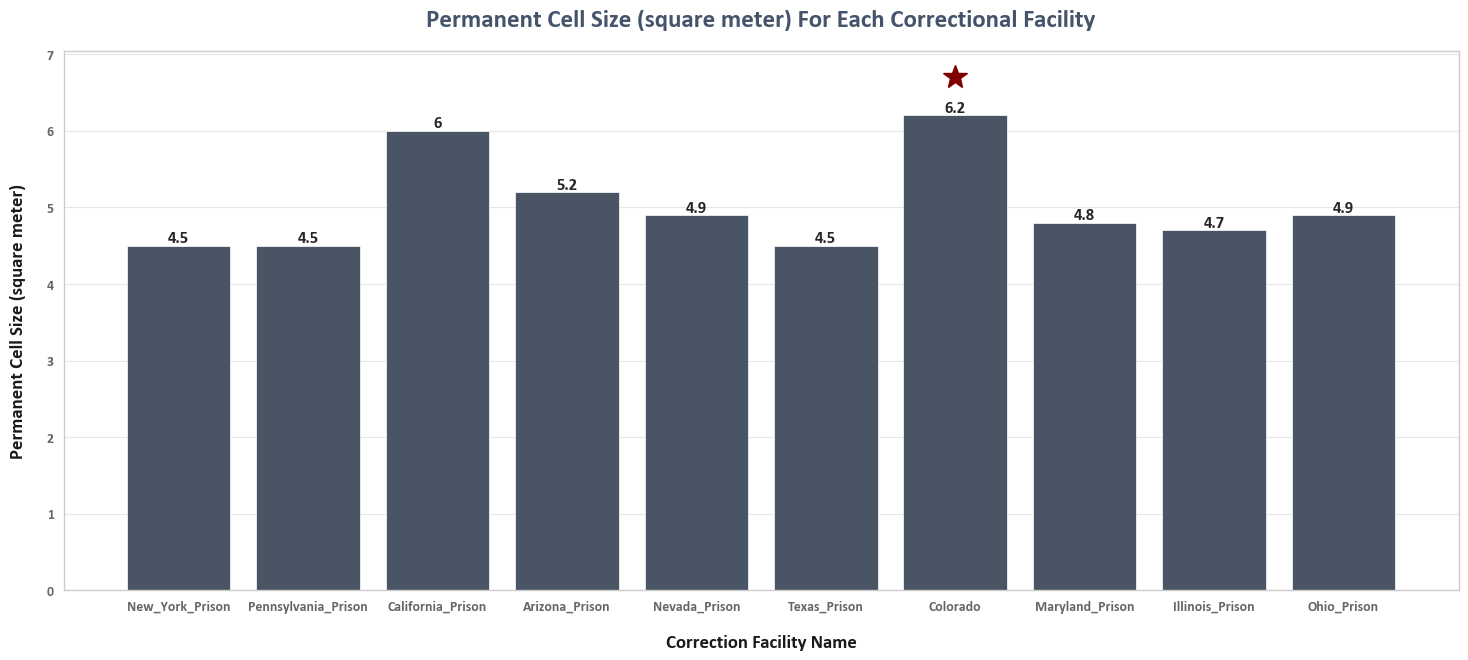

In [401]:
plt.figure(figsize=(18, 7))
cell_size_barplot1 = sb.barplot(inv_pris_det, x="Correction_Facility_Name", y="Cell_Size", errorbar=None, color="#44546A")
cell_size_barplot1.bar_label(cell_size_barplot1.containers[0], fontsize=12, fontweight='bold')
cell_size_barplot1.plot('Colorado', 6.7, "*", markersize=18, color="#800000")
plt.title("Permanent Cell Size (square meter) For Each Correctional Facility", fontsize=18, fontweight="bold", color="#44546A", pad=18)
plt.xlabel("Correction Facility Name", fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel("Permanent Cell Size (square meter)", fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold' ,color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()

**Main assumptions and conclusions**
- Barplot Overview:The chart provides an overview of the total number of correctional facilities, with each facility represented by a fixed cell size.
- Key Observations:
    - Notably, the Colorado penitentiary has the largest cell size (6.2 square meters) compared to the minimum international standard. For instance, the New York penitentiary adheres to a smaller cell size of 4.5 square meters.

**Correction Facility Income (Month) and Correction Facility Expenses (Month) Categorized By Correction Facility Name**

In [402]:
inv_pris_det.groupby(['Correction_Facility_Name']).agg({'Income_Prisoner_Per_Month' : ['mean', 'median', 'var', 'std', 'max', 'min'], 'Expenses_Prisoner_Per_Month':['mean', 'median', 'var', 'std', 'max', 'min']})

Income_Prisoner_Per_Month                        \
                                              mean median            var   
Correction_Facility_Name                                                   
Arizona_Prison                            0.000000    0.0            NaN   
California_Prison                       857.000000  719.5  230836.666667   
Colorado                                341.666667  425.0   95208.333333   
Illinois_Prison                         210.000000    0.0  132300.000000   
Maryland_Prison                         450.000000  450.0            NaN   
Nevada_Prison                           947.500000  947.5  127512.500000   
New_York_Prison                         869.285714  732.0  398017.904762   
Ohio_Prison                               0.000000    0.0            NaN   
Pennsylvania_Prison                     681.000000  681.0  223112.000000   
Texas_Prison                            513.333333  443.0   19460.333333   

                                                     \
                                 std     max    min   
Correction_Facility_Name                              
Arizona_Prison                   NaN     0.0    0.0   
California_Prison         480.454646  1546.0  443.0   
Colorado                  308.558476   600.0    0.0   
Illinois_Prison           363.730670   630.0    0.0   
Maryland_Prison                  NaN   450.0  450.0   
Nevada_Prison             357.088924  1200.0  695.0   
New_York_Prison           630.886602  1845.0    0.0   
Ohio_Prison                      NaN     0.0    0.0   
Pennsylvania_Prison       472.347330  1015.0  347.0   
Texas_Prison              139.500299   674.0  423.0   

                         Expenses_Prisoner_Per_Month                       \
                                                mean median           var   
Correction_Facility_Name                                                    
Arizona_Prison                              0.000000    0.0           NaN   
California_Prison                         336.250000  338.5   7011.583333   
Colorado                                  206.666667  255.0  35058.333333   
Illinois_Prison                            74.666667    0.0  16725.333333   
Maryland_Prison                           365.000000  365.0           NaN   
Nevada_Prison                             436.500000  436.5    364.500000   
New_York_Prison                           370.285714  354.0  58360.571429   
Ohio_Prison                                 0.000000    0.0           NaN   
Pennsylvania_Prison                       341.000000  341.0  24642.000000   
Texas_Prison                              300.666667  235.0  17276.333333   

                                                    
                                 std    max    min  
Correction_Facility_Name                            
Arizona_Prison                   NaN    0.0    0.0  
California_Prison          83.735198  435.0  233.0  
Colorado                  187.238707  365.0    0.0  
Illinois_Prison           129.326460  224.0    0.0  
Maryland_Prison                  NaN  365.0  365.0  
Nevada_Prison              19.091883  450.0  423.0  
New_York_Prison           241.579327  756.0    0.0  
Ohio_Prison                      NaN    0.0    0.0  
Pennsylvania_Prison       156.977705  452.0  230.0  
Texas_Prison              131.439466  452.0  215.0

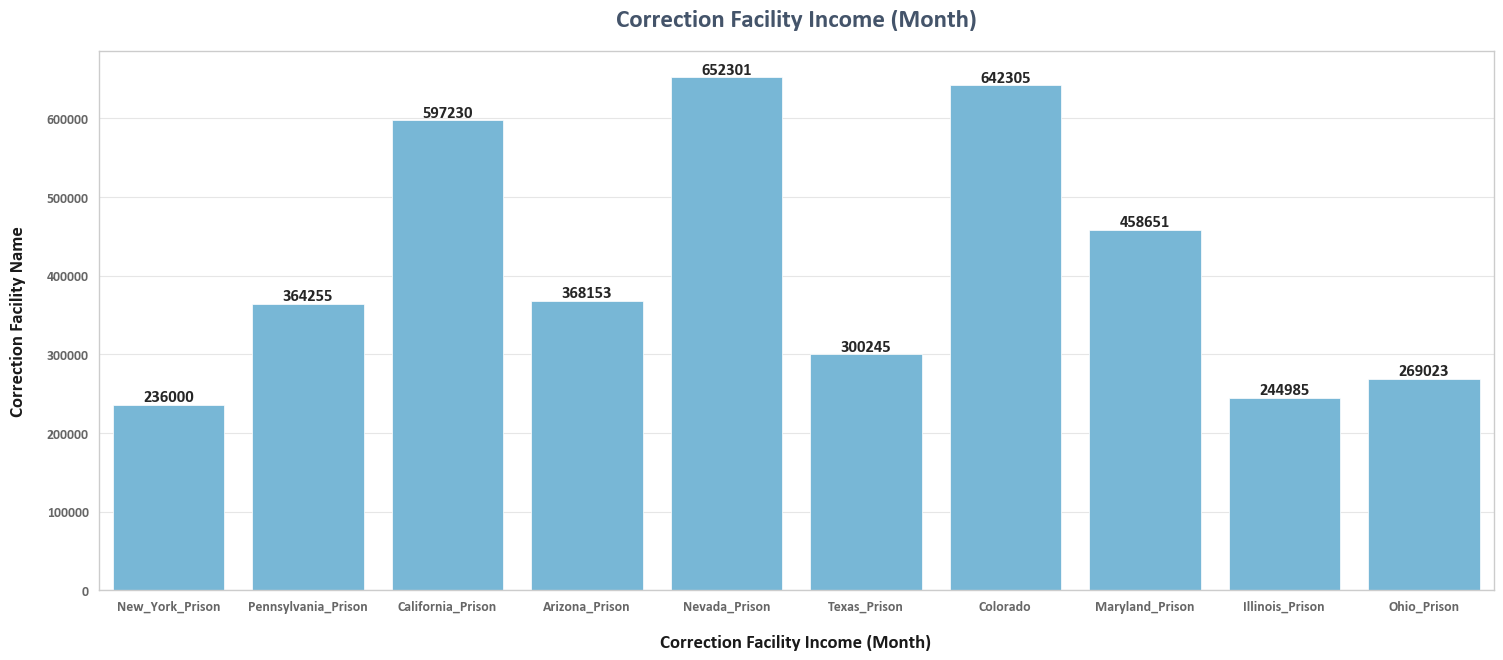

In [403]:
plt.figure(figsize=(18, 7))
income_corr_barplot1=sb.barplot (inv_pris_det, x="Correction_Facility_Name", y="Income_Correction_Per_Month", errorbar=None, color="#68BCE6")
income_corr_barplot1.bar_label(income_corr_barplot1.containers[0], fontsize=12, fontweight='bold', label_type='edge')
plt.title("Correction Facility Income (Month)", fontsize=18, fontweight="bold", color="#44546A", pad=18)
plt.xlabel("Correction Facility Income (Month)", fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel("Correction Facility Name", fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold' ,color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()

**Main assumptions and conclusions**
- Barplot Overview:The bar chart offers an overview of the average monthly income across different correctional facilities, with each facility segmented by its name.
- Key Observations:
- Notably, the Colorado and Nevada correctional facilities exhibit the highest revenues, with incomes of 652,301 respectively.
Conversely, the New York correctional facility reports the lowest income at 23,600, followed closely by the Illinois facility at 244,985.

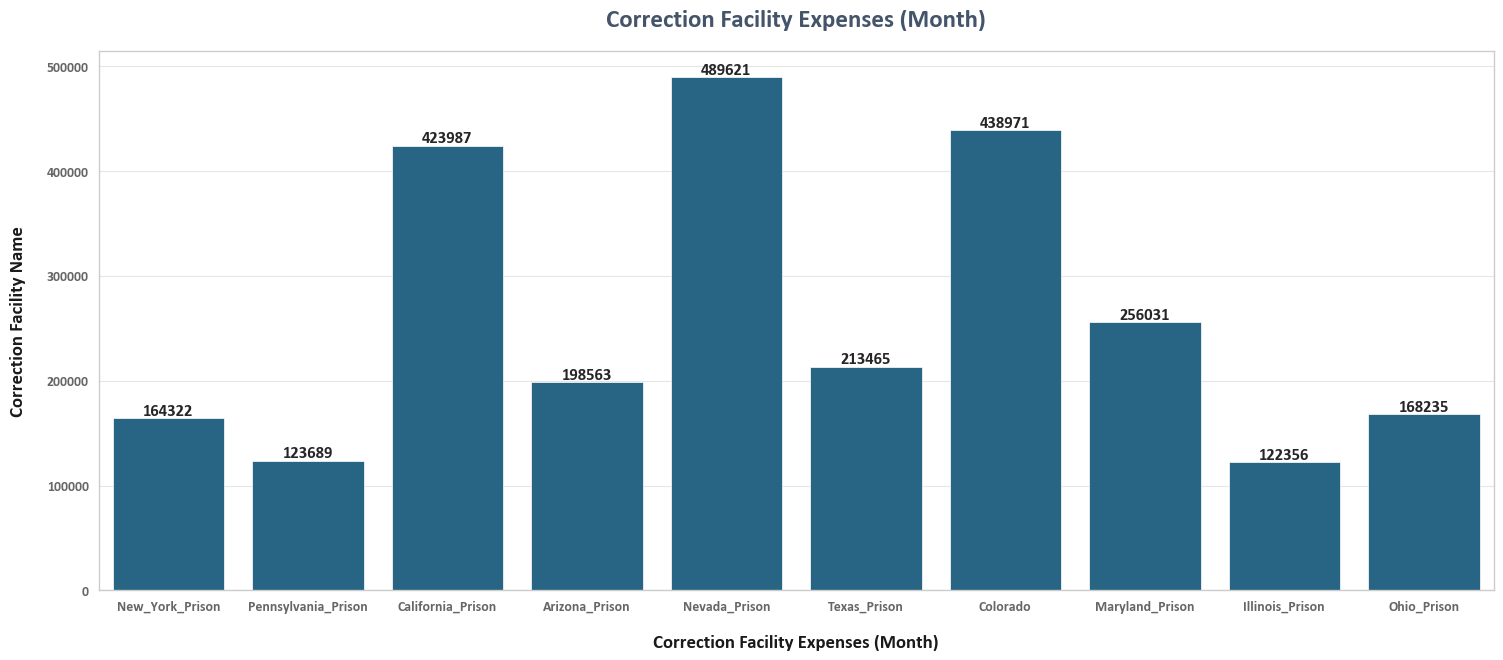

In [404]:
plt.figure(figsize=(18, 7))
expenses_corr_barplot1=sb.barplot (inv_pris_det, x="Correction_Facility_Name", y="Expenses_Correction_Per_Month", errorbar=None, color="#196A93")
expenses_corr_barplot1.bar_label(expenses_corr_barplot1.containers[0], fontsize=12, fontweight='bold', label_type='edge')
plt.title("Correction Facility Expenses (Month)", fontsize=18, fontweight="bold", color="#44546A", pad=18)
plt.xlabel("Correction Facility Expenses (Month)", fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel("Correction Facility Name", fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold' ,color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()

**Main assumptions and conclusions**
- Barplot Overview: The bar chart offers an overview of the average monthly spending across different correctional facilities, segmented by their names.
- Key Observations:
- Notably, the Nevada Correctional Facility has the highest expenditure, totaling 489,621.
- Conversely, the penitentiary facility in Pennsylvania reports the lowest expenditure at 123,689.

**Income Correction (Month) and Cell Size (square meter) By Correction Facility - Correlation and Regression Line**

<Figure size 1800x8700 with 0 Axes>

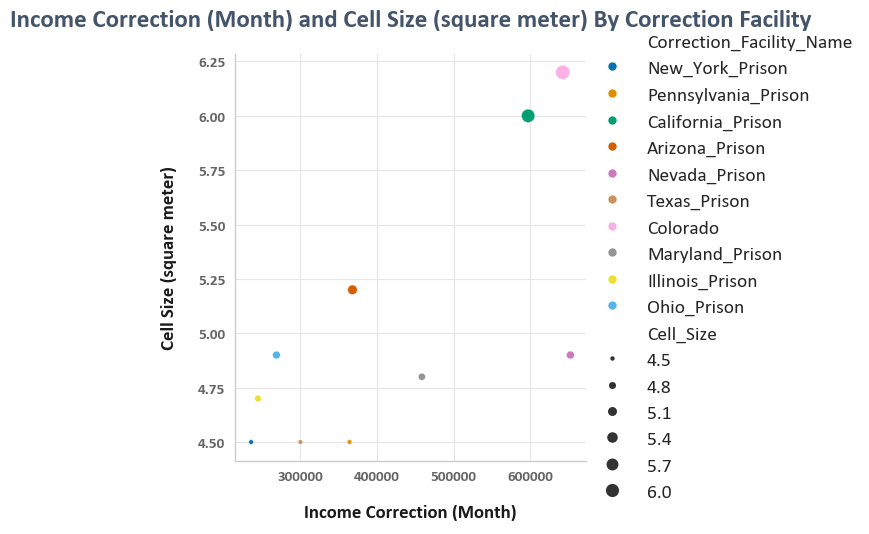

In [405]:
special_colors_relplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_relplot1))
plt.figure(figsize=(18, 87))
linear_rel_inc1 = sb.relplot(data=inv_pris_det, x="Income_Correction_Per_Month", y="Cell_Size",
          hue="Correction_Facility_Name", size="Cell_Size", sizes=(10, 100))
linear_rel_inc1.set_titles(fontsize=18, fontweight="bold", color="#44546A")
linear_rel_inc1.set_axis_labels("Income_Correction_Per_Month", "Income Prisoner (Month)"
                                      ,fontsize=13.5, fontweight='bold', color=".1", labelpad=15)
plt.title('Income Correction (Month) and Cell Size (square meter) By Correction Facility',
          fontsize=18, fontweight="bold", color="#44546A", pad=20)
plt.xlabel('Income Correction (Month)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Cell Size (square meter)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=11, fontweight='bold', color='.4')
plt.yticks(fontsize=11, fontweight='bold', color='.4')
plt.show()

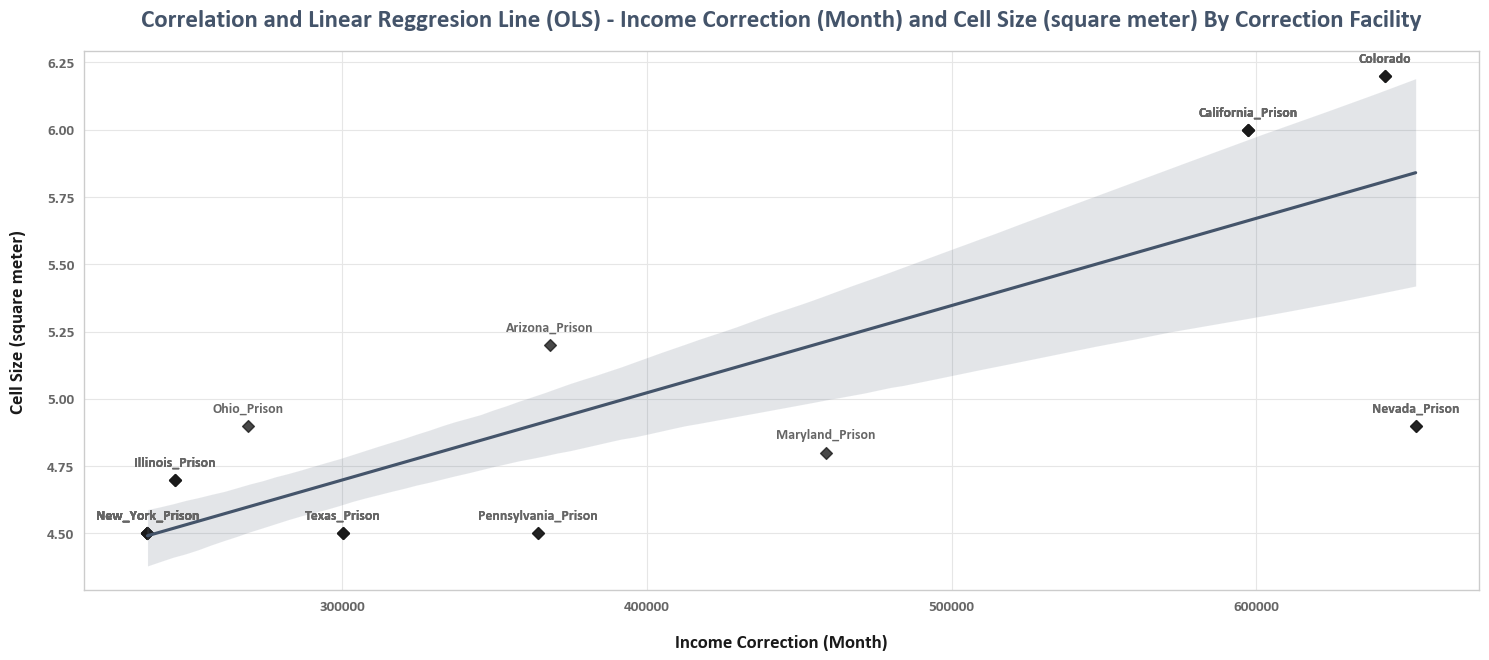

In [406]:
special_colors_regplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_regplot1))
plt.figure(figsize=(18, 7))
sb.regplot(data=inv_pris_det, x="Income_Correction_Per_Month", y="Cell_Size", ci=95, color=".1", marker="D", line_kws=dict(color="#44546A"),)
plt.title('Correlation and Linear Reggresion Line (OLS) - Income Correction (Month) and Cell Size (square meter) By Correction Facility',
          fontsize=18, fontweight="bold", color="#44546A", pad=18)
for i, row in inv_pris_det.iterrows():
    plt.annotate(row["Correction_Facility_Name"], (row["Income_Correction_Per_Month"], row["Cell_Size"]),
                 textcoords="offset points", xytext=(0, 10), ha="center", fontsize=10, fontweight="bold", color='.4')
plt.xlabel('Income Correction (Month)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Cell Size (square meter)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=11, fontweight='bold', color='.4')
plt.yticks(fontsize=11, fontweight='bold', color='.4')
plt.show()

**Main assumptions and conclusions**
- Overview: The relational plot (relplot) provides an overview of the average monthly revenue of correctional facilities in relation to their cell size.
- Key Observations:
    - Notably, the correctional facilities in Colorado and California exhibit the highest income relative to the size of their cells.
    - Conversely, the smallest income in relation to cell size is observed for the correctional facilities in New York, Texas, and Pennsylvania (which share the same cell size), as well as for Illinois, Ohio, and Arizona (which have varying sizes of correctional cells).
- Overall, there is a positive correlation between cell size and income, indicating that as the cell size increases, the income tends to increase.

**Expenses Correction (Month) and Cell Size By Correction Facility - Correlation and Regression Line**

<Figure size 1800x700 with 0 Axes>

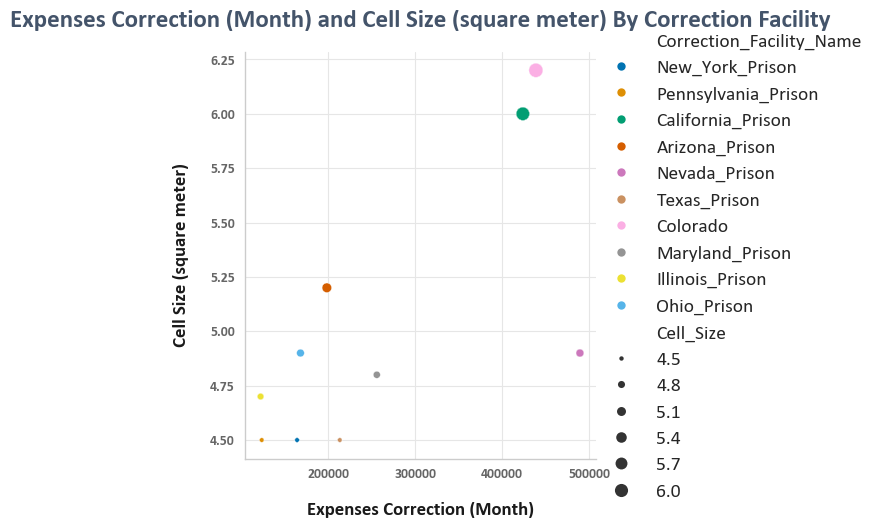

In [407]:
special_colors_relplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_relplot1))
plt.figure(figsize=(18, 7))
linear_rel_exp1 = sb.relplot(data=inv_pris_det, x="Expenses_Correction_Per_Month", y="Cell_Size",
          hue="Correction_Facility_Name", size="Cell_Size", sizes=(10, 100))
linear_rel_exp1.set_titles(fontsize=18, fontweight="bold", color="#44546A")
linear_rel_exp1.set_axis_labels("Expenses_Correction_Per_Month", "Expenses Prisoner (Month)"
                                      ,fontsize=13.5, fontweight='bold', color=".1", labelpad=15)
plt.title('Expenses Correction (Month) and Cell Size (square meter) By Correction Facility',
          fontsize=18, fontweight="bold", color="#44546A", pad=18)
plt.xlabel('Expenses Correction (Month)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Cell Size (square meter)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=10, fontweight='bold', color='.4')
plt.yticks(fontsize=10, fontweight='bold', color='.4')
plt.show()

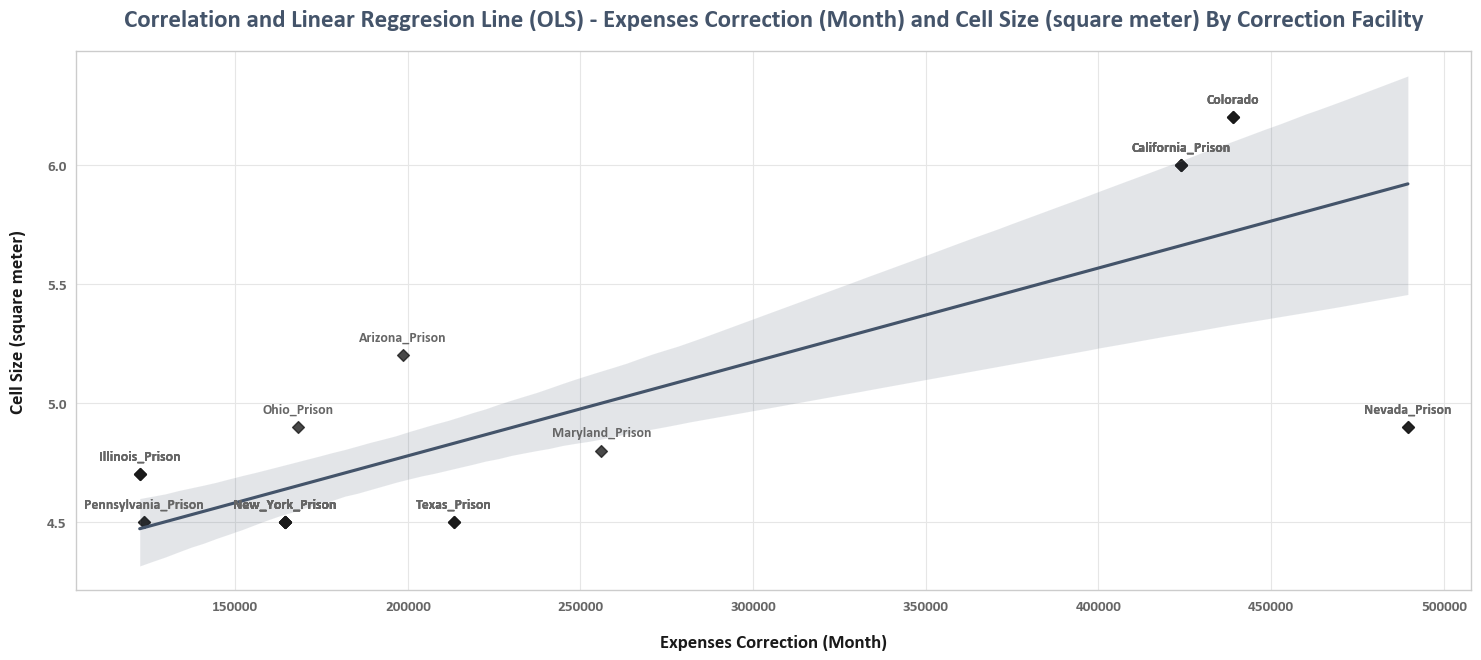

In [408]:
special_colors_regplot1 = sb.color_palette("colorblind")
sb.set_palette(sb.color_palette(special_colors_regplot1))
plt.figure(figsize=(18, 7))
sb.regplot(data=inv_pris_det, x="Expenses_Correction_Per_Month", y="Cell_Size", ci=95, color=".1", marker="D", line_kws=dict(color="#44546A"),)
plt.title('Correlation and Linear Reggresion Line (OLS) - Expenses Correction (Month) and Cell Size (square meter) By Correction Facility',
          fontsize=18, fontweight="bold", color="#44546A", pad=18)
for i, row in inv_pris_det.iterrows():
    plt.annotate(row["Correction_Facility_Name"], (row["Expenses_Correction_Per_Month"], row["Cell_Size"]),
                 textcoords="offset points", xytext=(0, 10), ha="center", fontsize=10, fontweight="bold", color='.4')
plt.xlabel('Expenses Correction (Month)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.ylabel('Cell Size (square meter)', fontsize=13.5, fontweight='bold', labelpad=15, color='.1')
plt.xticks(fontsize=11, fontweight='bold', color='.4')
plt.yticks(fontsize=11, fontweight='bold', color='.4')
plt.show()

**Main assumptions and conclusions**
- Overview: The chart provides an overview of the average monthly expenditure of correctional facilities in relation to their cell size.
- Key Observations:
    - Notably, the correctional facilities in Colorado and California exhibit the highest expenditure relative to the size of their cells.
    - Conversely, the smallest spending relative to cell size was observed for correctional facilities in New York, Texas, and Pennsylvania (which share the same cell size), as well as for Illinois, Ohio, and Arizona (which have varying sizes of correctional cells).
    Overall Trend:
    - There is a positive correlation between cell size and expenditure, indicating that as cell size increases, expenditure tends to increase.
- Notable Difference:
    - The main change from the income chart is the difference in expenses between the penitentiary facility in Pennsylvania and New York.